In [1]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle
import ast
from datetime import datetime
from collections import Counter
from scipy import save
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.options.mode.chained_assignment = None  # default='warn'

from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

path_dicts='/mnt/sdb1/sandeep/dicts_chess/'

# with open(file_to_read) as f:
#     exec(f.read())
# import ast

path_='/mnt/sdb1/sandeep/0. Careers in chess/'
colors = ['navy', 'darkorange','red', 'cornflowerblue']

%matplotlib inline
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'

def simpleaxis(ax,xlab_,ylab_):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlabel(xlab_,fontsize=ff) 
    ax.set_ylabel(ylab_,fontsize=ff)        
    plt.tight_layout()

    
from chess_functions import *
from scipy import stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}
#------------------------------------------------------
ff=10
path_fig='/mnt/sdb1/sandeep/0. Careers in chess/figs/'


In [2]:
with open(path_dicts+'dict_opening_main_numeric_map.pkl', 'rb') as f:
    dict_opening_main_numeric_map= pickle.load(f)
inv_map_op={dict_opening_main_numeric_map[()][key]:key for key in dict_opening_main_numeric_map[()].keys()}

In [3]:
# dict_Life_loaded={}
# keys_pieces=['wP', 'wR', 'wB', 'wN', 'wQ', 'bP', 'bR', 'bB', 'bN', 'bQ'];
# columns_ = ['Life','elo','opening','gametype','who_won','game_length_']

# for piece_ in keys_pieces:
#     dict_Life_loaded[piece_]={}
# for piece_ in keys_pieces:
#     for c_ in columns_:
#         dict_Life_loaded[piece_][c_]=[]
# s

In [4]:
# #---------------------------------
# # Loading saved file
# #---------------------------------


# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------

# pieces_in_focus=['wB']

# for piece_ in pieces_in_focus:    
    
#     columns_ = ['Life','elo','opening','gametype','who_won','game_length_']
#     it_col=0
#     for col_ in columns_:
#         print(piece_,', ',it_col, col_)
#         with open(path_dicts+'dict_Lifetimes_'+piece_+'_'+str(it_col)+col_+'.pkl', 'rb') as f:
#              dict_Life_loaded[piece_][col_]= pickle.load(f)
#         it_col=it_col+1
    


In [5]:
# from scipy import stats
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# from sklearn.neighbors import KernelDensity
# from sklearn.utils.fixes import parse_version

# # `normed` is being deprecated in favor of `density` in histograms
# if parse_version(matplotlib.__version__) >= parse_version('2.1'):
#     density_param = {'density': True}
# else:
#     density_param = {'normed': True}

    
# #___________________________________________________________

# piece_='wQ'
# openings_considered=[0,1,2,3,4]
# top_n_openings=len(openings_considered)

# ELO_bins_=[1500,2800]

# # controlling for game lengths
# max_length=80
# min_length=60

# fig = plt.figure(0,figsize=(7, 3.5));
# op_labels_=[]

# #___________________________________________________________ 
# #Iterating over openings
# #___________________________________________________________
# rangec = np.linspace(0,1,top_n_openings)
# op_colors = [plt.cm.viridis(i) for i in rangec]
# op_colors = ['navy', 'darkorange','red', 'cornflowerblue','tab:orange']
# ax = fig.add_subplot(1,1,1);
# it_opening=-1
# for opening_ in openings_considered:
#     it_opening=it_opening+1

#     print(opening_,': ',inv_map_op[opening_])
#     ind_relevant=np.where((dict_Life_loaded[piece_]['opening']==opening_) & (dict_Life_loaded[piece_]['gametype']==2) \
#                          & (dict_Life_loaded[piece_]['game_length_']>min_length) & (dict_Life_loaded[piece_]['game_length_']<max_length) )

#     ind_relevant=ind_relevant[0]

#     elos_temp=dict_Life_loaded[piece_]['elo'][ind_relevant]
#     lifetimes_temp=dict_Life_loaded[piece_]['Life'][ind_relevant]


#     store_ind_for_ELO=[]
#     for it_bin in range(len(ELO_bins_)-1):
#         high_ind=np.where((elos_temp>ELO_bins_[it_bin])&(elos_temp<ELO_bins_[it_bin+1]));
#         high_ind=high_ind[0]
#         store_ind_for_ELO.append(high_ind)

#     lifetimes_to_plot=[]
#     for it_bin in range(len(ELO_bins_)-1):
#         lifetimes_to_plot.append(lifetimes_temp[store_ind_for_ELO[it_bin]])

#     #___________________________________________________________

# #     ax = fig.add_subplot(top_n_openings,1, opening_+1);
#     # filtered_game_len=np.array(filtered_game_len)

#     TOTAL_GAMES_CONSIDERED_FOR_PLOT=200000

#     rangec = np.linspace(0,1,len(ELO_bins_)-1)
#     colors = [plt.cm.viridis(i) for i in rangec]

#     labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]

#     bins_=51
#     nn=101

#     store_for_test=[]
#     # print(ix,', ',iy, 'game lengths- ',MOVES_bins_[it_MOVES_bin],' to ',MOVES_bins_[it_MOVES_bin+1])

#     for it_bin in range(len(ELO_bins_)-1):
#     #     ind_=np.where((filtered_game_len[it_bin]>=MOVES_bins_[it_MOVES_bin]) & (filtered_game_len[it_bin]<MOVES_bins_[it_MOVES_bin+1]) & 
#     #                  (f_game_type_simplified[it_bin]==GAME_TYPE));

#         X=lifetimes_to_plot[it_bin]
#         TILL_= min(TOTAL_GAMES_CONSIDERED_FOR_PLOT,len(X))
#         # I take the number of points = TOTAL_GAMES if size X > size TOTAL_GAMES
#         X=X[0:TILL_]
#         store_for_test.append(X)
#         X=X.reshape(-1, 1)
#         print(TILL_)
# #         p_=ax.hist(X,bins_,alpha=.4,density=True,color=colors[it_bin]);
#         p_=ax.hist(X,bins_,alpha=.4,density=True,color=op_colors[it_opening]);
#         kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X)
#         s = np.arange(0,100,2) # This is the xrange
#         log_dens = kde.score_samples(s.reshape(-1,1))
# #         ax.plot(s,np.exp(log_dens),color=colors[it_bin],label=labels_[it_bin],alpha=.8)
#         ax.plot(s,np.exp(log_dens),color=op_colors[it_opening],label=inv_map_op[opening_])
#         ax.plot([np.mean(lifetimes_to_plot[it_bin]) for it in range(11)],np.linspace(0,max(np.exp(log_dens)),11),'--',color=op_colors[it_opening])

#     ax.set_xlim([1,max_length])

#     # title_='X= '+pieces_[PIECE_ID]+', game lasted '+str(MOVES_bins_[it_MOVES_bin])+' to '+ str(MOVES_bins_[it_MOVES_bin+1])+' moves'+ '['+GAME_TYPE+']'
#     title_=inv_map_op[opening_]
#     op_labels_.append(title_)

# #     ax.set_title(title_,fontsize=8);
#     xlab_=r" Lifetime of "+ piece_+ ''
#     ylab_=r'p(lifetime)'
#     ax.set_xlabel(xlab_,fontsize=ff) 
#     ax.set_ylabel(ylab_,fontsize=ff)

# #     for it_bin in range(len(ELO_bins_)-2):
# #         print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
# #               stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# #     it_bin=0
# #     print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
# #               stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))


#     ax.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1.1, 1.1));



# #___________________________________________________________

In [6]:
with open(path_dicts+'store_all_ELOs.pkl', 'rb') as f:
    store_all_ELOs= pickle.load(f)
with open(path_dicts+'store_game_lengths.pkl', 'rb') as f:
    store_game_lengths= pickle.load(f)
with open(path_dicts+'game_type_simplified_numeric.pkl', 'rb') as f:
    game_type_simplified_numeric= pickle.load(f)
with open(path_dicts+'list_game_had_eval.pkl', 'rb') as f:
    list_game_had_eval= pickle.load(f)
list_game_had_eval=np.array(list_game_had_eval)
with open(path_dicts+'store_career_indices.pkl', 'rb') as f:
    store_career_indices= pickle.load(f)
with open(path_dicts+'list_store_all_OPENINGS_main_numeric.pkl', 'rb') as f:
    store_op_mains= pickle.load(f)
with open(path_dicts+'store_is_white.pkl', 'rb') as f:
    store_is_white= pickle.load(f)
with open(path_dicts+'list_all_OPENINGS.pkl', 'rb') as f:
    list_all_OPENINGS_variations= pickle.load(f)
with open(path_dicts+'list_store_all_OPENINGS_variations_numeric.pkl', 'rb') as f:
    store_all_OPENINGS_variations= pickle.load(f)
with open(path_dicts+'dict_opening_variations_numeric_map.pkl', 'rb') as f:
    dict_opening_variations_numeric_map= pickle.load(f)
    

inv_map_op_variations={dict_opening_variations_numeric_map[key]:key for key in dict_opening_variations_numeric_map.keys()}
    

In [7]:
with open(path_dicts+'career_lens_vs_type_survival.pkl', 'rb') as f:
    career_lens_vs_type_survival= pickle.load(f)
    
with open(path_dicts+'player_elo_for_FILTER_survival.pkl', 'rb') as f:
    player_elo_for_FILTER_survival= pickle.load(f)
    
with open(path_dicts+'store_first_w_move.pkl', 'rb') as f:
    store_first_w_move= pickle.load(f)
    
with open(path_dicts+'store_first_b_move.pkl', 'rb') as f:
    store_first_b_move= pickle.load(f)    
    
    
with open(path_dicts+'player_entropy_2.pkl', 'rb') as f:
    player_entropy_2= pickle.load(f)
    
with open(path_dicts+'player_entropy_1.pkl', 'rb') as f:
    player_entropy_1= pickle.load(f)
    
    
with open(path_dicts+'player_elo_for_FILTER.pkl', 'rb') as f:
    player_elo_for_FILTER= pickle.load(f)
    
with open(path_dicts+'player_num_op_FILTER.pkl', 'rb') as f:
    player_num_op_FILTER= pickle.load(f)
    
with open(path_dicts+'player_entropy_1_at_500.pkl', 'rb') as f:
    player_entropy_1_at_500= pickle.load(f)
    
with open(path_dicts+'player_entropy_2_at_500.pkl', 'rb') as f:
    player_entropy_2_at_500= pickle.load(f)
    
with open(path_dicts+'player_entropy_1_at_1000.pkl', 'rb') as f:
    player_entropy_1_at_1000= pickle.load(f)
    
with open(path_dicts+'player_entropy_2_at_1000.pkl', 'rb') as f:
    player_entropy_2_at_1000= pickle.load(f)

with open(path_dicts+'player_op_wins_suboptimal.pkl', 'rb') as f:
    player_op_wins_suboptimal= pickle.load(f)
    
with open(path_dicts+'player_op_counts_suboptimal.pkl', 'rb') as f:
    player_op_counts_suboptimal= pickle.load(f)
    
with open(path_dicts+'player_elo_FILTER_suboptimal.pkl', 'rb') as f:
    player_elo_FILTER_suboptimal= pickle.load(f)
    


# with open(path_dicts+'player_elo_FILTER_hot_streaks.pkl', 'rb') as f:
#     player_elo_FILTER_hot_streaks= pickle.load(f)
    
# with open(path_dicts+'player_elo_FILTER_hot_streaks_shuff.pkl', 'rb') as f:
#     player_elo_FILTER_hot_streaks_shuff= pickle.load(f)
# player_hot_streak_lengths_shuff={x:np.array(player_hot_streak_lengths_shuff[x]) for x in player_hot_streak_lengths_shuff.keys()}

# with open(path_dicts+'player_hot_streak_lengths.pkl', 'rb') as f:
#     player_hot_streak_lengths= pickle.load(f)

    
# with open(path_dicts+'player_cold_streak_lengths_shuff.pkl', 'rb') as f:
#     player_cold_streak_lengths_shuff= pickle.load(f)
    
# with open(path_dicts+'player_cold_streak_lengths.pkl', 'rb') as f:
#     player_cold_streak_lengths= pickle.load(f)
    
# with open(path_dicts+'player_hot_streak_career_stage.pkl', 'rb') as f:
#     player_hot_streak_career_stage= pickle.load(f)
    

# player_elo_FILTER_switches={x:np.array(player_elo_FILTER_switches[x]) for x in player_elo_FILTER_switches.keys()}
# player_switches_opening={x:np.array(player_switches_opening[x]) for x in player_switches_opening.keys()}


# player_switches_opening_shuff={x:np.array(player_switches_opening_shuff[x]) for x in player_switches_opening_shuff.keys()}

with open(path_dicts+'player_elo_FILTER_switches.pkl', 'rb') as f:
    player_elo_FILTER_switches= pickle.load(f)
    
with open(path_dicts+'player_switches_opening.pkl', 'rb') as f:
    player_switches_opening= pickle.load(f)

with open(path_dicts+'player_switches_opening_shuff.pkl', 'rb') as f:
    player_switches_opening_shuff= pickle.load(f)


In [8]:
# with open(path_dicts+'player_op_wins_suboptimal.pkl', 'rb') as f:
#     player_op_wins_suboptimal= pickle.load(f)
    
# with open(path_dicts+'player_op_counts_suboptimal.pkl', 'rb') as f:
#     player_op_counts_suboptimal= pickle.load(f)
    
# with open(path_dicts+'player_elo_FILTER_suboptimal.pkl', 'rb') as f:
#     player_elo_FILTER_suboptimal= pickle.load(f)
    

In [7]:
with open(path_dicts+'store_utcdate_game.pkl', 'rb') as f:
    store_utcdate_game= pickle.load(f)
with open(path_dicts+'store_utctime_game.pkl', 'rb') as f:
    store_utctime_game= pickle.load(f)

In [10]:
with open(path_dicts+'player_entropy_2.pkl', 'rb') as f:
    player_entropy_2= pickle.load(f)
    
with open(path_dicts+'player_entropy_1.pkl', 'rb') as f:
    player_entropy_1= pickle.load(f)
    
    
with open(path_dicts+'player_elo_for_FILTER.pkl', 'rb') as f:
    player_elo_for_FILTER= pickle.load(f)
    
with open(path_dicts+'player_num_op_FILTER.pkl', 'rb') as f:
    player_num_op_FILTER= pickle.load(f)
    
with open(path_dicts+'player_entropy_1_at_500.pkl', 'rb') as f:
    player_entropy_1_at_500= pickle.load(f)
    
with open(path_dicts+'player_entropy_2_at_500.pkl', 'rb') as f:
    player_entropy_2_at_500= pickle.load(f)
    
with open(path_dicts+'player_entropy_1_at_1000.pkl', 'rb') as f:
    player_entropy_1_at_1000= pickle.load(f)
    
with open(path_dicts+'player_entropy_2_at_1000.pkl', 'rb') as f:
    player_entropy_2_at_1000= pickle.load(f)





In [8]:
with open(path_dicts+'player_elo_FILTER_switches.pkl', 'rb') as f:
    player_elo_FILTER_switches= pickle.load(f)
    
with open(path_dicts+'player_switches_opening.pkl', 'rb') as f:
    player_switches_opening= pickle.load(f)

with open(path_dicts+'player_switches_opening_shuff.pkl', 'rb') as f:
    player_switches_opening_shuff= pickle.load(f)
    
with open(path_dicts+'store_career_indices.pkl', 'rb') as f:
    store_career_indices= pickle.load(f)

In [9]:
with open(path_dicts+'store_career_indices.pkl', 'rb') as f:
    store_career_indices= pickle.load(f)

### ELO distributions

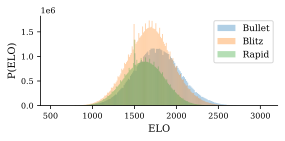

In [13]:
fig = plt.figure(0,figsize=(4, 2));
ax = fig.add_subplot(1,1,1);
ff=10
list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];
for game_type_ in [1,2,3]:
    print(game_type_,end='\r')
    ind_relevant=np.where((game_type_simplified_numeric==game_type_)&(store_all_ELOs>-1)&(list_game_had_eval==0) );
    X=store_all_ELOs[ind_relevant[0]];
    
    
    p_=ax.hist(X,200,alpha=.35,density=False,label=list_types[game_type_-1]);
#     ax.set_yscale('log');

ax.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1, 1));
xlab_=r"ELO"
ylab_=r'P(ELO)'


simpleaxis(ax,xlab_,ylab_)
plt.savefig(path_fig+'/fig_SI_elos.png',dpi=300, bbox_inches = "tight")


### game length distributions

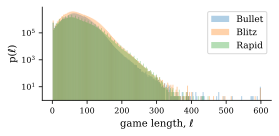

In [14]:

fig = plt.figure(0,figsize=(4, 2));
ax = fig.add_subplot(1,1,1);
list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];
for game_type_ in [1,2,3]:
    print(game_type_,end='\r')
    ind_relevant=np.where((game_type_simplified_numeric==game_type_)&(store_all_ELOs>-1)&(list_game_had_eval==0) );
    X=store_game_lengths[ind_relevant[0]];
    p_=ax.hist(X,200,alpha=.35,density=False,label=list_types[game_type_-1]);
    ax.set_yscale('log');

ax.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1, 1));
xlab_=r"game length, $\ell$"
ylab_=r'p($\ell$)'

simpleaxis(ax,xlab_,ylab_)
plt.savefig(path_fig+'/fig_SI_game_lengths.png',dpi=300, bbox_inches = "tight")


### Survival curves: Career Length vs ELO

In [15]:
# career_indices=np.array(career_indices)
# career_lens=career_indices[1:len(career_indices)]-career_indices[0:len(career_indices)-1]
# career_in_focus=len(career_indices)
   
# t_ic = time.time();

# career_lens_vs_type={'1':[],'2':[],'3':[]};
# player_elo_FILTER={'1':[],'2':[],'3':[]};

# for it in range(career_in_focus-1):
#     ind0=career_indices[it]+1
#     ind1=career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
    
#     for game_type_ in [1,2,3]: 
#         key_=str(game_type_)    
        
#         ind_relevant=np.where((type_==game_type_)&(elos_>-1) );
#         ind_relevant=ind_relevant[0]
#         LL_=ind_relevant.shape[0]
        
#         if LL_>0:
#             career_lens_vs_type[key_].append(LL_)
#             player_elo_FILTER[key_].append(np.mean(elos_[ind_relevant]))
#         else:
#             career_lens_vs_type[key_].append(-1)
#             player_elo_FILTER[key_].append(-1)


#         if it % 20000 == 0:
#             t_oc = time.time();
#             print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#             with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#                 file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------
# career_lens_vs_type_survival={x:np.array(career_lens_vs_type[x]) for x in career_lens_vs_type.keys()}
# player_elo_for_FILTER_survival={x:np.array(player_elo_FILTER[x]) for x in player_elo_FILTER.keys()}



# with open(path_dicts+'career_lens_vs_type_survival.pkl', 'wb') as f:
#     pickle.dump(career_lens_vs_type_survival, f)       
# with open(path_dicts+'player_elo_for_FILTER_survival.pkl', 'wb') as f:
#     pickle.dump(player_elo_for_FILTER_survival, f)       




In [16]:
# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# for xxx in ['1','2','3']:
#     it_plot=0
#     fig = plt.figure(int(xxx),figsize=(8, 2));
#     it_plot=it_plot+1
#     ax = fig.add_subplot(1, 4, it_plot);
    
#     X=10000
#     ind_rel=np.where((player_elo_for_FILTER_survival[xxx]>-1)& (career_lens_vs_type_survival[xxx]>-1))
#     ind_rel=ind_rel[0]
#     ax.plot(player_elo_for_FILTER_survival[xxx][ind_rel][0:X],career_lens_vs_type_survival[xxx][ind_rel][0:X],'.',alpha=.1);
#     # ax.set_xscale('log')

#     # print(stats.ks_2samp(player_elo_for_FILTER_survival[xxx][ind_rel],career_lens_vs_type_survival[xxx][ind_rel]))
#     rho,pval=stats.spearmanr(player_elo_for_FILTER_survival[xxx][ind_rel],career_lens_vs_type_survival[xxx][ind_rel])
#     # print(r'spearman $\rho, p-val=$')
#     # print(rho,pval)
    
#     xlab_=r"Player ELO"
#     ylab_=r"career length"
#     ax.set_xlabel(xlab_,fontsize=ff) 
#     ax.set_ylabel(ylab_,fontsize=ff)

#     ax.set_title(list_types[int(xxx)-1]+', rho,pval='+str(round(rho,3))+', '+str(pval));
# #         ax.legend(loc="lower center", bbox_to_anchor=(1.5, 0),ncol=1);

#     simpleaxis(ax,xlab_,ylab_)


#     #--------------------------------------
#     # density plots
#     #______________________________________
#     a=player_elo_for_FILTER_survival[xxx][ind_rel][0:X]
#     b=career_lens_vs_type_survival[xxx][ind_rel][0:X]
#     arr=np.zeros([a.shape[0],2]);arr[:,0]=a;arr[:,1]=b;
#     df = pd.DataFrame(arr)
#     df.columns=['elo','len']
#     # libraries & dataset


#     # set seaborn style
#     sns.set_style("white")
#     it_plot=it_plot+1
#     ax = fig.add_subplot(1, 4, it_plot);
#     # Basic 2D density plot
#     ax=sns.kdeplot(x=df.elo, y=df.len)
#     ax.set_yscale('log')

#     # Custom the color, add shade and bandwidth
#     it_plot=it_plot+1
#     ax = fig.add_subplot(1, 4, it_plot);    
#     ax=sns.kdeplot(x=df.elo, y=df.len, cmap="Reds", shade=True, bw_adjust=.5)
#     ax.set_yscale('log')

#     # Add thresh parameter
#     it_plot=it_plot+1
#     ax = fig.add_subplot(1, 4, it_plot);
#     ax=sns.kdeplot(x=df.elo, y=df.len, cmap="Blues", shade=True)
#     ax.set_yscale('log')
#     fig.show()
#     plt.tight_layout()


In [17]:

# def get_ELO_bins(game_type_,X):
    
#     sorted_X=sorted(X)

#     #     a=sorted_X[int(np.floor(.01*len(sorted_X)))]
#     #     b=sorted_X[int(np.floor(.99*len(sorted_X)))]
#     a=0;b=len(sorted_X)-1
#     bins_=np.floor(np.linspace(a,b,5))
#     sorted_X=np.array(sorted_X)
#     bins_=np.floor(sorted_X[bins_.astype('int')]).astype('int')
# #     bins_[len(bins_)-1]=sorted_X[len(sorted_X)-1]


#     return bins_


# ind_relevant__=np.where(player_elo_for_FILTER_survival[str(game_type_)]>-1);
# X=player_elo_for_FILTER_survival[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)




expert vs advanced 
 KstestResult(statistic=0.22984728829404216, pvalue=0.0)
advanced vs intermediate 
 KstestResult(statistic=0.12030132186445452, pvalue=0.0)
intermediate vs beginner 
 KstestResult(statistic=0.23375578073166042, pvalue=0.0)
expert vs intermediate 
 KstestResult(statistic=0.3406751774156655, pvalue=0.0)


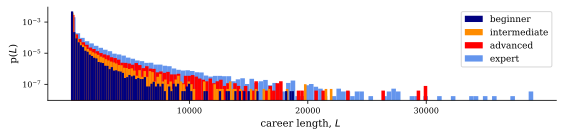

In [18]:
colors = ['cornflowerblue', 'red', 'darkorange','navy']
ff=10
nn=101
fig = plt.figure(0,figsize=(8, 2));
ax = fig.add_subplot(1,1,1);
game_type_=1
store_for_test=[]
LINES_=['--','-']
CAREER_LEN_bins_=[100,500,50000]
other_curves_=1

game_type_=2

ind_relevant__=np.where(player_elo_for_FILTER_survival[str(game_type_)]>-1);
X=player_elo_for_FILTER_survival[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)
ELO_bins_=list(ELO_bins_)
ELO_bins_.reverse()
ELO_bins_=np.array(ELO_bins_)

labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
labels_[0]='ELO<'+str(ELO_bins_[1])
labels_[len(labels_)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

labels_.reverse()

list_career_len_of_bin=[]
for it_bin in range(len(ELO_bins_)-1):

    line_stlye='-'
    color__=colors[it_bin]
    label__=labels_
    ind_rel=np.where((player_elo_for_FILTER_survival[str(game_type_)]<ELO_bins_[it_bin])&\
                      (player_elo_for_FILTER_survival[str(game_type_)]>ELO_bins_[it_bin+1])&\
                     (player_elo_for_FILTER_survival[str(game_type_)]>-1)& (career_lens_vs_type_survival[str(game_type_)]>-1))
    ind_rel=ind_rel[0]
#     ax.plot(player_elo_for_FILTER_survival[str(game_type_)][ind_rel][0:X],career_lens_vs_type_survival[str(game_type_)][ind_rel][0:X],'.',alpha=.1);
    # ax.set_xscale('log')
    
    
#     high_ind=np.where((player_elo_for_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
#                       (player_elo_for_FILTER[str(game_type_)]<ELO_bins_[it_bin+1])&(player_elo_for_FILTER[str(game_type_)]>-1)\
#                      &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
#                      &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
    X=career_lens_vs_type_survival[str(game_type_)][ind_rel]
    store_for_test.append(X)
    X=X.reshape(-1, 1)
    p_=ax.hist(X,nn,alpha=1,density=True,color=color__,label=label__[it_bin]);
#     kde = KernelDensity(kernel='gaussian', bandwidth=.01).fit(X)
#     nn=20000
#     s = np.unique(X)
#     log_dens = kde.score_samples(s.reshape(-1,1))
#     ax.plot(s,np.exp(log_dens),'-',color=color__,label=label__[it_bin])
ax.legend(loc='upper right',fontsize=9,bbox_to_anchor=(1, 1));

ax.set_yscale('log')
#     ax.set_xscale('log')

#     ax.set_title(labels_[it_bin])
# ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
# ax.legend(store_lines,leg_,loc=(1.04,0));
# ax.set(xlabel=r"opening entropy , s ", ylabel=r'P($s$)');


xlab_=r"career length, $L$ "
ylab_=r'p($L$)'

simpleaxis(ax,xlab_,ylab_)

for it_bin in range(len(ELO_bins_)-2):
    print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
it_bin=0
print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

plt.xticks([10**4,2*10**4,3*10**4],rotation=0);
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper right',fontsize=9,bbox_to_anchor=(1, 1))
plt.savefig(path_fig+'/fig_SI_career_len_vs_elo.png',dpi=300, bbox_inches = "tight")
colors = ['navy', 'darkorange','red', 'cornflowerblue']


In [19]:
# nnn=100
# nn=50
# fig = plt.figure(0,figsize=(8, 3));
# ax = fig.add_subplot(1,1,1);
# career_in_focus
# for it in range(10,20):
     
#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
    
#     type_=game_type_simplified_numeric[ind0:ind1]
# #     ops_=store_op_mains[ind0:ind1]
# #     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]

    
    
#     for game_type_ in [2]: 
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&\
#                               (elos_>-1) & (is_white==1))[0];
#         if ind_relevant.shape[0]>100:


#             X=store_utcdate_game[ind0+1:ind1]-store_utcdate_game[ind0:ind1-1]

#             X=X/np.timedelta64(1, 'h')
#             X=X[X<5]

#             X=X.reshape(-1, 1)
#             p_=ax.hist(X,nn,alpha=.2,density=False);
#             ax.set_yscale('log')
# xlab_=r"hours between player's consecutive games, $\Delta t$ "
# ylab_=r'n($\Delta t$)'

# simpleaxis(ax,xlab_,ylab_)
# ax.set_title('$\Delta t<5$');
# # store_utctime_game

In [20]:
np.sum(X>=1)

146782

# Entropy of opening calculation and storage

In [21]:
# career_in_focus=len(career_indices)
# t_ic = time.time();
# from collections import Counter


# entropy_1={'1':[],'2':[],'3':[]}
# entropy_2={'1':[],'2':[],'3':[]}
# entropy_1_at_500={'1':[],'2':[],'3':[]}
# entropy_2_at_500={'1':[],'2':[],'3':[]}
# entropy_1_at_1000={'1':[],'2':[],'3':[]}
# entropy_2_at_1000={'1':[],'2':[],'3':[]}

# num_op_FILTER={'1':[],'2':[],'3':[]}
# player_elo_FILTER={'1':[],'2':[],'3':[]}

# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# def entropy_cal(ops_rel):

#     op_count=Counter(ops_rel)
#     op_count_=np.array(list(op_count.values()))
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
#     return entropy_

# for it in range(career_in_focus-1):

#     ind0=career_indices[it]+1
#     ind1=career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]

    
    
#     for game_type_ in [1,2,3]: 
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&\
#                               (elos_>-1) & (is_white==1));

#         ops_rel=ops_[ind_relevant[0]]
#         ops_rel_vari=ops_vari[ind_relevant[0]]
#         LL_=ops_rel.shape[0]
#         num_op_FILTER[key_].append(LL_)
#         if LL_>0:

#             entropy_1[key_].append(entropy_cal(ops_rel))
#             entropy_2[key_].append(entropy_cal(ops_rel_vari))
#             if LL_>500:
#                 entropy_1_at_500[key_].append(entropy_cal(ops_rel[0:499]))
#                 entropy_2_at_500[key_].append(entropy_cal(ops_rel_vari[0:499]))
#             else:
#                 entropy_1_at_500[key_].append(-1)
#                 entropy_2_at_500[key_].append(-1)
#             if LL_>1000:
#                 entropy_1_at_1000[key_].append(entropy_cal(ops_rel[0:999]))
#                 entropy_2_at_1000[key_].append(entropy_cal(ops_rel_vari[0:999]))
#             else:
#                 entropy_1_at_1000[key_].append(-1)
#                 entropy_2_at_1000[key_].append(-1)     
#             player_elo_FILTER[key_].append(np.mean(elos_[ind_relevant]))

#         else:
#             entropy_1[key_].append(-1)
#             entropy_2[key_].append(-1)
#             player_elo_FILTER[key_].append(-1)
#             entropy_1_at_500[key_].append(-1)
#             entropy_2_at_500[key_].append(-1)
#             entropy_1_at_1000[key_].append(-1)
#             entropy_2_at_1000[key_].append(-1)  
        

    
#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------
# player_entropy_1={x:np.array(entropy_1[x]) for x in entropy_1.keys()}
# player_entropy_2={x:np.array(entropy_2[x]) for x in entropy_2.keys()}
# player_elo_for_FILTER={x:np.array(player_elo_FILTER[x]) for x in player_elo_FILTER.keys()}
# player_num_op_FILTER={x:np.array(num_op_FILTER[x]) for x in num_op_FILTER.keys()}
# player_entropy_1_at_500={x:np.array(entropy_1_at_500[x]) for x in entropy_1_at_500.keys()}
# player_entropy_2_at_500={x:np.array(entropy_2_at_500[x]) for x in entropy_2_at_500.keys()}
# player_entropy_1_at_1000={x:np.array(entropy_1_at_1000[x]) for x in entropy_1_at_1000.keys()}
# player_entropy_2_at_1000={x:np.array(entropy_2_at_1000[x]) for x in entropy_2_at_1000.keys()}



# with open(path_dicts+'player_entropy_1.pkl', 'wb') as f:
#     pickle.dump(player_entropy_1, f)

# with open(path_dicts+'player_entropy_2.pkl', 'wb') as f:
#     pickle.dump(player_entropy_2, f)

# with open(path_dicts+'player_entropy_1_at_500.pkl', 'wb') as f:
#     pickle.dump(player_entropy_1_at_500, f)

# with open(path_dicts+'player_entropy_2_at_500.pkl', 'wb') as f:
#     pickle.dump(player_entropy_2_at_500, f)

# with open(path_dicts+'player_entropy_1_at_1000.pkl', 'wb') as f:
#     pickle.dump(player_entropy_1_at_1000, f)

# with open(path_dicts+'player_entropy_2_at_1000.pkl', 'wb') as f:
#     pickle.dump(player_entropy_2_at_1000, f)

# with open(path_dicts+'player_elo_for_FILTER.pkl', 'wb') as f:
#     pickle.dump(player_elo_for_FILTER, f)

# with open(path_dicts+'player_num_op_FILTER.pkl', 'wb') as f:
#     pickle.dump(player_num_op_FILTER, f)



# Entropy of white's first move  (calculation and storage)
Game lengths>2

In [22]:
# career_in_focus=len(career_indices)
# t_ic = time.time();
# from collections import Counter

# entropy_1_first_move={'1':[],'2':[],'3':[]}
# entropy_1_at_500_first_move={'1':[],'2':[],'3':[]}
# entropy_1_at_1000_first_move={'1':[],'2':[],'3':[]}

# num_op_FILTER_first_move={'1':[],'2':[],'3':[]}
# player_elo_FILTER_first_move={'1':[],'2':[],'3':[]}

# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# def entropy_cal(ops_rel):

#     op_count=Counter(ops_rel)
#     op_count_=np.array(list(op_count.values()))
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
#     return entropy_

# for it in range(career_in_focus-1):

#     ind0=career_indices[it]+1
#     ind1=career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_first_w_move[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]

    
    
#     for game_type_ in [1,2,3]: 
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&\
#                               (elos_>-1) & (is_white==1));

#         ops_rel=ops_[ind_relevant[0]]
#         LL_=ops_rel.shape[0]
#         num_op_FILTER_first_move[key_].append(LL_)
#         if LL_>0:

#             entropy_1_first_move[key_].append(entropy_cal(ops_rel))
#             if LL_>500:
#                 entropy_1_at_500_first_move[key_].append(entropy_cal(ops_rel[0:499]))
#             else:
#                 entropy_1_at_500_first_move[key_].append(-1)
#             if LL_>1000:
#                 entropy_1_at_1000_first_move[key_].append(entropy_cal(ops_rel[0:999]))
#             else:
#                 entropy_1_at_1000_first_move[key_].append(-1)
#             player_elo_FILTER_first_move[key_].append(np.mean(elos_[ind_relevant]))

#         else:
#             entropy_1_first_move[key_].append(-1)
#             player_elo_FILTER_first_move[key_].append(-1)
#             entropy_1_at_500_first_move[key_].append(-1)
#             entropy_1_at_1000_first_move[key_].append(-1)
        

    
#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------
# player_entropy_1_first_move={x:np.array(entropy_1_first_move[x]) for x in entropy_1_first_move.keys()}
# player_elo_for_FILTER_first_move={x:np.array(player_elo_FILTER_first_move[x]) for x in player_elo_FILTER_first_move.keys()}
# player_num_op_FILTER_first_move={x:np.array(num_op_FILTER_first_move[x]) for x in num_op_FILTER_first_move.keys()}
# player_entropy_1_at_500_first_move={x:np.array(entropy_1_at_500_first_move[x]) for x in entropy_1_at_500_first_move.keys()}
# player_entropy_1_at_1000_first_move={x:np.array(entropy_1_at_1000_first_move[x]) for x in entropy_1_at_1000_first_move.keys()}

# with open(path_dicts+'player_entropy_1_first_move.pkl', 'wb') as f:
#     pickle.dump(player_entropy_1_first_move, f)

# with open(path_dicts+'player_elo_for_FILTER_first_move.pkl', 'wb') as f:
#     pickle.dump(player_elo_for_FILTER_first_move, f)

# with open(path_dicts+'player_num_op_FILTER_first_move.pkl', 'wb') as f:
#     pickle.dump(player_num_op_FILTER_first_move, f)


In [23]:

with open(path_dicts+'player_entropy_1_first_move.pkl', 'rb') as f:
    player_entropy_1_first_move= pickle.load(f)
with open(path_dicts+'player_elo_for_FILTER_first_move.pkl', 'rb') as f:
    player_elo_for_FILTER_first_move= pickle.load(f)
with open(path_dicts+'player_num_op_FILTER_first_move.pkl', 'rb') as f:
    player_num_op_FILTER_first_move= pickle.load(f)


# Entropy first move vs career stage

In [24]:
# STAGES_=[100,600,1100,1600]
STAGES_=[100,1100,2100,3100]

N_STAGES=len(STAGES_)-1

In [25]:
# career_in_focus=len(store_career_indices)
# career_indices=store_career_indices
# t_ic = time.time();

# entropy_vs_career={'1':[[] for x in range(N_STAGES)],'2':[[] for x in range(N_STAGES)],'3':[[] for x in range(N_STAGES)]}
# num_op_FILTER_career={'1':[],'2':[],'3':[]}
# player_elo_FILTER_career={'1':[],'2':[],'3':[]}



# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# def entropy_cal(ops_rel):

#     op_count=Counter(ops_rel)
#     op_count_=np.array(list(op_count.values()))
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
#     return entropy_



# for it in range(career_in_focus-1):
# # for it in range(10-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_first_w_move[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]

    
    
#     for game_type_ in [1,2,3]: 
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&\
#                               (elos_>-1) & (is_white==1));

#         ops_rel=ops_[ind_relevant[0]]
#         LL_=ops_rel.shape[0]
#         if LL_>STAGES_[-1]:
#             num_op_FILTER_career[key_].append(LL_)
#             for career_stage in range(N_STAGES):
#                 entropy_vs_career[key_][career_stage].append(entropy_cal(ops_rel[STAGES_[career_stage]:STAGES_[career_stage+1]]))

#             player_elo_FILTER_career[key_].append(np.mean(elos_[ind_relevant][STAGES_[career_stage]:STAGES_[career_stage+1]]))

        

    
#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_CAREER_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# # #------------------------------------------------
# # # Saving the analysis
# # #------------------------------------------------

# # entropy_vs_career={x:entropy_vs_career[x] for x in entropy_vs_career.keys()}
# for key_ in entropy_vs_career.keys():
#     for career_stage in range(N_STAGES):
#         entropy_vs_career[key_][career_stage]=np.array(entropy_vs_career[key_][career_stage])

# entropy_vs_career_num_op_FILTER={x:np.array(num_op_FILTER_career[x]) for x in num_op_FILTER_career.keys()}
# entropy_vs_career_player_elo_FILTER={x:np.array(player_elo_FILTER_career[x]) for x in player_elo_FILTER_career.keys()}

# with open(path_dicts+'entropy_vs_career.pkl', 'wb') as f:
#     pickle.dump(entropy_vs_career, f)
# with open(path_dicts+'entropy_vs_career_num_op_FILTER.pkl', 'wb') as f:
#     pickle.dump(entropy_vs_career_num_op_FILTER, f)
# with open(path_dicts+'entropy_vs_career_player_elo_FILTER.pkl', 'wb') as f:
#     pickle.dump(entropy_vs_career_player_elo_FILTER, f)

### Plot career vs entropy

In [26]:
with open(path_dicts+'entropy_vs_career.pkl', 'rb') as f:
    entropy_vs_career= pickle.load(f)
with open(path_dicts+'entropy_vs_career_num_op_FILTER.pkl', 'rb') as f:
    entropy_vs_career_num_op_FILTER= pickle.load(f)
with open(path_dicts+'entropy_vs_career_player_elo_FILTER.pkl', 'rb') as f:
    entropy_vs_career_player_elo_FILTER= pickle.load(f)

early career vs mid career 
 KstestResult(statistic=0.041827187671986794, pvalue=0.08325537112649731)
mid career vs late career 
 KstestResult(statistic=0.0275178866263071, pvalue=0.4972049580859265)
early career vs late career 
 KstestResult(statistic=0.061640066042927905, pvalue=0.002003187503885548)


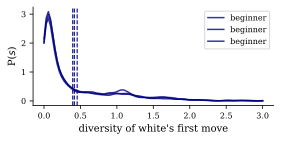

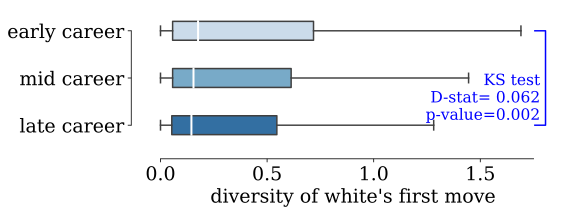

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# A few helper functions:
# from utils import *
from statannotations.Annotator import Annotator

# To illustrate examples
import numpy as np
from scipy.stats import mannwhitneyu, normaltest

# -----------------------------------------
game_type_=2
bins_=101
colors = ['navy', 'darkorange','red', 'cornflowerblue']


ind_relevant__=np.where(entropy_vs_career_player_elo_FILTER[str(game_type_)]>-1 );
X=entropy_vs_career_player_elo_FILTER[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)

# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101
fig = plt.figure(0,figsize=(4, 2));
ax = fig.add_subplot(1, 1,1);

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']


labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
labels_[0]='ELO<'+str(ELO_bins_[1])
labels_[len(labels_)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0


STAGES_labels=['early career','mid career','late career']
labels_all=[]
color_all=[]
hue_all=[]

# for it_bin in range(len(ELO_bins_)-1):
for career_stage in range(N_STAGES):

# (entropy_vs_career_player_elo_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
#                       (entropy_vs_career_player_elo_FILTER[str(game_type_)]<ELO_bins_[it_bin+1])&\
                      
    line_stlye=LINES_[it_career_len]
    high_ind=np.where(    (entropy_vs_career_player_elo_FILTER[str(game_type_)]>-1));
    high_ind=high_ind[0]
    X=entropy_vs_career[str(game_type_)][career_stage][high_ind]
    store_for_test.append(X)
    X=X.reshape(-1, 1);
    kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
    s = np.linspace(0,3,nn)
    log_dens = kde.score_samples(s.reshape(-1,1))
    ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
    ax.axvline(np.mean(X), 0, 41, c=colors[it_bin], alpha=1, ls='--', label='', lw=1.1)  

    hue_all.append(STAGES_labels[career_stage])
    labels_all.append(labels_[it_bin])
    color_all.append(colors[it_bin])

xlab_=r"diversity of white's first move"
ylab_=r'P($s$)'
ax.set_xlabel(xlab_,fontsize=ff) 
ax.set_ylabel(ylab_,fontsize=ff)

for it_bin in range(N_STAGES-1):
    print(STAGES_labels[it_bin]+' vs '+ STAGES_labels[it_bin+1],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
it_bin=0
print(STAGES_labels[it_bin]+' vs '+ STAGES_labels[it_bin+2],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))
pval_13_plot=stats.ks_2samp(store_for_test[0],store_for_test[2])

# print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
# print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))

ax.legend(loc='upper right');


# ax = fig.add_subplot(2, 1, 2);
# ax.hist(store_rating,bins_,alpha=.3);

# ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));
simpleaxis(ax,xlab_,ylab_)

#------------------------------------------------------------------------------------------------------------
fig = plt.figure(1,figsize=(8, 3));
ff=19
ax = fig.add_subplot(1, 1,1);
# violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
it=-1
df_=pd.DataFrame(); it_=-1;row_=0
df_['']=[]
df_['skill level']=[]

for data_ in store_for_test:
    it_+=1
    df_=df_.append(pd.DataFrame(data_))
    rows_=pd.DataFrame(data_).shape[0]
    df_[''].iloc[row_:row_+rows_]=labels_all[it_]
    df_['skill level'].iloc[row_:row_+rows_]=hue_all[it_]
    row_=row_+rows_
# df_.columns=['',"black's response entropy"]
df_.columns=['',"black's response diversity",'skill level']
meanlineprops = dict(linestyle='-', linewidth=2, color='white')

# ax=sns.boxplot(y=df_["black's response entropy"],x=df_[''], width=.3,showfliers=False,medianprops=meanlineprops);
ax=sns.boxplot(x=df_[''], width=.4,\
               y=df_['skill level'],palette='Blues',showfliers=False,medianprops=meanlineprops\
              ,dodge=True);
# ax = sns.violinplot(y=df_["black's response diversity"],x=df_[''], width=.4,hue=df_['skill level'], palette="muted")

# tips = sns.load_dataset("tips")
# sns.boxplot(x="day", y="total_bill", data=tips, palette="PRGn")

# statistical annotation
x1, x2 = 0, 2   # columns ;
y, h, col = df_[''].max()*.5, .05, 'b'
ax.plot( [y, y+h, y+h, y],[x1, x1, x2, x2], lw=1.5, c=col)
Dstat,pval_13_plot=pval_13_plot

pval_13_plot='KS test\nD-stat= ' + str(round(Dstat,3)) +'\np-value='+str(round(pval_13_plot,4))
ax.text(y+h*.5,(x1+x2)*.45 , pval_13_plot, ha='right', va='top', color='b', fontsize=ff-3.5)



# import matplotlib.patches

# cc=0
# for it in range(4):
#     for it2 in range(3):
        
#         my_colours[cc]=colors[it];cc=cc+1

# # my_colours=color_all.copy()
# boxes = ax.findobj(matplotlib.patches.PathPatch)
# for color, box in zip(my_colours, boxes):
#     box.set_facecolor(color)
    
    
    
ylab_=''
# ylab_=("white's first move")
# ax.set_xscale('log',base=2)

sns.despine(offset=10, trim=True)
# ax.set_yticks(fontsize=ff)
ax.tick_params(axis='both', which='major', labelsize=ff)
# ax.set_yticks(STAGES_labels)
ax.set_xticks([0,.5,1,1.5])
# ax.legend(loc=(.54,0),fontsize=ff,frameon=True,framealpha=.5)
simpleaxis(ax,xlab_,ylab_)

plt.savefig(path_fig+'/fig_6a_new__entropy_vs_career.png',dpi=300, bbox_inches = "tight")


## Entropy of opening sequence vs career

In [28]:
# career_in_focus=len(store_career_indices)
# career_indices=store_career_indices
# t_ic = time.time();
# N_STAGES=len(STAGES_)-1
# entropy_vs_career_sequence={'1':[[] for x in range(N_STAGES)],'2':[[] for x in range(N_STAGES)],'3':[[] for x in range(N_STAGES)]}
# num_op_FILTER_career_sequence={'1':[],'2':[],'3':[]}
# player_elo_FILTER_career_sequence={'1':[],'2':[],'3':[]}



# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# def entropy_cal(ops_rel):

#     op_count=Counter(ops_rel)
#     op_count_=np.array(list(op_count.values()))
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
#     return entropy_



# for it in range(career_in_focus-1):
# # for it in range(10-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
# #     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]

    
    
#     for game_type_ in [1,2,3]: 
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&\
#                               (elos_>-1) & (is_white==1));

#         ops_rel=ops_[ind_relevant[0]]
#         LL_=ops_rel.shape[0]
#         if LL_>STAGES_[-1]:
#             num_op_FILTER_career_sequence[key_].append(LL_)
#             for career_stage in range(N_STAGES):
#                 entropy_vs_career_sequence[key_][career_stage].append(entropy_cal(ops_rel[STAGES_[career_stage]:STAGES_[career_stage+1]]))

#             player_elo_FILTER_career_sequence[key_].append(np.mean(elos_[ind_relevant][STAGES_[career_stage]:STAGES_[career_stage+1]]))

        

    
#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_CAREER_sequence_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# # #------------------------------------------------
# # # Saving the analysis
# # #------------------------------------------------

# # entropy_vs_career={x:entropy_vs_career[x] for x in entropy_vs_career.keys()}
# for key_ in entropy_vs_career_sequence.keys():
#     for career_stage in range(N_STAGES):
#         entropy_vs_career_sequence[key_][career_stage]=np.array(entropy_vs_career_sequence[key_][career_stage])

# entropy_vs_career_sequence_num_op_FILTER={x:np.array(num_op_FILTER_career_sequence[x]) for x in num_op_FILTER_career.keys()}
# entropy_vs_career_sequence_player_elo_FILTER={x:np.array(player_elo_FILTER_career_sequence[x]) for x in player_elo_FILTER_career.keys()}

# with open(path_dicts+'entropy_vs_career_sequence.pkl', 'wb') as f:
#     pickle.dump(entropy_vs_career_sequence, f)
# with open(path_dicts+'entropy_vs_career_sequence_num_op_FILTER.pkl', 'wb') as f:
#     pickle.dump(entropy_vs_career_sequence_num_op_FILTER, f)
# with open(path_dicts+'entropy_vs_career_sequence_player_elo_FILTER.pkl', 'wb') as f:
#     pickle.dump(entropy_vs_career_sequence_player_elo_FILTER, f)

In [29]:
with open(path_dicts+'entropy_vs_career_sequence_player_elo_FILTER.pkl', 'rb') as f:
    entropy_vs_career_sequence_player_elo_FILTER= pickle.load(f)
with open(path_dicts+'entropy_vs_career_sequence.pkl', 'rb') as f:
    entropy_vs_career_sequence= pickle.load(f)
# with open(path_dicts+'entropy_vs_career_player_elo_FILTER.pkl', 'rb') as f:
#     entropy_vs_career_player_elo_FILTER= pickle.load(f)

early career vs mid career 
 KstestResult(statistic=0.053384700055035775, pvalue=0.011263311477046754)
mid career vs late career 
 KstestResult(statistic=0.03302146395156852, pvalue=0.2751137087955765)
early career vs late career 
 KstestResult(statistic=0.07705008255365987, pvalue=4.101443896353644e-05)


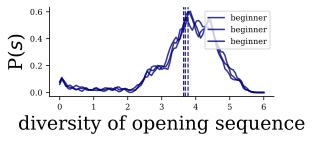

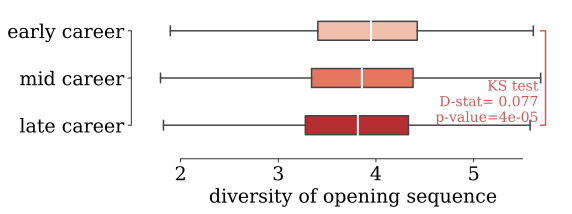

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# A few helper functions:
# from utils import *
from statannotations.Annotator import Annotator

# To illustrate examples
import numpy as np
from scipy.stats import mannwhitneyu, normaltest

# -----------------------------------------
game_type_=2
bins_=101
colors = ['navy', 'darkorange','red', 'cornflowerblue']


ind_relevant__=np.where(entropy_vs_career_sequence_player_elo_FILTER[str(game_type_)]>-1 );
X=entropy_vs_career_sequence_player_elo_FILTER[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)

# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101
fig = plt.figure(0,figsize=(4, 2));
ax = fig.add_subplot(1, 1,1);

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']


labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
labels_[0]='ELO<'+str(ELO_bins_[1])
labels_[len(labels_)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0


STAGES_labels=['early career','mid career','late career']
labels_all=[]
color_all=[]
hue_all=[]

# for it_bin in range(len(ELO_bins_)-1):
for career_stage in range(N_STAGES):

# (entropy_vs_career_player_elo_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
#                       (entropy_vs_career_player_elo_FILTER[str(game_type_)]<ELO_bins_[it_bin+1])&\
                      
    line_stlye=LINES_[it_career_len]
    high_ind=np.where(    (entropy_vs_career_sequence_player_elo_FILTER[str(game_type_)]>-1));
    high_ind=high_ind[0]
    X=entropy_vs_career_sequence[str(game_type_)][career_stage][high_ind]
    store_for_test.append(X)
    X=X.reshape(-1, 1);
    kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
    s = np.linspace(0,6,nn)
    log_dens = kde.score_samples(s.reshape(-1,1))
    ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
    ax.axvline(np.mean(X), 0, 41, c=colors[it_bin], alpha=1, ls='--', label='', lw=1.1)  

    hue_all.append(STAGES_labels[career_stage])
    labels_all.append(labels_[it_bin])
    color_all.append(colors[it_bin])

xlab_=r"diversity of opening sequence"
ylab_=r'P($s$)'
ax.set_xlabel(xlab_,fontsize=ff) 
ax.set_ylabel(ylab_,fontsize=ff)

for it_bin in range(N_STAGES-1):
    print(STAGES_labels[it_bin]+' vs '+ STAGES_labels[it_bin+1],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
it_bin=0
print(STAGES_labels[it_bin]+' vs '+ STAGES_labels[it_bin+2],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))
pval_13_plot=stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2])
# print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
# print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))

ax.legend(loc='upper right');


# ax = fig.add_subplot(2, 1, 2);
# ax.hist(store_rating,bins_,alpha=.3);

# ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));
simpleaxis(ax,xlab_,ylab_)
#------------------------------------
fig = plt.figure(1,figsize=(8, 3));
ff=19
ax = fig.add_subplot(1, 1,1);
# violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
it=-1
df_=pd.DataFrame(); it_=-1;row_=0
df_['']=[]
df_['skill level']=[]

for data_ in store_for_test:
    it_+=1
    df_=df_.append(pd.DataFrame(data_))
    rows_=pd.DataFrame(data_).shape[0]
    df_[''].iloc[row_:row_+rows_]=labels_all[it_]
    df_['skill level'].iloc[row_:row_+rows_]=hue_all[it_]
    row_=row_+rows_
# df_.columns=['',"black's response entropy"]
df_.columns=['',"black's response diversity",'skill level']
meanlineprops = dict(linestyle='-', linewidth=2, color='white')

# ax=sns.boxplot(y=df_["black's response entropy"],x=df_[''], width=.3,showfliers=False,medianprops=meanlineprops);
ax=sns.boxplot(x=df_[''], width=.4,\
               y=df_['skill level'],palette='Reds',showfliers=False,medianprops=meanlineprops\
              ,dodge=True);
# ax = sns.violinplot(y=df_["black's response diversity"],x=df_[''], width=.4,hue=df_['skill level'], palette="muted")

# tips = sns.load_dataset("tips")
# sns.boxplot(x="day", y="total_bill", data=tips, palette="PRGn")

# statistical annotation
x1, x2 = 0, 2   # columns ;
y, h, col = df_[''].max()*1, .05, 'indianred'
ax.plot( [y, y+h, y+h, y],[x1, x1, x2, x2], lw=1.5, c=col)
Dstat,pval_13_plot=pval_13_plot

pval_13_plot='KS test\nD-stat= ' + str(round(Dstat,3)) +'\np-value='+str(round(pval_13_plot,5))
# ax.text(y+2*h,(x1+x2)*.5 , pval_13_plot, ha='left', va='bottom', color=col, fontsize=ff-2)
ax.text(y-h*.45,(x1+x2)*.52 , pval_13_plot, ha='right', va='top', color='indianred', fontsize=ff-5)




# import matplotlib.patches

    
    
ylab_=''
# ylab_=("white's first move")
# ax.set_xscale('log',base=2)

sns.despine(offset=10, trim=True)
# ax.set_yticks(fontsize=ff)
ax.tick_params(axis='both', which='major', labelsize=ff)
# ax.set_yticks(STAGES_labels)
ax.set_xticks([2,3,4,5])
# ax.legend(loc=(.54,0),fontsize=ff,frameon=True,framealpha=.5)
simpleaxis(ax,xlab_,ylab_)

plt.savefig(path_fig+'/fig_6b_new__entropy_vs_career_sequence.png',dpi=300, bbox_inches = "tight")


In [31]:
ff

19

## Favourite opening 

In [32]:
career_in_focus=len(store_career_indices)
career_indices=store_career_indices
t_ic = time.time();
N_STAGES=len(STAGES_)-1
favorite_vs_career={'1':[[] for x in range(N_STAGES)],'2':[[] for x in range(N_STAGES)],'3':[[] for x in range(N_STAGES)]}
favorite_vs_career_num_op_FILTER={'1':[],'2':[],'3':[]}
favorite_vs_career_player_elo_FILTER={'1':[],'2':[],'3':[]}


# 
list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

def favorite_opening(ops_rel):

    op_count=Counter(ops_rel)
    op_count=op_count.most_common()
    
#     op_count_=np.array(list(op_count.values()))
    
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
    return op_count[0][0]


# 
for it in range(career_in_focus-1):
# for it in range(1000-1):

    ind0=store_career_indices[it]+1
    ind1=store_career_indices[it+1]+1
    type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_first_w_move[ind0:ind1]
    ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
    
    elos_=store_all_ELOs[ind0:ind1]
    is_white=store_is_white[ind0:ind1]

    
    
    for game_type_ in [1,2,3]: 
        key_=str(game_type_)
        ind_relevant=np.where((type_==game_type_)&\
                              (elos_>-1) & (is_white==1));

        ops_rel=ops_[ind_relevant[0]]
        LL_=ops_rel.shape[0]
        if LL_>STAGES_[-1]:
            favorite_vs_career_num_op_FILTER[key_].append(LL_)
            for career_stage in range(N_STAGES):
                favorite_vs_career[key_][career_stage].append(favorite_opening(ops_rel[STAGES_[career_stage]:STAGES_[career_stage+1]]))

            favorite_vs_career_player_elo_FILTER[key_].append(np.mean(elos_[ind_relevant][STAGES_[career_stage]:STAGES_[career_stage+1]]))

        

    
    if it % 10000 == 0:
        t_oc = time.time();
        print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
        with open("/mnt/sdb1/sandeep/0. Careers in chess/a_CAREER_favorite_opening.txt", "a") as file_object:
            file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# # #------------------------------------------------
# # # Saving the analysis
# # #------------------------------------------------

# entropy_vs_career={x:entropy_vs_career[x] for x in entropy_vs_career.keys()}
for key_ in favorite_vs_career.keys():
    for career_stage in range(N_STAGES):
        favorite_vs_career[key_][career_stage]=np.array(favorite_vs_career[key_][career_stage])

favorite_vs_career_num_op_FILTER={x:np.array(favorite_vs_career_num_op_FILTER[x]) for x in favorite_vs_career_num_op_FILTER.keys()}
favorite_vs_career_player_elo_FILTER={x:np.array(favorite_vs_career_player_elo_FILTER[x]) for x in favorite_vs_career_player_elo_FILTER.keys()}

with open(path_dicts+'favorite_vs_career.pkl', 'wb') as f:
    pickle.dump(favorite_vs_career, f)
with open(path_dicts+'favorite_vs_career_num_op_FILTER.pkl', 'wb') as f:
    pickle.dump(favorite_vs_career_num_op_FILTER, f)
with open(path_dicts+'favorite_vs_career_player_elo_FILTER.pkl', 'wb') as f:
    pickle.dump(favorite_vs_career_player_elo_FILTER, f)

### Top opening vs ELO


In [33]:
career_in_focus=len(store_career_indices)
career_indices=store_career_indices
t_ic = time.time();
favorite_vs_ELO={'1':[],'2':[],'3':[]}
favorite_vs_ELO_num_op_FILTER={'1':[],'2':[],'3':[]}
favorite_vs_ELO_player_elo_FILTER={'1':[],'2':[],'3':[]}


# 
list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

def favorite_opening(ops_rel):

    op_count=Counter(ops_rel)
    op_count=op_count.most_common()
    
#     op_count_=np.array(list(op_count.values()))
    
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
    return op_count[0][0]


# 
for it in range(career_in_focus-1):
# for it in range(1000-1):

    ind0=store_career_indices[it]+1
    ind1=store_career_indices[it+1]+1
    type_=game_type_simplified_numeric[ind0:ind1]
    ops_=store_first_w_move[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_=store_all_OPENINGS_variations[ind0:ind1]
    
    elos_=store_all_ELOs[ind0:ind1]
    is_white=store_is_white[ind0:ind1]

    
    
    for game_type_ in [1,2,3]: 
        key_=str(game_type_)
        ind_relevant=np.where((type_==game_type_)&(elos_>-1) & (is_white==1));

        ops_rel=ops_[ind_relevant[0]]
        LL_=ops_rel.shape[0]
        if LL_>100:
            favorite_vs_ELO_num_op_FILTER[key_].append(LL_)
            favorite_vs_ELO[key_].append(favorite_opening(ops_rel))
            favorite_vs_ELO_player_elo_FILTER[key_].append(np.mean(elos_[ind_relevant]))
    
    if it % 10000 == 0:
        t_oc = time.time();
        print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
        with open("/mnt/sdb1/sandeep/0. Careers in chess/a_CAREER_favorite_opening.txt", "a") as file_object:
            file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# # #------------------------------------------------
# # # Saving the analysis
# # #------------------------------------------------

# entropy_vs_career={x:entropy_vs_career[x] for x in entropy_vs_career.keys()}
favorite_vs_ELO={x:np.array(favorite_vs_ELO[x]) for x in favorite_vs_ELO.keys()}
favorite_vs_ELO_num_op_FILTER={x:np.array(favorite_vs_ELO_num_op_FILTER[x]) for x in favorite_vs_ELO_num_op_FILTER.keys()}
favorite_vs_ELO_player_elo_FILTER={x:np.array(favorite_vs_ELO_player_elo_FILTER[x]) for x in favorite_vs_ELO_player_elo_FILTER.keys()}

with open(path_dicts+'favorite_vs_ELO_firstmove.pkl', 'wb') as f:
    pickle.dump(favorite_vs_ELO, f)
with open(path_dicts+'favorite_vs_ELO_num_op_FILTER.pkl', 'wb') as f:
    pickle.dump(favorite_vs_ELO_num_op_FILTER, f)
with open(path_dicts+'favorite_vs_ELO_player_elo_FILTER.pkl', 'wb') as f:
    pickle.dump(favorite_vs_ELO_player_elo_FILTER, f)

### Plot Top opening vs ELO 
-- 1) pie charts, 2) alluvial diagrams : from top 10

In [34]:
new_labs_=[]


['Sicilian Defense', "Queen's Pawn Game", "Queen's Gambit Declined", 'English Opening', 'Italian Game', 'Ruy Lopez', "King's Pawn Game", "Bishop's Opening", 'Scotch Game', 'others']


ValueError: 'label' must be of length 'x'

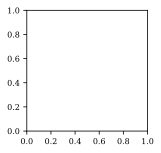

In [35]:
#create pie chart
with open(path_dicts+'favorite_vs_ELO_main.pkl', 'rb') as f:
    favorite_vs_ELO=pickle.load(f)
fig = plt.figure(1,figsize=( 10,3));
ff=12
ind_relevant__=np.where(favorite_vs_ELO_player_elo_FILTER[str(game_type_)]>-1 );
X=favorite_vs_ELO_player_elo_FILTER[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)
    
    
for it_bin in range(len(ELO_bins_)-1):
# for career_stage in range(N_STAGES):
#     XXX=XXX+favorite_vs_career['2'][career_stage]
    high_ind=np.where((favorite_vs_ELO_player_elo_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
                          (favorite_vs_ELO_player_elo_FILTER[str(game_type_)]<ELO_bins_[it_bin+1]));
    high_ind=high_ind[0]
    
    distribution_favorite_openings=Counter(favorite_vs_ELO['2'][high_ind])
    distribution_favorite_openings=distribution_favorite_openings.most_common()
    X=np.array([x[1] for x in distribution_favorite_openings])
    X=list(X[0:9])+[np.sum(X[9:-1])]

    labels=np.array([x[0] for x in distribution_favorite_openings])
    labels=[inv_map_op[x] for x in labels]
#     labels=[inv_map_op_variations[x] for x in labels]
    
    labels=labels[0:9]+['others'];new_labs_=[]
#     print(labels)
    for lab_ in labels_:
        x=""
        for y in lab_.split(' '):
            x=x+y+"\n"
         
        new_labs_.append(x)

    labels_=labels.copy()
        
    # X=np.array(distribution_favorite_openings[1])
    # labels=np.array(distribution_favorite_openings[1])
    colors = sns.color_palette('pastel')[0:10]

    ax = fig.add_subplot( 1,4,it_bin+1);
    print(labels)
    ax.pie(X/np.sum(X), labels = new_labs_, colors=colors,autopct='%.f%%',labeldistance=.9,radius=1,\
          rotatelabels=True, textprops={'fontsize': 8})
    
    

    xlab_=''    
    ylab_=''

    simpleaxis(ax,xlab_,ylab_)
    
fig = plt.figure(2,figsize=( 5,3));

distribution_favorite_openings=Counter(favorite_vs_ELO['2'])
distribution_favorite_openings=distribution_favorite_openings.most_common()
X=np.array([x[1] for x in distribution_favorite_openings])
X=list(X[0:9])+[np.sum(X[9:-1])]

labels=np.array([x[0] for x in distribution_favorite_openings])
labels=[inv_map_op[x] for x in labels]
#     labels=[inv_map_op_variations[x] for x in labels]


labels=labels[0:9]+['others']
labels_=labels.copy()
new_labs_=[]
#     print(labels)
for lab_ in labels_:
    xx=re.split('-| ',lab_)
    x=xx[0]
    if len(xx)>1:
        x=x+' '+xx[1]
    if len(xx)>2:
        x=x+'\n'+xx[2]

    new_labs_.append(x)

# X=np.array(distribution_favorite_openings[1])
# labels=np.array(distribution_favorite_openings[1])
colors = sns.color_palette('pastel')[0:10]

ax = fig.add_subplot( 1,1,1);
wedges, labels, autopct = ax.pie(X/np.sum(X), labels = new_labs_, colors=colors,autopct='%.f%%',labeldistance=1.1,radius=1,\
rotatelabels=True, textprops={'fontsize': 5},startangle=90)
for lab in labels:
    lab.set_fontsize(8)
simpleaxis(ax,xlab_,ylab_)

plt.savefig(path_fig+'/fig_new_favorite_openings_main.png',dpi=300, bbox_inches = "tight")






In [ ]:
#create pie chart
with open(path_dicts+'favorite_vs_ELO_variations.pkl', 'rb') as f:
    favorite_vs_ELO=pickle.load(f)
fig = plt.figure(1,figsize=( 10,4));
ff=12
ind_relevant__=np.where(favorite_vs_ELO_player_elo_FILTER[str(game_type_)]>-1 );
X=favorite_vs_ELO_player_elo_FILTER[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)
    
    
for it_bin in range(len(ELO_bins_)-1):
# for career_stage in range(N_STAGES):
#     XXX=XXX+favorite_vs_career['2'][career_stage]
    high_ind=np.where((favorite_vs_ELO_player_elo_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
                          (favorite_vs_ELO_player_elo_FILTER[str(game_type_)]<ELO_bins_[it_bin+1]));
    high_ind=high_ind[0]
    
    distribution_favorite_openings=Counter(favorite_vs_ELO['2'][high_ind])
    distribution_favorite_openings=distribution_favorite_openings.most_common()
    X=np.array([x[1] for x in distribution_favorite_openings])
    X=list(X[0:9])+[np.sum(X[9:-1])]

    labels=np.array([x[0] for x in distribution_favorite_openings])
#     labels=[inv_map_op[x] for x in labels]
    labels=[inv_map_op_variations[x] for x in labels]
    
    labels=labels[0:9]+['others']
    # X=np.array(distribution_favorite_openings[1])
    # labels=np.array(distribution_favorite_openings[1])
    colors = sns.color_palette('pastel')[0:10]

    ax = fig.add_subplot( 1,4,it_bin+1);
    ax.pie(X/np.sum(X), labels = labels, colors=colors,labeldistance=.9,radius=1,\
          rotatelabels=True, textprops={'fontsize': 8}) 
#   autopct='%.f%%',
    
    

    xlab_=''    
    ylab_=''

    simpleaxis(ax,xlab_,ylab_)
    
fig = plt.figure(2,figsize=( 4,3));

distribution_favorite_openings=Counter(favorite_vs_ELO['2'])
distribution_favorite_openings=distribution_favorite_openings.most_common()
X=np.array([x[1] for x in distribution_favorite_openings])
X=list(X[0:9])+[np.sum(X[9:-1])]

labels=np.array([x[0] for x in distribution_favorite_openings])
# labels=[inv_map_op[x] for x in labels]
labels=[inv_map_op_variations[x] for x in labels]

labels=labels[0:9]+['others']
# X=np.array(distribution_favorite_openings[1])
# labels=np.array(distribution_favorite_openings[1])
colors = sns.color_palette('pastel')[0:10]

ax = fig.add_subplot( 1,1,1);
ax.pie(X/np.sum(X), labels = labels, colors=colors,labeldistance=.99,radius=1,\
rotatelabels=True, textprops={'fontsize': 7})
plt.savefig(path_fig+'/fig_new_favorite_openings_variations.png',dpi=300, bbox_inches = "tight")



#### popularity : first move

In [ ]:
#create pie chart
with open(path_dicts+'favorite_vs_ELO_firstmove.pkl', 'rb') as f:
    favorite_vs_ELO=pickle.load(f)
fig = plt.figure(1,figsize=( 10,4));
ff=12
ind_relevant__=np.where(favorite_vs_ELO_player_elo_FILTER[str(game_type_)]>-1 );
X=favorite_vs_ELO_player_elo_FILTER[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)
    
    
for it_bin in range(len(ELO_bins_)-1):
# for career_stage in range(N_STAGES):
#     XXX=XXX+favorite_vs_career['2'][career_stage]
    high_ind=np.where((favorite_vs_ELO_player_elo_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
                          (favorite_vs_ELO_player_elo_FILTER[str(game_type_)]<ELO_bins_[it_bin+1]));
    high_ind=high_ind[0]
    
    distribution_favorite_openings=Counter(favorite_vs_ELO['2'][high_ind])
    distribution_favorite_openings=distribution_favorite_openings.most_common()
    X=np.array([x[1] for x in distribution_favorite_openings])
    X=list(X[0:9])+[np.sum(X[9:-1])]

    labels=np.array([x[0] for x in distribution_favorite_openings])
#     labels=[inv_map_op[x] for x in labels]
    labels=[inv_map_op_variations[x] for x in labels]
    
    labels=labels[0:9]+['others']
    # X=np.array(distribution_favorite_openings[1])
    # labels=np.array(distribution_favorite_openings[1])
    colors = sns.color_palette('pastel')[0:10]

    ax = fig.add_subplot( 1,4,it_bin+1);
    ax.pie(X/np.sum(X), labels = labels, colors=colors,labeldistance=.9,radius=1,\
          rotatelabels=True, textprops={'fontsize': 8}) 
#   autopct='%.f%%',
    
    

    xlab_=''    
    ylab_=''

    simpleaxis(ax,xlab_,ylab_)
    
fig = plt.figure(2,figsize=( 4,3));

distribution_favorite_openings=Counter(favorite_vs_ELO['2'])
distribution_favorite_openings=distribution_favorite_openings.most_common()
X=np.array([x[1] for x in distribution_favorite_openings])
X=list(X[0:9])+[np.sum(X[9:-1])]

labels=np.array([x[0] for x in distribution_favorite_openings])
# labels=[inv_map_op[x] for x in labels]
labels=[inv_map_op_variations[x] for x in labels]

labels=labels[0:9]+['others']
# X=np.array(distribution_favorite_openings[1])
# labels=np.array(distribution_favorite_openings[1])
colors = sns.color_palette('pastel')[0:10]

ax = fig.add_subplot( 1,1,1);
ax.pie(X/np.sum(X), labels = labels, colors=colors,labeldistance=.99,radius=1,\
rotatelabels=True, textprops={'fontsize': 7})
plt.savefig(path_fig+'/fig_new_favorite_opening_move.png',dpi=300, bbox_inches = "tight")



In [ ]:
#create pie chart
 
fig = plt.figure(1,figsize=( 10,4));
ff=12
ind_relevant__=np.where(favorite_vs_ELO_player_elo_FILTER[str(game_type_)]>-1 );
X=favorite_vs_ELO_player_elo_FILTER[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)
    
    
for it_bin in range(len(ELO_bins_)-1):
# for career_stage in range(N_STAGES):
#     XXX=XXX+favorite_vs_career['2'][career_stage]
    high_ind=np.where((favorite_vs_ELO_player_elo_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
                          (favorite_vs_ELO_player_elo_FILTER[str(game_type_)]<ELO_bins_[it_bin+1]));
    high_ind=high_ind[0]
    
    distribution_favorite_openings=Counter(favorite_vs_ELO['2'][high_ind])
    distribution_favorite_openings=distribution_favorite_openings.most_common()
    X=np.array([x[1] for x in distribution_favorite_openings])
    X=list(X[0:9])+[np.sum(X[9:-1])]

    labels=np.array([x[0] for x in distribution_favorite_openings])
#     labels=[inv_map[x] for x in labels]
    labels=[inv_map_op_variations[x] for x in labels]
    
    labels=labels[0:9]+['others']
    # X=np.array(distribution_favorite_openings[1])
    # labels=np.array(distribution_favorite_openings[1])
    colors = sns.color_palette('pastel')[0:10]

    ax = fig.add_subplot( 1,4,it_bin+1);
    ax.pie(X/np.sum(X), labels = labels, colors=colors,autopct='%.f%%',labeldistance=.6,radius=1,\
          rotatelabels=True, textprops={'fontsize': 8})

xlab_=''    
ylab_=''
# ylab_=("white's first move")
# ax.set_xscale('log',base=2)

# sns.despine(offset=10, trim=True)
# ax.set_yticks(fontsize=ff)
# ax.tick_params(axis='both', which='major', labelsize=ff)
# ax.set_yticks(STAGES_labels)
# ax.set_xticks([0,.5,1,1.5])
# ax.legend(loc=(.54,0),fontsize=ff,frameon=True,framealpha=.5)
simpleaxis(ax,xlab_,ylab_)

####plt.savefig(path_fig+'/fig_new_favorite_openings.png',dpi=300, bbox_inches = "tight")



In [ ]:
favorite_vs_ELO['2']
favorite_vs_ELO_player_elo_FILTER['2']
ELO_bins_

In [ ]:
#create pie chart
 
# fig = plt.figure(1,figsize=( 4,10));
# ff=12
    
    
# # for it_bin in range(len(ELO_bins_)-1):
# # for career_stage in range(N_STAGES):
# #     XXX=XXX+favorite_vs_career['2'][career_stage]

# distribution_favorite_openings=Counter(favorite_vs_career['2'][0][high_ind])
# distribution_favorite_openings=distribution_favorite_openings.most_common()
# X=np.array([x[1] for x in distribution_favorite_openings])
# X=list(X[0:9])+[np.sum(X[9:-1])]

# labels=np.array([x[0] for x in distribution_favorite_openings])
# labels=[inv_map_op[x] for x in labels]
# labels=labels[0:9]+['others']
# # X=np.array(distribution_favorite_openings[1])
# # labels=np.array(distribution_favorite_openings[1])
# colors = sns.color_palette('pastel')[0:10]

# ax = fig.add_subplot( 1,1,1);
# ax.pie(X/np.sum(X), labels = labels, colors=colors,autopct='%.f%%',labeldistance=1,radius=1,\
#       rotatelabels=True, textprops={'fontsize': 8})

# xlab_=''    
# ylab_=''
# # ylab_=("white's first move")
# # ax.set_xscale('log',base=2)

# # sns.despine(offset=10, trim=True)
# # ax.set_yticks(fontsize=ff)
# # ax.tick_params(axis='both', which='major', labelsize=ff)
# # ax.set_yticks(STAGES_labels)
# # ax.set_xticks([0,.5,1,1.5])
# # ax.legend(loc=(.54,0),fontsize=ff,frameon=True,framealpha=.5)
# simpleaxis(ax,xlab_,ylab_)

####plt.savefig(path_fig+'/fig_new_favorite_openings.png',dpi=300, bbox_inches = "tight")


### Sankey diagram on top opening switches

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    arrangement = "snap",
    node = {
        "label": ["A", "B", "C", "D", "E", "F"],
        "x": [0.2, 0.1, 0.5, 0.7, 0.3, 0.5],
        "y": [0.7, 0.5, 0.2, 0.4, 0.2, 0.3],
        'pad':10},  # 10 Pixels
    link = {
        "source": [0, 0, 1, 2, 5, 4, 3, 5],
        "target": [5, 3, 4, 3, 0, 2, 2, 3],
        "value": [1, 2, 1, 1, 1, 1, 1, 2]}))

fig.show()

In [ ]:
data_copy=data.copy()

In [ ]:
print(data['data'][0].keys(),'\n',data['data'][0]['node'].keys())
print(data['data'][0]['link'].keys())

In [ ]:
data_copy['data'][0]['node']['label']=labels +labels +labels 


In [ ]:
# data['data'][0]['node']

In [ ]:
data_copy

In [393]:

import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

fig.write_html('/mnt/sdb1/sandeep/0. Careers in chess/sankey-diagram-plotly-real.html')
# %%html
# <iframe src="../../interactiveCharts/sankey-diagram-plotly-real.html" width="800" height="900" title="ridgeline chart with plotly" style="border:none"></iframe>


In [ ]:
career_in_focus=len(store_career_indices)
career_indices=store_career_indices
t_ic = time.time();
N_STAGES=len(STAGES_)-1
top_openings_3000={'1':[],'2':[],'3':[]}
favorite_vs_career_num_op_FILTER={'1':[],'2':[],'3':[]}
favorite_vs_career_player_elo_FILTER={'1':[],'2':[],'3':[]}


# 
list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

def favorite_opening(ops_rel):

    op_count=Counter(ops_rel)
    op_count=op_count.most_common()
    
#     op_count_=np.array(list(op_count.values()))
    
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
    return op_count[0][0]


# # 
# for it in range(career_in_focus-1):
# # for it in range(1000-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
# #     ops_=store_first_w_move[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
# #     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
    
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]

    
    
#     for game_type_ in [1,2,3]: 
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&\
#                               (elos_>-1) & (is_white==1));

#         ops_rel=ops_[ind_relevant[0]]
#         LL_=ops_rel.shape[0]
#         if LL_>STAGES_[-1]:
#             favorite_vs_career_num_op_FILTER[key_].append(LL_)
#             for career_stage in range(N_STAGES):
#                 favorite_vs_career[key_][career_stage].append(favorite_opening(ops_rel[STAGES_[career_stage]:STAGES_[career_stage+1]]))

#             favorite_vs_career_player_elo_FILTER[key_].append(np.mean(elos_[ind_relevant][STAGES_[career_stage]:STAGES_[career_stage+1]]))

        

    
#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_CAREER_favorite_opening.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# # # #------------------------------------------------
# # # # Saving the analysis
# # # #------------------------------------------------

# # entropy_vs_career={x:entropy_vs_career[x] for x in entropy_vs_career.keys()}
# for key_ in favorite_vs_career.keys():
#     for career_stage in range(N_STAGES):
#         favorite_vs_career[key_][career_stage]=np.array(favorite_vs_career[key_][career_stage])

# favorite_vs_career_num_op_FILTER={x:np.array(favorite_vs_career_num_op_FILTER[x]) for x in favorite_vs_career_num_op_FILTER.keys()}
# favorite_vs_career_player_elo_FILTER={x:np.array(favorite_vs_career_player_elo_FILTER[x]) for x in favorite_vs_career_player_elo_FILTER.keys()}

# with open(path_dicts+'favorite_vs_career.pkl', 'wb') as f:
#     pickle.dump(favorite_vs_career, f)
# with open(path_dicts+'favorite_vs_career_num_op_FILTER.pkl', 'wb') as f:
#     pickle.dump(favorite_vs_career_num_op_FILTER, f)
# with open(path_dicts+'favorite_vs_career_player_elo_FILTER.pkl', 'wb') as f:
#     pickle.dump(favorite_vs_career_player_elo_FILTER, f)

 fraction of individuals on upward trajectory, downward trajectory. Significance ignore?


# Entropy of black's response to top 5 white first moves
## e4, d4, etc

In [47]:
# top 5 white moves
count_first_white=Counter(store_first_w_move)
count_first_white

Counter({'e4': 141273874,
         '-1': 1633180,
         'd4': 60892268,
         'g4': 591942,
         'c4': 8079218,
         'Nf3': 8995024,
         'd3': 2603490,
         'b3': 3483456,
         'b4': 1274074,
         'e3': 6208050,
         'g3': 4727942,
         'c3': 816154,
         'Nc3': 1556548,
         'f4': 2588462,
         'h4': 240696,
         'a4': 213890,
         'h3': 204476,
         'a3': 251418,
         'f3': 266492,
         'Na3': 23602,
         'Nh3': 53190,
         'g4?!': 30352,
         'f4?!': 3074,
         'g3?!': 12720,
         'b4?!': 82400,
         'g4?': 11338,
         'b4?': 224,
         'f3?!': 16720,
         'b3?!': 11960,
         'Nh3?!': 4528,
         'h4?!': 4910,
         'Na3?!': 1434,
         'a4?!': 828,
         'f3?': 94,
         'd3?!': 12,
         'c3?!': 10,
         'h3?!': 6})

In [48]:
with open(path_dicts+'store_first_b_move.pkl', 'rb') as f:
    store_first_b_move= pickle.load(f)    

In [28]:
# career_in_focus=len(store_career_indices)
# career_indices=store_career_indices
# t_ic = time.time();
# from collections import Counter
# n_white=5


# entropy_black_move1={'1':{},'2':{},'3':{}}
# num_op_FILTER_black_move1={'1':{},'2':{},'3':{}}
# player_elo_FILTER_black_move1={'1':{},'2':{},'3':{}}
# for game_type_ in [1,2,3]: 
#     key_=str(game_type_)
#     for white_move in count_first_white.most_common()[0:n_white]:
#         entropy_black_move1[key_][white_move]=[]
#         num_op_FILTER_black_move1[key_][white_move]=[]
#         player_elo_FILTER_black_move1[key_][white_move]=[]
        
# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# def entropy_cal(ops_rel):

#     op_count=Counter(ops_rel)
#     op_count_=np.array(list(op_count.values()))
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
#     return entropy_

# for it in range(career_in_focus-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     white_moves=store_first_w_move[ind0:ind1]
#     black_moves=store_first_b_move[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
    

    
    
#     for game_type_ in [1,2,3]: 
#         key_=str(game_type_)
        
#         for white_move in count_first_white.most_common()[0:n_white]:

#             ind_relevant=np.where((type_==game_type_)&(elos_>-1) & (is_white==1)&(white_moves==white_move[0]));

#             ops_rel=black_moves[ind_relevant[0]]
#             LL_=ops_rel.shape[0]

#             num_op_FILTER_black_move1[key_][white_move].append(LL_)

#             if LL_>0:
            
#                 entropy_black_move1[key_][white_move].append(entropy_cal(ops_rel))
#                 player_elo_FILTER_black_move1[key_][white_move].append(np.mean(elos_[ind_relevant]))

#             else:
#                 entropy_black_move1[key_][white_move].append(-1)
#                 player_elo_FILTER_black_move1[key_][white_move].append(-1)

    
#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(store_career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(store_career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(store_career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(store_career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')




# for x in entropy_black_move1.keys():        
#     for white_move in entropy_black_move1[x].keys():            
#         entropy_black_move1[x][white_move]=np.array(entropy_black_move1[x][white_move]);
# for x in num_op_FILTER_black_move1.keys():        
#     for white_move in num_op_FILTER_black_move1[x].keys():            
#         num_op_FILTER_black_move1[x][white_move]=np.array(num_op_FILTER_black_move1[x][white_move]);
# for x in player_elo_FILTER_black_move1.keys():        
#     for white_move in player_elo_FILTER_black_move1[x].keys():            
#         player_elo_FILTER_black_move1[x][white_move]=np.array(player_elo_FILTER_black_move1[x][white_move]);


In [29]:
# # ------------------------------------------------
# # # Saving the analysis
# # #------------------------------------------------

# with open(path_dicts+'entropy_black_move1.pkl', 'wb') as f:
#     pickle.dump(entropy_black_move1, f)

# with open(path_dicts+'num_op_FILTER_black_move1.pkl', 'wb') as f:
#     pickle.dump(num_op_FILTER_black_move1, f)

# with open(path_dicts+'player_elo_FILTER_black_move1.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_black_move1, f) -->

In [49]:
with open(path_dicts+'entropy_black_move1.pkl', 'rb') as f:
    entropy_black_move1= pickle.load(f)
with open(path_dicts+'num_op_FILTER_black_move1.pkl', 'rb') as f:
    num_op_FILTER_black_move1= pickle.load(f)
with open(path_dicts+'player_elo_FILTER_black_move1.pkl', 'rb') as f:
    player_elo_FILTER_black_move1= pickle.load(f)

## Entropy of  first move as black

In [31]:
# career_in_focus=len(store_career_indices)
# career_indices=store_career_indices
# t_ic = time.time();
# from collections import Counter
# n_white=5


# entropy_black_move1_as={'1':{},'2':{},'3':{}}
# num_op_FILTER_black_move1_as={'1':{},'2':{},'3':{}}
# player_elo_FILTER_black_move1_as={'1':{},'2':{},'3':{}}
# for game_type_ in [1,2,3]: 
#     key_=str(game_type_)
#     for white_move in count_first_white.most_common()[0:n_white]:
#         entropy_black_move1_as[key_][white_move]=[]
#         num_op_FILTER_black_move1_as[key_][white_move]=[]
#         player_elo_FILTER_black_move1_as[key_][white_move]=[]
        
# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# def entropy_cal(ops_rel):

#     op_count=Counter(ops_rel)
#     op_count_=np.array(list(op_count.values()))
#     prob_=op_count_/np.sum(op_count_)
#     entropy_=-np.sum(np.multiply(prob_,np.log2(prob_)))
#     return entropy_

# for it in range(career_in_focus-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     white_moves=store_first_w_move[ind0:ind1]
#     black_moves=store_first_b_move[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
    

    
    
#     for game_type_ in [1,2,3]: 
#         key_=str(game_type_)
        
#         for white_move in count_first_white.most_common()[0:n_white]:

#             ind_relevant=np.where((type_==game_type_)&(elos_>-1) & (is_white==0)&(white_moves==white_move[0]));

#             ops_rel=black_moves[ind_relevant[0]]
#             LL_=ops_rel.shape[0]

#             num_op_FILTER_black_move1_as[key_][white_move].append(LL_)

#             if LL_>0:
            
#                 entropy_black_move1_as[key_][white_move].append(entropy_cal(ops_rel))
#                 player_elo_FILTER_black_move1_as[key_][white_move].append(np.mean(elos_[ind_relevant]))

#             else:
#                 entropy_black_move1_as[key_][white_move].append(-1)
#                 player_elo_FILTER_black_move1_as[key_][white_move].append(-1)

    
#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(store_career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(store_career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(store_career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(store_career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')




# for x in entropy_black_move1_as.keys():        
#     for white_move in entropy_black_move1_as[x].keys():            
#         entropy_black_move1_as[x][white_move]=np.array(entropy_black_move1_as[x][white_move]);
# for x in num_op_FILTER_black_move1_as.keys():        
#     for white_move in num_op_FILTER_black_move1_as[x].keys():            
#         num_op_FILTER_black_move1_as[x][white_move]=np.array(num_op_FILTER_black_move1_as[x][white_move]);
# for x in player_elo_FILTER_black_move1_as.keys():        
#     for white_move in player_elo_FILTER_black_move1_as[x].keys():            
#         player_elo_FILTER_black_move1_as[x][white_move]=np.array(player_elo_FILTER_black_move1_as[x][white_move]);


In [32]:
# # ------------------------------------------------
# # Saving the analysis
# #------------------------------------------------

# with open(path_dicts+'entropy_black_move1_as.pkl', 'wb') as f:
#     pickle.dump(entropy_black_move1_as, f)

# with open(path_dicts+'num_op_FILTER_black_move1_as.pkl', 'wb') as f:
#     pickle.dump(num_op_FILTER_black_move1_as, f)

# with open(path_dicts+'player_elo_FILTER_black_move1_as.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_black_move1_as, f)

In [33]:
# # ------------------------------------------------
# # Saving the analysis
# #------------------------------------------------

# with open(path_dicts+'entropy_black_move1_as.pkl', 'wb') as f:
#     pickle.dump(entropy_black_move1_as, f)

# with open(path_dicts+'num_op_FILTER_black_move1_as.pkl', 'wb') as f:
#     pickle.dump(num_op_FILTER_black_move1_as, f)

# with open(path_dicts+'player_elo_FILTER_black_move1_as.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_black_move1_as, f)

### Plot black response entropy, compare with white entropy


In [50]:
n_white=5

('e4', 141273874)
('d4', 60892268)
('Nf3', 8995024)
('c4', 8079218)
('e3', 6208050)


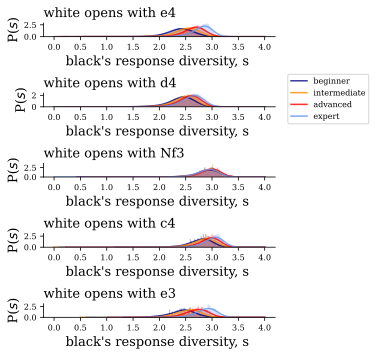

In [90]:

game_type_=2

#------------------------------------------------------
bins_=101

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']

CAREER_LEN_bins_=[50,10000]
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

all_elo=np.array([])
for white_move in count_first_white.most_common()[0:n_white]:
    all_elo=np.append( all_elo,   player_elo_FILTER_black_move1[str(game_type_)][white_move])

    
ind_relevant__=np.where(all_elo>-1 );
X=all_elo[ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)



it_career_len=0;it_fig=0

fig = plt.figure(it_fig,figsize=(4, 1*n_white));
labels_all=[]
color_all=[]
hue_all=[]

for white_move in count_first_white.most_common()[0:n_white]:

    print(white_move)
    it_fig+=1
    if it_fig==1:
        ax = fig.add_subplot(n_white,1,it_fig);
    else:
        ax = fig.add_subplot(n_white,1,it_fig,sharex=ax);

    for it_bin in range(len(ELO_bins_)-1):

        line_stlye=LINES_[it_career_len]
        high_ind=np.where((player_elo_FILTER_black_move1[str(game_type_)][white_move]>ELO_bins_[it_bin])&\
                          (player_elo_FILTER_black_move1[str(game_type_)][white_move]<ELO_bins_[it_bin+1])&(player_elo_FILTER_black_move1[str(game_type_)][white_move]>-1)\
                         &(num_op_FILTER_black_move1[str(game_type_)][white_move]>CAREER_LEN_bins_[it_career_len])\
                         &(num_op_FILTER_black_move1[str(game_type_)][white_move]<CAREER_LEN_bins_[it_career_len+1]));
        high_ind=high_ind[0]
        X=entropy_black_move1[str(game_type_)][white_move][high_ind]
        store_for_test.append(X)
        X=X.reshape(-1, 1)
        p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
        kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X)
        s = np.linspace(min(X),4,nn)
        log_dens = kde.score_samples(s.reshape(-1,1))
        ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
#         labels_all.append(white_move[0]+', '+labels_[it_bin])
        labels_all.append(white_move[0])
        hue_all.append(labels_[it_bin])
        color_all.append(colors[it_bin])
    # ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
    # ax.legend(store_lines,leg_,loc=(1.04,0));

    xlab_=r"black's response diversity, s "
    ylab_=r'P($s$)'
    ax.set_xlabel(xlab_,fontsize=ff) 
    ax.set_ylabel(ylab_,fontsize=ff)        

#     for it_bin in range(len(ELO_bins_)-2):
#         print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
#               stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
#     it_bin=0
#     print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
#               stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

    # print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
    # print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))



    # ax = fig.add_subplot(2, 1, 2);
    # ax.hist(store_rating,bins_,alpha=.3);

    # ax.set_yscale('log',base=10)
    # ax.set_xticks(np.linspace(12,48,4));
    simpleaxis(ax,xlab_,ylab_)
#     if it_fig<n_white:
#         setp(ax.get_xticklabels(), visible=False)
#     setp(ax.get_yticklabels(), visible=False)
#        ax.legend(loc='upper left');
    ax.set_title('white opens with '+ white_move[0], fontsize=ff,loc='left')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.8),ncol=1)

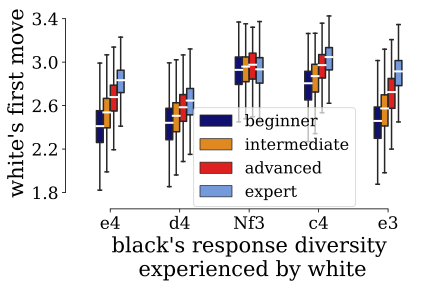

In [101]:
fig = plt.figure(0,figsize=(6, 4));
ff=21
ax = fig.add_subplot(1, 1,1);
# violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
it=-1
df_=pd.DataFrame(); it_=-1;row_=0
df_['']=[]
df_['skill level']=[]

for data_ in store_for_test:
    it_+=1
    df_=df_.append(pd.DataFrame(data_))
    rows_=pd.DataFrame(data_).shape[0]
    df_[''].iloc[row_:row_+rows_]=labels_all[it_]
    df_['skill level'].iloc[row_:row_+rows_]=hue_all[it_]
    row_=row_+rows_
# df_.columns=['',"black's response entropy"]
df_.columns=['',"black's response diversity",'skill level']
meanlineprops = dict(linestyle='-', linewidth=2, color='white')

# ax=sns.boxplot(y=df_["black's response entropy"],x=df_[''], width=.3,showfliers=False,medianprops=meanlineprops);
ax=sns.boxplot(x=df_["black's response diversity"],y=df_[''], width=.4,hue=df_['skill level'],palette=color_all
               ,showfliers=False,medianprops=meanlineprops,orient="v");

xlab_="black's response diversity\n experienced by white"
ylab_=("white's first move")

sns.despine(offset=10, trim=True)
# ax.set_yticks(fontsize=ff)
ax.tick_params(axis='both', which='major', labelsize=ff-4)
ax.set_yticks([1.8,2.2,2.6,3,3.4])
ax.legend(loc=(.34,-.04),fontsize=ff-5,frameon=True,framealpha=.7)
simpleaxis(ax,xlab_,ylab_)

plt.savefig(path_fig+'/fig_3b_response_entropy.png',dpi=300, bbox_inches = "tight")


In [37]:
# fig = plt.figure(0,figsize=(4, 4));
# ax = fig.add_subplot(1, 1,1);
# # violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
# it=-1
# df_=pd.DataFrame(); it_=-1;row_=0
# df_['']=[]
# for data_ in store_for_test:
#     it_+=1
#     df_=df_.append(pd.DataFrame(data_))
#     rows_=pd.DataFrame(data_).shape[0]
#     df_[''].iloc[row_:row_+rows_]=labels_all[it_]
#     row_=row_+rows_
# df_.columns=['',"black's response entropy"]
# meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')

# ax=sns.boxplot(y=df_["black's response entropy"],x=df_[''], width=.3,showfliers=False,medianprops=meanlineprops);
# ylab_=''
# # ax.set_xlim([0,5]);ax.set_xticks([0,1,2]);
# # ax.set_xticks(labels_)

# # Select which box you want to change    
# for it_ in range(20):
#     mybox = ax.artists[it_]

#     # Change the appearance of that box
#     mybox.set_facecolor(color_all[it_])
#     mybox.set_edgecolor(color_all[it_])
    
#     # mybox.set_linewidth(3)
# # ax.legend(labels_)

# labs_=[x.split(',')[0] for x in labels_all]
# ax.set_yticklabels(labs_)    
# xlab_=r"black's response entropy"

# ylab_=("white's first move")
# simpleaxis(ax,xlab_,ylab_)
# plt.savefig(path_fig+'/fig_3b_response_entropy.png',dpi=300, bbox_inches = "tight")


### Plot black response entropy, compare with white entropy


('e4', 141273874)
('d4', 60892268)
('Nf3', 8995024)
('c4', 8079218)
('e3', 6208050)


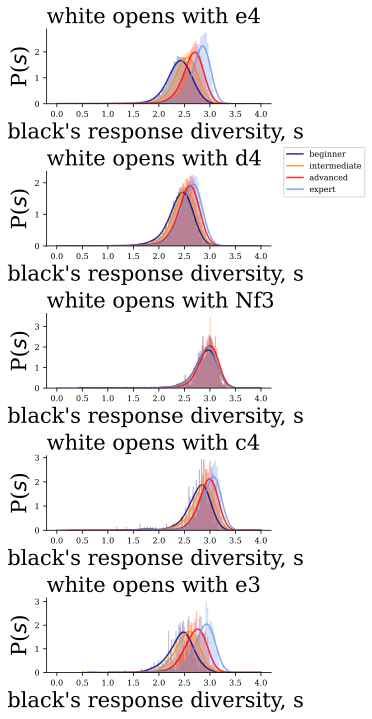

In [102]:

game_type_=2

#------------------------------------------------------
bins_=101

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[50,10000]
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']
all_elo=np.array([])
for white_move in count_first_white.most_common()[0:n_white]:
    all_elo=np.append( all_elo,   player_elo_FILTER_black_move1[str(game_type_)][white_move])

    
ind_relevant__=np.where(all_elo>-1 );
X=all_elo[ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)



it_career_len=0;it_fig=0

fig = plt.figure(it_fig,figsize=(4, 2*n_white));
labels_all=[]
color_all=[]
hue_all=[]
for white_move in count_first_white.most_common()[0:n_white]:

    print(white_move)
    it_fig+=1
    if it_fig==1:
        ax = fig.add_subplot(n_white,1,it_fig);
    else:
        ax = fig.add_subplot(n_white,1,it_fig,sharex=ax);

    for it_bin in range(len(ELO_bins_)-1):

        line_stlye=LINES_[it_career_len]
        high_ind=np.where((player_elo_FILTER_black_move1[str(game_type_)][white_move]>ELO_bins_[it_bin])&\
                          (player_elo_FILTER_black_move1[str(game_type_)][white_move]<ELO_bins_[it_bin+1])&\
                          (player_elo_FILTER_black_move1[str(game_type_)][white_move]>-1)\
                         &(num_op_FILTER_black_move1[str(game_type_)][white_move]>CAREER_LEN_bins_[it_career_len])\
                         &(num_op_FILTER_black_move1[str(game_type_)][white_move]<CAREER_LEN_bins_[it_career_len+1]));
        high_ind=high_ind[0]
        X=entropy_black_move1[str(game_type_)][white_move][high_ind]
        store_for_test.append(X)
        X=X.reshape(-1, 1)
        p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
        kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(X)
        s = np.linspace(min(X),4,nn)
        log_dens = kde.score_samples(s.reshape(-1,1))
        ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
        labels_all.append(white_move[0])
        hue_all.append(labels_[it_bin])
        color_all.append(colors[it_bin])
    # ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
    # ax.legend(store_lines,leg_,loc=(1.04,0));

    xlab_=r"black's response diversity, s "
    ylab_=r'P($s$)'
    ax.set_xlabel(xlab_,fontsize=ff) 
    ax.set_ylabel(ylab_,fontsize=ff)        

    simpleaxis(ax,xlab_,ylab_)
    ax.set_title('white opens with '+ white_move[0], fontsize=ff,loc='left')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.8),ncol=1)

In [813]:

# fig = plt.figure(0,figsize=(5, 4));
# ax = fig.add_subplot(1, 1,1);
# # violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
# it=-1
# df_=pd.DataFrame(); it_=-1;row_=0
# df_['']=[]
# df_['skill level']=[]

# for data_ in store_for_test:
#     it_+=1
#     df_=df_.append(pd.DataFrame(data_))
#     rows_=pd.DataFrame(data_).shape[0]
#     df_[''].iloc[row_:row_+rows_]=labels_all[it_]
#     df_['skill level'].iloc[row_:row_+rows_]=hue_all[it_]
#     row_=row_+rows_
# # df_.columns=['',"black's response entropy"]
# df_.columns=['',"black's response diversity",'skill level']
# meanlineprops = dict(linestyle='-', linewidth=2, color='white')

# # ax=sns.boxplot(y=df_["black's response entropy"],x=df_[''], width=.3,showfliers=False,medianprops=meanlineprops);
# ax=sns.boxplot(y=df_["black's response diversity"],x=df_[''], width=.4,hue=df_['skill level'],palette=color_all,showfliers=False,medianprops=meanlineprops);


# xlab_=r"black's response diversity, s "

# ylab_=("white's first move")
# sns.despine(offset=10, trim=True)
# ax.legend(loc=(.9,.65))
# simpleaxis(ax,xlab_,ylab_)

# plt.savefig(path_fig+'/fig_SI_response_entropy_as_black.png',dpi=300, bbox_inches = "tight")



In [58]:
# fig = plt.figure(0,figsize=(4, 5));
# ax = fig.add_subplot(1, 1,1);
# # violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
# it=-1
# df_=pd.DataFrame(); it_=-1;row_=0
# df_['']=[]
# df_["white's first move"]=[]
# for data_ in store_for_test:
#     it_+=1
#     df_=df_.append(pd.DataFrame(data_))
#     rows_=pd.DataFrame(data_).shape[0]
#     df_[''].iloc[row_:row_+rows_]=labels_all[it_]
#     df_["white's first move"].iloc[row_:row_+rows_]=hue_all[it_]

#     row_=row_+rows_
# df_.columns=['',"black's response entropy","white's first move"]
# meanlineprops = dict(linestyle='-', linewidth=1.5, color='white')

# ax=sns.boxplot(y=df_["black's response entropy"],x=df_[''],hue=df_["white's first move"], width=.4,showfliers=False,medianprops=meanlineprops);
# ylab_='white'
# # ax.set_xlim([0,5]);ax.set_xticks([0,1,2]);
# # ax.set_xticks(labels_)

# # Select which box you want to change    
# for it_ in range(20):
#     mybox = ax.artists[it_]

#     # Change the appearance of that box
#     mybox.set_facecolor(color_all[it_])
#     mybox.set_edgecolor(color_all[it_])
    
#     # mybox.set_linewidth(3)
# ax.legend()

# labs_=[x.split(',')[0] for x in labels_all]
# # ax.set_yticklabels(labs_)    
# xlab_=r"black's response entropy"

# ylab_=("white's first move")
# simpleaxis(ax,xlab_,ylab_)


### plot white entropy first move

beginner vs intermediate 
 KstestResult(statistic=0.1189102653098636, pvalue=6.807857327325709e-107)
intermediate vs advanced 
 KstestResult(statistic=0.04758078549092182, pvalue=3.7126567530362973e-19)
advanced vs expert 
 KstestResult(statistic=0.008543063267247408, pvalue=0.19382919376469487)
beginner vs advanced 
 KstestResult(statistic=0.16070424702266584, pvalue=1.9601359085824704e-235)


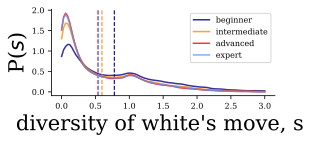

In [103]:

game_type_=2

bins_=101

colors = ['navy', 'darkorange','red', 'cornflowerblue']


CAREER_LEN_bins_=[50,10000]

# ind_relevant__=np.where(player_elo_for_FILTER_first_move[str(game_type_)]>-1 )\
#                 &(player_num_op_FILTER_first_move[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
#                 &(player_num_op_FILTER_first_move[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]);
ind_relevant__=np.where(player_elo_for_FILTER_first_move[str(game_type_)]>-1 );
X=player_elo_for_FILTER_first_move[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)

# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101
fig = plt.figure(0,figsize=(4, 2));
ax = fig.add_subplot(1, 1,1);

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']


# player_entropy_1_first_move={x:np.array(entropy_1_first_move[x]) for x in entropy_1_first_move.keys()}
# player_elo_for_FILTER_first_move={x:np.array(player_elo_FILTER_first_move[x]) for x in player_elo_FILTER_first_move.keys()}
# player_num_op_FILTER_first_move={x:np.array(num_op_FILTER_first_move[x]) for x in num_op_FILTER_first_move.keys()}
# player_entropy_1_at_500_first_move={x:np.array(entropy_1_at_500_first_move[x]) for x in entropy_1_at_500_first_move.keys()}
# player_entropy_1_at_1000_first_move={x:np.array(entropy_1_at_1000_first_move[x]) for x in entropy_1_at_1000_first_move.keys()}


labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
labels_[0]='ELO<'+str(ELO_bins_[1])
labels_[len(labels_)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0

for it_bin in range(len(ELO_bins_)-1):

    line_stlye=LINES_[it_career_len]
    high_ind=np.where((player_elo_for_FILTER_first_move[str(game_type_)]>ELO_bins_[it_bin])&\
                      (player_elo_for_FILTER_first_move[str(game_type_)]<ELO_bins_[it_bin+1])&(player_elo_for_FILTER_first_move[str(game_type_)]>-1)\
                     &(player_num_op_FILTER_first_move[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
                     &(player_num_op_FILTER_first_move[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
    high_ind=high_ind[0]
    X=player_entropy_1_first_move[str(game_type_)][high_ind]
    store_for_test.append(X)
    X=X.reshape(-1, 1)
#     p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
    kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
    s = np.linspace(0,3,nn)
    log_dens = kde.score_samples(s.reshape(-1,1))
    ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
    ax.axvline(np.mean(X), 0, 41, c=colors[it_bin], alpha=1, ls='--', label='', lw=1.1)  

# ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
# ax.legend(store_lines,leg_,loc=(1.04,0));
# ax.set(xlabel=r"opening entropy , s ", ylabel=r'P($s$)');
xlab_=r"diversity of white's move, s "
ylab_=r'P($s$)'
ax.set_xlabel(xlab_,fontsize=ff) 
ax.set_ylabel(ylab_,fontsize=ff)

for it_bin in range(len(ELO_bins_)-2):
    print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
it_bin=0
print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
# print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))

ax.legend(loc='upper right');


# ax = fig.add_subplot(2, 1, 2);
# ax.hist(store_rating,bins_,alpha=.3);

# ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));
simpleaxis(ax,xlab_,ylab_)

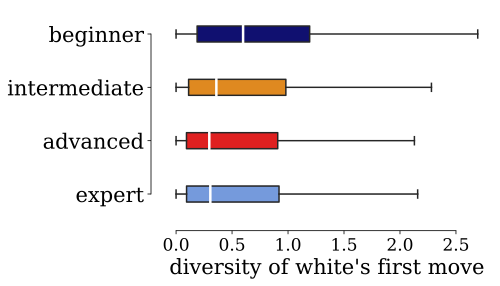

In [104]:
fig = plt.figure(0,figsize=(7, 4));
ax = fig.add_subplot(1, 1,1);
# violin_parts=ax.violinplot(store_for_test , showmeans=True,showextrema=False)
it=-1
ff=21

df_=pd.DataFrame(); it_=-1;row_=0
df_['']=[]
for data_ in store_for_test:
    it_+=1
    df_=df_.append(pd.DataFrame(data_))
    rows_=pd.DataFrame(data_).shape[0]
    df_[''].iloc[row_:row_+rows_]=labels_[it_]
    row_=row_+rows_
df_.columns=['','first move diversity']
meanlineprops = dict(linestyle='-', linewidth=2.5, color='white')
ax=sns.boxplot(x=df_[''],y=df_['first move diversity'],width=.3,showfliers=False,palette=color_all,medianprops=meanlineprops);
ylab_=''



# ax.set_xlim([0,5]);ax.set_xticks([0,1,2]);
# ax.set_xticks(labels_)

# Select which box you want to change    
# for it_ in range(4):
#     mybox = ax.artists[it_]

#     # Change the appearance of that box
# #     mybox.set_facecolor(colors[it_])
# #     mybox.set_edgecolor(colors[it_])
# #     mybox.set_linewidth(3)
    
xlab_=r"diversity of white's first move"
sns.despine(offset=10, trim=True)
ax.tick_params(axis='y', which='major', labelsize=ff)
ax.tick_params(axis='x', which='major', labelsize=ff-4)
simpleaxis(ax,xlab_,ylab_)
plt.savefig(path_fig+'/fig_3a_white_first_move_entropy.png',dpi=300, bbox_inches = "tight")


In [43]:

# game_type_=2

# from chess_functions import *
# from scipy import stats
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# from sklearn.neighbors import KernelDensity
# from sklearn.utils.fixes import parse_version

# # `normed` is being deprecated in favor of `density` in histograms
# if parse_version(matplotlib.__version__) >= parse_version('2.1'):
#     density_param = {'density': True}
# else:
#     density_param = {'normed': True}


# #------------------------------------------------------
# bins_=101

# colors = ['navy', 'darkorange','red', 'cornflowerblue']




# ind_relevant__=np.where(player_elo_for_FILTER_first_move[str(game_type_)]>-1 );
# X=player_elo_for_FILTER_first_move[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)

# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=101
# fig = plt.figure(0,figsize=(4, 2));
# ax = fig.add_subplot(1, 1,1);

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]

# # player_entropy_1_first_move={x:np.array(entropy_1_first_move[x]) for x in entropy_1_first_move.keys()}
# # player_elo_for_FILTER_first_move={x:np.array(player_elo_FILTER_first_move[x]) for x in player_elo_FILTER_first_move.keys()}
# # player_num_op_FILTER_first_move={x:np.array(num_op_FILTER_first_move[x]) for x in num_op_FILTER_first_move.keys()}
# # player_entropy_1_at_500_first_move={x:np.array(entropy_1_at_500_first_move[x]) for x in entropy_1_at_500_first_move.keys()}
# # player_entropy_1_at_1000_first_move={x:np.array(entropy_1_at_1000_first_move[x]) for x in entropy_1_at_1000_first_move.keys()}


# labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(ELO_bins_[1])
# labels_[len(labels_)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])

# it_career_len=0

# for it_bin in range(len(ELO_bins_)-1):

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_for_FILTER_first_move[str(game_type_)]>ELO_bins_[it_bin])&\
#                       (player_elo_for_FILTER_first_move[str(game_type_)]<ELO_bins_[it_bin+1])&(player_elo_for_FILTER_first_move[str(game_type_)]>-1)\
#                      &(player_num_op_FILTER_first_move[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
#                      &(player_num_op_FILTER_first_move[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     X=player_entropy_1_first_move[str(game_type_)][high_ind]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
#     p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
#     kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
#     s = np.linspace(min(X),4,nn)
#     log_dens = kde.score_samples(s.reshape(-1,1))
#     ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)


# # ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
# # ax.legend(store_lines,leg_,loc=(1.04,0));

# xlab_=r"first move entropy, s "
# ylab_=r'P($s$)'
# ax.set_xlabel(xlab_,fontsize=ff) 
# ax.set_ylabel(ylab_,fontsize=ff)        

# for it_bin in range(len(ELO_bins_)-2):
#     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
#           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# it_bin=0
# print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
#           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# # print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
# # print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))

# ax.legend(loc='upper left');


# # ax = fig.add_subplot(2, 1, 2);
# # ax.hist(store_rating,bins_,alpha=.3);

# # ax.set_yscale('log',base=10)
# # ax.set_xticks(np.linspace(12,48,4));
# simpleaxis(ax,xlab_,ylab_)

In [44]:
# entropy_ALL={'1':[],'2':[],'3':[]}

# for game_type_ in [1,2,3]: 
#     key_=str(game_type_)
#     ind_relevant=np.where((game_type_simplified_numeric==game_type_)&\
#                           (store_all_ELOs>-1)& (store_is_white==1) );

#     ops_rel=store_op_mains[ind_relevant]
#     ops_rel_vari=store_all_OPENINGS_variations[ind_relevant]
#     num_op_FILTER[key_].append(LL_)
#     entropy_ALL[key_].append(entropy_cal(ops_rel))
    

## Entropy: main vs variations plot

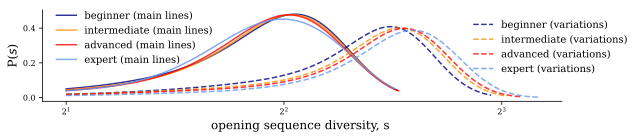

In [550]:

game_type_=2


#------------------------------------------------------
bins_=101
ff=12
colors = ['navy', 'darkorange','red', 'cornflowerblue']

# ind_relevant__=np.where((game_type_simplified_numeric==game_type_)&(store_all_ELOs>-1) );
# X=store_all_ELOs[ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101


store_for_test=[]
LINES_=['-.','-','--']
# LINES_=['-']
CAREER_LEN_bins_=[100,10000]


labels_1=[ 'beginner', 'intermediate', 'advanced', 'expert']

# labels_1=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
# labels_1[0]='ELO<'+str(ELO_bins_[1])
# labels_1[len(labels_1)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])
# labels_1=['weak','intermediate \nlvl 1','intermediate \nlvl 2', 'strong']

fig = plt.figure(1,figsize=(8, 2));
ax = fig.add_subplot(1, 1,1);
from matplotlib.legend import Legend

lines_=[]
for it_entropy in [1,2]:
    it_career_len=0
    line_stlye=LINES_[it_entropy]

    if it_entropy==1:
        labels_=[x+ ' (main lines) ' for x in labels_1]

    else:
        labels_=[x+ ' (variations) ' for x in labels_1]


    for it_bin in range(len(ELO_bins_)-1):

        high_ind=np.where((player_elo_for_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
                          (player_elo_for_FILTER[str(game_type_)]<ELO_bins_[it_bin+1])&(player_elo_for_FILTER[str(game_type_)]>-1)\
                         &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
                         &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
        high_ind=high_ind[0]
        if it_entropy==1:
            X=player_entropy_1[str(game_type_)][high_ind]
            
        else:
            X=player_entropy_2[str(game_type_)][high_ind]

        store_for_test.append(X)
        X=X.reshape(-1, 1)
    #     p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
        kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
        s = np.linspace(2,max(X),nn)
        log_dens = kde.score_samples(s.reshape(-1,1))
        if it_entropy==1:
            ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
        else:
            lines_+=ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],alpha=.8)
#         plt.fill_between([x[0] for x in s], np.exp(log_dens), color=colors[it_bin],alpha=.4)
        
        ls=line_stlye
        
#         ax.axvline(np.mean(X), 0, 41, c=colors[it_bin], alpha=1, ls=ls, label='', lw=1.5)  


    # ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
    # ax.legend(store_lines,leg_,loc=(1.04,0));
    # ax.set(xlabel=r"opening entropy , s ", ylabel=r'P($s$)');

    xlab_=r"opening sequence diversity, s "
    ylab_=r'P($s$)'
    ax.set_xlabel(xlab_,fontsize=ff) 
    ax.set_ylabel(ylab_,fontsize=ff) 
#     for it_bin in range(len(ELO_bins_)-2):
#         print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
#               stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
#     it_bin=0
#     print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
#               stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

    # print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
    # print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))

    ax.legend(loc="lower center", bbox_to_anchor=(0.18, 0.3),ncol=1,frameon=False,fontsize=10);
    leg = Legend(ax, lines_,labels_,loc='lower right', bbox_to_anchor=(1.15, 0.2), frameon=False,fontsize=10)
    ax.add_artist(leg);

    ff=12
    simpleaxis(ax,xlab_,ylab_)
    ax.set_xscale('log',base=2)
plt.savefig(path_fig+'/fig_4b_opening_entropy.png',dpi=300, bbox_inches = "tight")

#     ax.set_xticks()

ELO<1375 vs 1375<ELO<1500 
 KstestResult(statistic=0.1902402722949315, pvalue=1.492130936294488e-48)
1375<ELO<1500 vs 1500<ELO<1659 
 KstestResult(statistic=0.10838917180380594, pvalue=0.05378247968180494)
1500<ELO<1659 vs ELO>1659 
 KstestResult(statistic=0.12780716623361765, pvalue=0.009494783582852384)
ELO<1375 vs 1500<ELO<1659 
 KstestResult(statistic=0.16627916937713993, pvalue=0.0002314330753717675)


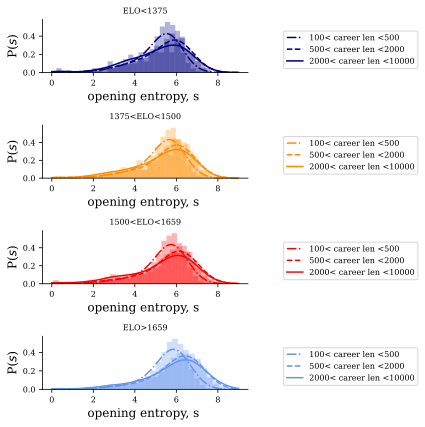

In [46]:

game_type_=2


from scipy import stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}


#------------------------------------------------------
bins_=30

colors = ['navy', 'darkorange','red', 'cornflowerblue']

ind_relevant__=np.where(player_elo_for_FILTER[str(game_type_)]>-1 );
X=player_elo_for_FILTER[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101
fig = plt.figure(0,figsize=(6, 6));

store_for_test=[]
LINES_=['-.','--','-']
CAREER_LEN_bins_=[100,500,2000,10000]


labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
labels_[0]='ELO<'+str(ELO_bins_[1])
labels_[len(labels_)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])
labels_1=[ 'beginner', 'intermediate', 'advanced', 'expert']

 
for it_bin in range(len(ELO_bins_)-1):
    ax = fig.add_subplot(len(ELO_bins_)-1, 1, it_bin+1);

    for it_career_len in range(len(CAREER_LEN_bins_)-1):
        line_stlye=LINES_[it_career_len]
        high_ind=np.where((player_elo_for_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
                          (player_elo_for_FILTER[str(game_type_)]<ELO_bins_[it_bin+1])&(player_elo_for_FILTER[str(game_type_)]>-1)\
                         &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
                         &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
        high_ind=high_ind[0]
        X=player_entropy_2[str(game_type_)][high_ind]
        store_for_test.append(X)
        X=X.reshape(-1, 1)
        p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
        kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
        s = np.linspace(0,9,nn)
        log_dens = kde.score_samples(s.reshape(-1,1))
        ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=str(CAREER_LEN_bins_[it_career_len])+\
                '< career len <'+str(CAREER_LEN_bins_[it_career_len+1]))
        ax.legend(loc="lower center", bbox_to_anchor=(1.5, 0),ncol=1);
        xlab_=r"opening entropy, s "
        ylab_=r'P($s$)'
        simpleaxis(ax,xlab_,ylab_)
    ax.set_title(labels_[it_bin],fontsize=8)
# ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
# ax.legend(store_lines,leg_,loc=(1.04,0));
# ax.set(xlabel=r"opening entropy , s ", ylabel=r'P($s$)');



for it_bin in range(len(ELO_bins_)-2):
    print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
it_bin=0
print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
# print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))



# ax = fig.add_subplot(2, 1, 2);
# ax.hist(store_rating,bins_,alpha=.3);

# ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));



beginner vs intermediate 
 KstestResult(statistic=0.18762726817059236, pvalue=1.0322982295303343e-50)
intermediate vs advanced 
 KstestResult(statistic=0.07556675062972293, pvalue=2.370522555180506e-05)
advanced vs expert 
 KstestResult(statistic=0.05999763066847797, pvalue=1.962897662444174e-05)
beginner vs advanced 
 KstestResult(statistic=0.11861754288764903, pvalue=1.9321377437217937e-20)


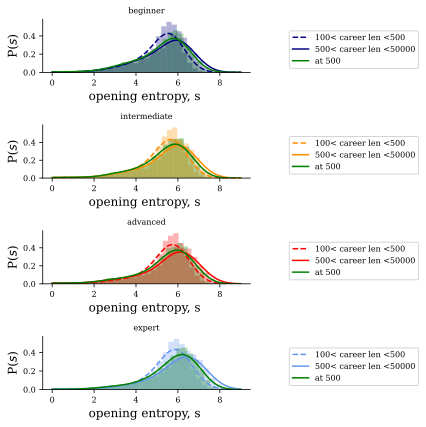

In [47]:

game_type_=2


from scipy import stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}


#------------------------------------------------------
bins_=30

colors = ['navy', 'darkorange','red', 'cornflowerblue']

ind_relevant__=np.where((player_elo_for_FILTER[str(game_type_)]>-1) );
X=player_elo_for_FILTER[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101
fig = plt.figure(0,figsize=(6, 6));

store_for_test=[]
LINES_=['--','-']
CAREER_LEN_bins_=[100,500,50000]
other_curves_=1

# labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(ELO_bins_[1])
# labels_[len(labels_)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

list_career_len_of_bin=[]
for it_bin in range(len(ELO_bins_)-1):
    ax = fig.add_subplot(len(ELO_bins_)-1, 1, it_bin+1);

    for it_career_len in range(len(CAREER_LEN_bins_)-1+other_curves_):
        if it_career_len<len(CAREER_LEN_bins_)-1:
            line_stlye=LINES_[it_career_len]
            color__=colors[it_bin]
            label__=str(CAREER_LEN_bins_[it_career_len])+\
                '< career len <'+str(CAREER_LEN_bins_[it_career_len+1])
            high_ind=np.where((player_elo_for_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
                              (player_elo_for_FILTER[str(game_type_)]<ELO_bins_[it_bin+1])&(player_elo_for_FILTER[str(game_type_)]>-1)\
                             &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
                             &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
            high_ind=high_ind[0] 
            list_career_len_of_bin.append(np.mean(player_num_op_FILTER[str(game_type_)][high_ind]))
            X=player_entropy_2[str(game_type_)][high_ind]

        else:
            X=player_entropy_2_at_500
            line_stlye='-'
            color__='g'
            label__='at 500'
            high_ind=np.where((player_elo_for_FILTER[str(game_type_)]>ELO_bins_[it_bin])&\
                              (player_elo_for_FILTER[str(game_type_)]<ELO_bins_[it_bin+1])&\
                              (player_elo_for_FILTER[str(game_type_)]>-1)\
                              &(X[str(game_type_)]>-1));
            high_ind=high_ind[0] 
            X=X[str(game_type_)][high_ind]
        
        
        store_for_test.append(X)
        X=X.reshape(-1, 1)
        p_=ax.hist(X,bins_,alpha=.3,density=True,color=color__);
        kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
        s = np.linspace(0,9,nn)
        log_dens = kde.score_samples(s.reshape(-1,1))
        ax.plot(s,np.exp(log_dens),line_stlye,color=color__,label=label__)
        ax.legend(loc="lower center", bbox_to_anchor=(1.5, 0),ncol=1);
        xlab_=r"opening entropy, s "
        ylab_=r'P($s$)'
        simpleaxis(ax,xlab_,ylab_)

    ax.set_title(labels_[it_bin],fontsize=8)
# ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
# ax.legend(store_lines,leg_,loc=(1.04,0));
# ax.set(xlabel=r"opening entropy , s ", ylabel=r'P($s$)');


for it_bin in range(len(ELO_bins_)-2):
    print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
it_bin=0
print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
# print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))



# ax = fig.add_subplot(2, 1, 2);
# ax.hist(store_rating,bins_,alpha=.3);

# ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));

# Suboptimal opening stratergy
_____________________________________________________
## Top 3 frequent openings vs win rates (as white) without first 100 games

In [48]:
# career_in_focus=len(career_indices)

# t_ic = time.time();
# from collections import Counter


# with open(path_dicts+'game_won_.pkl', 'rb') as f:
#     store_who_won_= pickle.load(f)
# store_who_won_=np.array(store_who_won_)

# def winrate_cal(ops_rel):

#     op_count=Counter(ops_rel)
#     op_count_=np.array(list(op_count.values()))
    
#     prob_=op_count_/np.sum(op_count_)
#     winrate_=-np.sum(np.multiply(prob_,np.log2(prob_)))
#     return winrate_

# #----------------------------------------------
# #----------------------------------------------
# player_op_wins_suboptimal={'1':[],'2':[],'3':[]}
# player_op_counts_suboptimal={'1':[],'2':[],'3':[]}
# # num_op_FILTER_suboptimal={'1':[],'2':[],'3':[]}
# player_elo_FILTER_suboptimal={'1':[],'2':[],'3':[]}

# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];


# for it in range(career_in_focus-1):

#     ind0=career_indices[it]+1
#     ind1=career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
#     won_=store_who_won_[ind0:ind1]

    
#     for game_type_ in [1,2,3]:         
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&(elos_>-1) & (is_white==1));
#         ops_rel=ops_[ind_relevant[0]]
#         # ops_rel_vari=ops_vari[ind_relevant[0]]
#         op_count=Counter(ops_rel)
       
#         LL_=ind_relevant[0].shape[0]
#         op_count______temp=op_count
#         if LL_>0:
#             op_count=op_count.most_common()
#             player_op_counts_suboptimal[key_].append(op_count)
            
            
#             player_elo_FILTER_suboptimal[key_].append(np.mean(elos_[ind_relevant]))
#             ind_relevant=np.where((type_==game_type_)&(elos_>-1) & (is_white==1) & (won_==1));
#             ops_rel=ops_[ind_relevant[0]]
#             op_wins=Counter(ops_rel)
            
#             player_op_wins_suboptimal[key_].append(op_wins)
            

#         else:
#             player_op_wins_suboptimal[key_].append(-1)
#             player_elo_FILTER_suboptimal[key_].append(-1)
#             player_op_counts_suboptimal[key_].append(-1)
 

#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


            

# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------
# player_elo_FILTER_suboptimal={x:np.array(player_elo_FILTER_suboptimal[x]) for x in player_elo_FILTER_suboptimal.keys()}

# with open(path_dicts+'player_op_wins_suboptimal.pkl', 'wb') as f:
#     pickle.dump(player_op_wins_suboptimal, f)

# with open(path_dicts+'player_op_counts_suboptimal.pkl', 'wb') as f:
#     pickle.dump(player_op_counts_suboptimal, f)

# with open(path_dicts+'player_elo_FILTER_suboptimal.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_suboptimal, f)

# # 


In [65]:
career_indices=store_career_indices

## suboptimality: fig a 

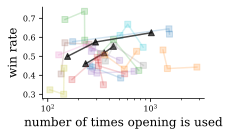

In [152]:
colors = sns.color_palette('tab20c')[0:20]
it_plot=-1
fig = plt.figure(0,figsize=(3,2));
ax = fig.add_subplot(1, 1,1);
for it_player in range(170000,200000):
    if player_op_counts_suboptimal['2'][it_player]!=-1:
        if player_op_counts_suboptimal['2'][it_player][0][1]>99:
            X=[];Y=[];
            
            for op_,tot_ in player_op_counts_suboptimal['2'][it_player]:
                if op_ in player_op_wins_suboptimal['2'][it_player]:
                    if tot_>100:
                        Y.append(player_op_wins_suboptimal['2'][it_player][op_]/tot_)
                        X.append(tot_)
            if len(X)>2:  
                it_plot=it_plot+1;X=np.array(X);Y=np.array(Y);
#                 X=np.array(X)/np.sum(np.array(X));
                X=X[0:3];Y=np.array(Y[0:3]);
                if sum(abs(sorted(Y,reverse=True)-Y))==0:
                    color='k'
                    ls='^-'
                    ax.plot(X,Y,ls,color=color,alpha=.7)
                else:
                    color='gray'
                    ls='s-'
                    ax.plot(X,Y,ls,alpha=.2)
                
    if it_plot>15:
        break
ax.set_xscale('log',base=10)
            

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('right')
# ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks([100,1000,])
# ax.set_yticks([.1,.3,.5,.7,.9])
# ax.set_yticks([.3,.5,.7,])
ax.set_ylabel('win rate')
ax.set_xlabel('probability of using the opening')
xlab_='number of times opening is used'
ylab_='win rate'
ff=12
# ax.axhline(y=0.5, xmin=0.0, xmax=1.0, color='gray',alpha=.2,linestyle='--')

simpleaxis(ax,xlab_,ylab_)
plt.savefig(path_fig+'/fig_5a_suboptimality_motifs.png',dpi=300, bbox_inches = "tight")


[0.4423076923076923, 0.4180327868852459, 0.3805309734513274]

array([0.39897698, 0.31202046, 0.28900256])

## Main opening analysis resumed (beyond first move)

## calling function

In [113]:
player_op_w_suboptimal,player_op_c_suboptimal,player_op_frac_times_played_suboptimal=get_suboptimality(player_op_wins_suboptimal,player_op_counts_suboptimal,player_elo_FILTER_suboptimal,store_career_indices)

In [114]:
winrates={'1':{'op1':[],'op2':[]},'2':{'op1':[],'op2':[]},'3':{'op1':[],'op2':[]}}
frac_diff2and1={'1':[],'2':[],'3':[]}
WINRATE_DIFF={'1':[],'2':[],'3':[]}

for game_type_ in [1,2,3]:
    
    g_type_=str(game_type_)
    for it_op__ in range(1,3):
        winrates[g_type_]['op'+str(it_op__)]=np.divide(player_op_w_suboptimal[g_type_]['op'+str(it_op__)],player_op_c_suboptimal[g_type_]['op'+str(it_op__)])
    

    frac_diff2and1[g_type_]=np.divide((player_op_c_suboptimal[g_type_]['op'+str(1)] -\
                             player_op_c_suboptimal[g_type_]['op'+str(2)]),\
                            player_op_c_suboptimal[g_type_]['op'+str(1)])
    
#     WINRATE_DIFF[g_type_]=np.divide((winrates[g_type_]['op'+str(1)] -\
#                              winrates[g_type_]['op'+str(2)]),\
#                             winrates[g_type_]['op'+str(1)])
    
    WINRATE_DIFF[g_type_]=(winrates[g_type_]['op'+str(1)] -\
                             winrates[g_type_]['op'+str(2)])
# ind_s=np.where((frac_diff2and1>.1)&(store_op_counts_[:,2]>100))
# ind_s=ind_s[0]
# WINRATES_=winrates[ind_s,1]-winrates[ind_s,2]


In [115]:
# player_total_op_counts_suboptimal_first_move=
career_indices=store_career_indices

career_in_focus=len(career_indices)
t_ic = time.time();
player_total_op_counts_suboptimal={'1':[],'2':[],'3':[]}

for it in range(career_in_focus-1):
    for game_type_ in [1,2,3]:   
        X=player_op_counts_suboptimal[str(game_type_)][it]
        if X !=-1:
            temp_=np.sum(np.array([x[1] for x in X]))
        else:
            temp_=-1
        player_total_op_counts_suboptimal[str(game_type_)].append(temp_)
for game_type_ in [1,2,3]:   
    player_total_op_counts_suboptimal[str(game_type_)]=np.array(player_total_op_counts_suboptimal[str(game_type_)])
            

# Specialization in openings

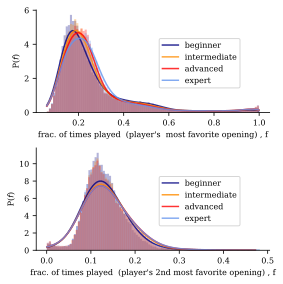

In [116]:
game_type_=2
ind_relevant__=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
                            &(player_op_c_suboptimal[str(game_type_)]['op'+str(1)]>100)\
                          &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(1)]>-1)
                          &(player_op_c_suboptimal[str(game_type_)]['op'+str(2)]>100)\
                          &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(2)]>-1));
X=player_elo_FILTER_suboptimal[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)


#------------------------------------------------------
bins_=101
op_considered=1

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_
fig = plt.figure(0,figsize=(4,4));

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]
ff=8

# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0

op_considered_lab=['','2nd']
for op_considered in [1,2]:    
    ax = fig.add_subplot(2, 1,op_considered);

    for it_bin in range(len(ELO_bins_)-1):

        line_stlye=LINES_[it_career_len]
        high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
                              &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
                              &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
#                       &(player_op_c_suboptimal[str(game_type_)]>100)\
                          &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(1)]>-1)\
                          &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(2)]>-1)\
                          &(player_total_op_counts_suboptimal[str(game_type_)]>100))
        
    #                       &(player_op_c_suboptimal_first_move[str(game_type_)]['op'+str(2)]>50)\
    #                       &(player_op_c_suboptimal_first_move[str(game_type_)]['op'+str(1)]>50)\
    #                           &(player_num_op_FILTER_first_move[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
    #                           &(player_num_op_FILTER_first_move[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
        high_ind=high_ind[0]
        X=player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(op_considered)][high_ind]
        store_for_test.append(X)
        X=X.reshape(-1, 1)
#         print(len(X))
        p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
        d=1;bb=(len(X) * (d + 2) / 4.)**(-1. / (d + 4))
        kde = KernelDensity(kernel='gaussian', bandwidth=0.03).fit(X)
        s = np.linspace(min(X),max(X),nn)
        log_dens = kde.score_samples(s.reshape(-1,1))
        ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
#         plt.fill_between([x[0] for x in s], np.exp(log_dens), color=colors[it_bin],alpha=.4)



    xlab_=r"frac. of times played  (player's "\
           +str(op_considered_lab[op_considered-1])+' most favorite opening) , f'
    ylab_=r'P($f$)'


    # for it_bin in range(len(ELO_bins_)-2):
    #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
    #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
    # it_bin=0
    # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
    #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

    ax.legend(loc="lower center", bbox_to_anchor=(.7, 0.2),ncol=1);    
    simpleaxis(ax,xlab_,ylab_)



## op1 vs op2: prevalence

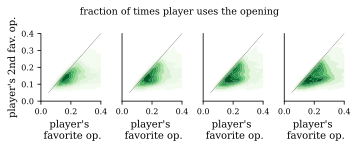

In [68]:

#------------------------------------------------------
bins_=101
op_considered=1

colors = ['navy','green', 'darkorange','red']
ff=10

# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']
# CAREER_LEN_bins_=[100,500,2000,10000]
CAREER_LEN_bins_=[100,100000]


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0

op_considered_lab=['','2nd']
fig = plt.figure(3,figsize=(5,2));

for num_op_thresh in [50]:

    it_plot=0


    for it_bin in range(len(ELO_bins_)-1):
        print(it_plot,end='\r')
        it_plot=it_plot+1
        ax = fig.add_subplot(1,4,it_plot);
    # for it_bin in range(1):
    #     ax = fig.add_subplot(2, 2,1+it_bin);

        line_stlye=LINES_[it_career_len]
    #     high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>ELO_bins_[it_bin])\
    #                           &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
    #                           &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
    #                           &(player_op_c_suboptimal[str(game_type_)]['op'+str(1)]>100)\
    #                           &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(1)]>-1)
    #                           &(player_op_c_suboptimal[str(game_type_)]['op'+str(2)]>100)\
    #                           &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(2)]>-1)\
    #                           &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
    #                           &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));


        high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
                              &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
                              &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
                          &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(1)]>-1)\
                      &(player_total_op_counts_suboptimal[str(game_type_)]>100)\
                          &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(2)]>-1)\
                          &(player_op_c_suboptimal[str(game_type_)]['op'+str(2)]>num_op_thresh)\
                          &(player_op_c_suboptimal[str(game_type_)]['op'+str(1)]>num_op_thresh))
    #                           &(player_num_op_FILTER_first_move[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
    #                           &(player_num_op_FILTER_first_move[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));

        high_ind=high_ind[0]
        X=player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(1)][high_ind]
        Y=player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(2)][high_ind]
        store_for_test.append(X)
        X=X.reshape(-1, 1)
        Y=Y.reshape(-1, 1)

    #     it_plot=it_plot+1
    #     ax = fig.add_subplot(4, 2,it_plot);

    #     p_=ax.plot(X,Y,'.',color=colors[it_bin],alpha=.1,label=labels_[it_bin]);
        xlab_=''
        ylab_=''

        # ax.set_title(r"p(op1)-p(op2)>0.1 p(op1) ",fontsize=ff);


#         simpleaxis(ax,xlab_,ylab_)


        #--------------------------------------
        # density plots
        #______________________________________
        
        a=np.array([y[0] for y in X])
        b=np.array([y[0] for y in Y])
        arr=np.zeros([a.shape[0],2]);arr[:,0]=a;arr[:,1]=b;
        df = pd.DataFrame(arr)
        df.columns=['elo','len']
        # libraries & dataset

            # Custom the color, add shade and bandwidth
    #     ax=sns.kdeplot(x=df.elo, y=df.len, cmap="Greens", shade=True, bw_adjust=.4,label=labels_[it_bin])
        if it_bin!=5:
            ax=sns.kdeplot(x=df.elo, y=df.len, cmap="Greens", shade=True, bw_adjust=.5,label=labels_[it_bin])
        ax.plot(np.linspace(0.05,.4,11),np.linspace(0.05,.4,11),'k-',linewidth=.2)
        ax.set_xlim([0,.4])
        ax.set_ylim([0,.4])
        #     ax.set_yscale('log')
        ylab_=''
        simpleaxis(ax,xlab_,ylab_)
#         ax.legend(loc="lower right", bbox_to_anchor=(.5, 1),ncol=1);    

        if it_bin==0 :
            ax.set_ylabel(r"player's "+str(op_considered_lab[2-1])+' fav. op.')
        if it_bin==1 or it_bin==2 or it_bin==3:
            ax.set_yticks([])
        else:
            ax.set_yticks([0,.1,.2,.3,.4])
        ax.set_xlabel(r"player's "+str(op_considered_lab[1-1])+'\n favorite op.')

plt.suptitle('fraction of times player uses the opening');
plt.tight_layout()


plt.savefig(path_fig+'/fig_4a_specialization_in_main_opening.png',dpi=300, bbox_inches = "tight")



In [117]:

# #------------------------------------------------------
# bins_=101
# op_considered=1

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 2));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]


# # labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# # labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# # labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# op_considered_lab=['','2nd']
# # for op_considered in [1,2]:    
# ax = fig.add_subplot(1, 1,op_considered);

# for it_bin in range(len(ELO_bins_)-1):

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
#                           &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
#                           &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
#                   &(player_total_op_counts_suboptimal[str(game_type_)]>500)\
#                       &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(1)]>-1)\
#                       &(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(2)]>-1))
# #                       &(player_op_c_suboptimal_first_move[str(game_type_)]['op'+str(2)]>50)\
# #                       &(player_op_c_suboptimal_first_move[str(game_type_)]['op'+str(1)]>50)\
# #                           &(player_num_op_FILTER_first_move[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                           &(player_num_op_FILTER_first_move[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));

#     high_ind=high_ind[0]
#     X=player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(1)][high_ind]
# #     +player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(2)][high_ind]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
# #         print(len(X))
# #     p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
#     kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
#     s = np.linspace(0,.9,nn)
#     log_dens = kde.score_samples(s.reshape(-1,1))
#     ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
# #     plt.fill_between(s, np.exp(log_dens), color=colors[it_bin],alpha=.4)

# xlab_=r"frac. of times played  (player's "\
#        +str(op_considered_lab[op_considered-1])+' top 2 openings) , f'
# ylab_=r'P($f$)';

# # for it_bin in range(len(ELO_bins_)-2):
# #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# # it_bin=0
# # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# # ax.legend(loc='upper left');
# ax.legend(loc="lower center", bbox_to_anchor=(.8, 0.3),ncol=1);    
# simpleaxis(ax,xlab_,ylab_)


# Winrates of top 2 most played openings

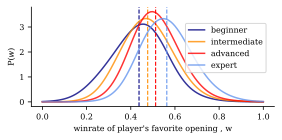

In [118]:

#------------------------------------------------------
bins_=101
op_considered=1

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_
fig = plt.figure(0,figsize=(4, 2));

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0

op_considered_lab=['','2nd ']
for op_considered in [1]:    
    ax = fig.add_subplot(1, 1,op_considered);

    for it_bin in range(len(ELO_bins_)-1):

        line_stlye=LINES_[it_career_len]
        high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>ELO_bins_[it_bin])\
                          &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
                          &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
                          &(player_op_c_suboptimal[str(game_type_)]['op'+str(op_considered)]>50)\
                          &(player_op_w_suboptimal[str(game_type_)]['op'+str(op_considered)]>-1))
    #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
    #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
        high_ind=high_ind[0]
        X=winrates[str(game_type_)]['op'+str(op_considered)][high_ind]
        store_for_test.append(X)
        X=X.reshape(-1, 1)
#         print(len(X))
#         p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
        kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
        s = np.linspace(0,1,nn)
        log_dens = kde.score_samples(s.reshape(-1,1))
        ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
        ax.axvline(np.mean(X), 0, 41, c=colors[it_bin], alpha=1, ls='--', label='', lw=1.1)  

#         plt.fill_between(s, np.exp(log_dens), color=colors[it_bin],alpha=.4)

    xlab_=r"winrate of player's "\
           +str(op_considered_lab[op_considered-1])+'favorite opening , w'
    ylab_=r'P($w$)'

    # for it_bin in range(len(ELO_bins_)-2):
    #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
    #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
    # it_bin=0
    # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
    #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))


    ax.legend(loc="lower center", bbox_to_anchor=(.8, 0.3),ncol=1);    
    simpleaxis(ax,xlab_,ylab_)


## Winrate op1 - op2

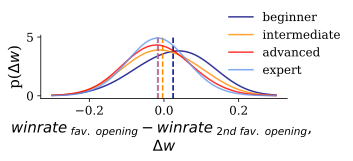

In [119]:

#------------------------------------------------------
bins_=101
op_considered=1
ff=15
colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_
fig = plt.figure(0,figsize=(5,2));

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0

op_considered_lab=['','2nd']
ax = fig.add_subplot(1, 1,1);


for it_bin in range(len(ELO_bins_)-1):

    line_stlye=LINES_[it_career_len]
    high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>ELO_bins_[it_bin])\
                          &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
                      &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
                              &(player_op_c_suboptimal[str(game_type_)]['op'+str(1)]>100)\
                              &(player_op_c_suboptimal[str(game_type_)]['op'+str(2)]>100)\
                              &(player_op_w_suboptimal[str(game_type_)]['op'+str(1)]>-1)
                             &(player_op_w_suboptimal[str(game_type_)]['op'+str(2)]>-1)\
                     &(frac_diff2and1[str(game_type_)]>=.05))
        #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
        #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
    high_ind=high_ind[0]
    X=winrates[str(game_type_)]['op'+str(1)][high_ind]-winrates[str(game_type_)]['op'+str(2)][high_ind]
    store_for_test.append(X)
    X=X.reshape(-1, 1)
    
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
#     print(len(X))
#     p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
    kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
    s = np.linspace(min(X),max(X),nn)
    s = np.linspace(-.3,.3,nn)
    log_dens = kde.score_samples(s.reshape(-1,1))
    ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
    ax.axvline(np.mean(X), 0, 41, c=colors[it_bin], alpha=1, ls='--', label='', lw=1.5)  
    
#     plt.fill_between(s, np.exp(log_dens), color=colors[it_bin],alpha=.4)

    
#         print(len(X))
#     p_=ax.plot(X,Y,'.',color=colors[it_bin],alpha=.4,label=labels_[it_bin]);

    
xlab_="$winrate_{\ fav.\ opening} - winrate_{\ 2nd \ fav. \ opening}$, \n$\Delta w$"
ylab_=r'p($\Delta w$)'
# ax.set_title(r"p(op1)-p(op2)>0.1 p(op1) ",fontsize=ff);
ax.tick_params(axis='both', which='major', labelsize=ff-3)


ax.legend(loc="lower center", bbox_to_anchor=(.99, 0.18), ncol=1, fontsize=ff-3, frameon=False);    
simpleaxis(ax,xlab_,ylab_)

plt.savefig(path_fig+'/fig_5b_specialization_in_main_opening.png',dpi=300, bbox_inches = "tight")


In [71]:
[len(x) for x in store_for_test]

[3249, 3222, 3335, 3371]

## Winrate op1 vs op2 :density plot

In [72]:

#------------------------------------------------------
bins_=101
op_considered=1

colors = ['navy','green', 'darkorange','red']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_
# fig = plt.figure(0,figsize=(4,8));

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0

op_considered_lab=['','2nd']
# ax = fig.add_subplot(3, 1,1);


# for it_bin in range(len(ELO_bins_)-1):

line_stlye=LINES_[it_career_len]
# high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
#                   &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
#                           &(player_op_c_suboptimal[str(game_type_)]['op'+str(1)]>50)\
#                           &(player_op_c_suboptimal[str(game_type_)]['op'+str(2)]>50)\
#                           &(player_op_w_suboptimal[str(game_type_)]['op'+str(1)]>-1)
#                          &(player_op_w_suboptimal[str(game_type_)]['op'+str(2)]>-1)\
#                  &(frac_diff2and1[str(game_type_)]>=.05))
#     #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
#     #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
# high_ind=high_ind[0]

high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
                          &(player_op_c_suboptimal[str(game_type_)]['op'+str(1)]>50)\
                          &(player_op_c_suboptimal[str(game_type_)]['op'+str(2)]>50)\
                          &(player_op_w_suboptimal[str(game_type_)]['op'+str(1)]>-1)
                         &(player_op_w_suboptimal[str(game_type_)]['op'+str(2)]>-1)\
                 &(frac_diff2and1[str(game_type_)]>=.05))
    #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
    #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
high_ind=high_ind[0]
X=winrates[str(game_type_)]['op'+str(1)][high_ind]
Y=winrates[str(game_type_)]['op'+str(2)][high_ind]
store_for_test.append(X)
X=X.reshape(-1, 1)
Y=Y.reshape(-1, 1)
#         print(len(X))
p_=ax.plot(X,Y,'.',color='k',alpha=.01,label=labels_[it_bin]);



xlab_=r"winrate opening 1"
ylab_=r"winrate opening 2"

# ax.set_title(r"p(op1)-p(op2)>0.1 p(op1) ",fontsize=ff);


ax.legend(loc="lower center", bbox_to_anchor=(1.4, 0.1),ncol=1);    
simpleaxis(ax,xlab_,ylab_)

   #--------------------------------------
# density plots
#______________________________________
a=np.array([y[0] for y in X])
b=np.array([y[0] for y in Y])
arr=np.zeros([a.shape[0],2]);arr[:,0]=a;arr[:,1]=b;
df = pd.DataFrame(arr)
df.columns=['elo','len']


<Figure size 432x288 with 0 Axes>

In [ ]:
fig = plt.figure(0,figsize=(3,3));
ff=12
ax = fig.add_subplot(1, 1,1);
ax=sns.kdeplot(x=df.elo, y=df.len, cmap="Reds", shade=True, bw_adjust=.5)
ax.plot(np.linspace(.1,.85,11),np.linspace(.1,.85,11),'k-',linewidth=.2)
#     ax.set_yscale('log')
xlab_=r"winrate of fav. opening "
ylab_=r"winrate 2nd fav. opening"
ax.set_xticks([0.25,.75])
ax.set_yticks([0.25,.75])
simpleaxis(ax,xlab_,ylab_)
plt.savefig(path_fig+'/fig_5a_kde_winrate1_vs_winrate2.png',dpi=300, bbox_inches = "tight")




## Winrate of op1 vs career stage (done wrong right now)

In [127]:

# #------------------------------------------------------
# bins_=101

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 6));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# CAREER_LEN_bins_=[200,2000,15000]
# # CAREER_LEN_bins_=[100,10000]


# # labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# # labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# # labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# # ax = fig.add_subplot(1, 1,1);
# op_considered=1
# xlab_=r"career length"
# ylab_=r"winrate("+str(op_considered)+")"
# for it_bin in range(len(ELO_bins_)-1):
#     ax = fig.add_subplot(len(ELO_bins_)-1, 1, it_bin+1);


#     line_stlye=LINES_[it_career_len]
    
#     high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
#                       &(player_op_c_suboptimal[str(game_type_)]['op'+str(op_considered)]>50)\
#                       &(player_op_w_suboptimal[str(game_type_)]['op'+str(op_considered)]>-1))

#     high_ind=high_ind[0]
#     Y=winrates[str(game_type_)]['op'+str(op_considered)][high_ind]
#     X=player_num_op_FILTER[str(game_type_)][high_ind]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
#     Y=Y.reshape(-1, 1)
#     p_=ax.plot(X,Y,'o',color=colors[it_bin],alpha=.01,label=labels_[it_bin]);
# #     ax.set_yscale('log');
#     ax.set_xscale('log');
# #     ax.set_ylim([-.3,.3]);
#     ax.legend(loc='upper left');
#     ax.legend(loc="lower center", bbox_to_anchor=(.8, 0.1),ncol=1);    
#     simpleaxis(ax,xlab_,ylab_)
    
# # ax.set(ylabel=r' , w', xlabel=r'career length');


# simpleaxis(ax,xlab_,ylab_)


    

# for it_bin in range(len(ELO_bins_)-2):
#     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
#           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# it_bin=0
# print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
#           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))




## suboptimality vs career stage

In [128]:

# #------------------------------------------------------
# bins_=101

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 6));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# CAREER_LEN_bins_=[200,2000,15000]
# # CAREER_LEN_bins_=[100,10000]


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# # ax = fig.add_subplot(1, 1,1);

# for it_bin in range(len(ELO_bins_)-1):
#     ax = fig.add_subplot(len(ELO_bins_)-1, 1, it_bin+1);


#     line_stlye=LINES_[it_career_len]
    
#     high_ind=np.where((player_elo_FILTER_suboptimal[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_suboptimal[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_suboptimal[str(game_type_)]>-1)\
#                       &(player_op_c_suboptimal[str(game_type_)]['op'+str(1)]>50)\
#                       &(player_op_c_suboptimal[str(game_type_)]['op'+str(2)]>50)\
#                       &(player_op_w_suboptimal[str(game_type_)]['op'+str(1)]>-1)\
#                       &(player_op_w_suboptimal[str(game_type_)]['op'+str(2)]>-1)\
#                       &(frac_diff2and1[str(game_type_)]>=.05))

#     high_ind=high_ind[0]
#     Y=WINRATE_DIFF[str(game_type_)][high_ind]
#     X=player_num_op_FILTER[str(game_type_)][high_ind]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
#     Y=Y.reshape(-1, 1)

#     p_=ax.plot(X,Y,'o',color=colors[it_bin],alpha=.01,label=labels_[it_bin]);
# #     ax.set_yscale('log');
#     ax.set_xscale('log');
#     ax.set_ylim([-.3,.3]);
#     ax.legend(loc='upper left');

    
# # ax.set(ylabel=r' , w', xlabel=r'career length');
#     xlab_=r"career length"
#     ylab_=r"winrate(1) - winrate(2)"


#     simpleaxis(ax,xlab_,ylab_)

    

# for it_bin in range(len(ELO_bins_)-2):
#     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
#           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# it_bin=0
# print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
#           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))




# Specialization: first move

In [129]:
# career_in_focus=len(career_indices)

# t_ic = time.time();
# from collections import Counter


# with open(path_dicts+'game_won_.pkl', 'rb') as f:
#     store_who_won_= pickle.load(f)
# store_who_won_=np.array(store_who_won_)

# def winrate_cal(ops_rel):

#     op_count=Counter(ops_rel)
#     op_count_=np.array(list(op_count.values()))
    
#     prob_=op_count_/np.sum(op_count_)
#     winrate_=-np.sum(np.multiply(prob_,np.log2(prob_)))
#     return winrate_

# #----------------------------------------------
# #----------------------------------------------
# player_op_wins_suboptimal_mov1={'1':[],'2':[],'3':[]}
# player_op_counts_suboptimal_mov1={'1':[],'2':[],'3':[]}
# # num_op_FILTER_suboptimal_mov1={'1':[],'2':[],'3':[]}
# player_elo_FILTER_suboptimal_mov1={'1':[],'2':[],'3':[]}

# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];


# for it in range(career_in_focus-1):

#     ind0=career_indices[it]+1
#     ind1=career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_first_w_move[ind0:ind1]
# #     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
#     won_=store_who_won_[ind0:ind1]

    
#     for game_type_ in [1,2,3]:         
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&(elos_>-1) & (is_white==1));
#         ops_rel=ops_[ind_relevant[0]]
#         # ops_rel_vari=ops_vari[ind_relevant[0]]
#         op_count=Counter(ops_rel)
       
#         LL_=ind_relevant[0].shape[0]
#         op_count______temp=op_count
#         if LL_>0:
#             op_count=op_count.most_common()
#             player_op_counts_suboptimal_mov1[key_].append(op_count)
            
            
#             player_elo_FILTER_suboptimal_mov1[key_].append(np.mean(elos_[ind_relevant]))
#             ind_relevant=np.where((type_==game_type_)&(elos_>-1) & (is_white==1) & (won_==1));
#             ops_rel=ops_[ind_relevant[0]]
#             op_wins=Counter(ops_rel)
            
#             player_op_wins_suboptimal_mov1[key_].append(op_wins)
            

#         else:
#             player_op_wins_suboptimal_mov1[key_].append(-1)
#             player_elo_FILTER_suboptimal_mov1[key_].append(-1)
#             player_op_counts_suboptimal_mov1[key_].append(-1)
   

#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


            

# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------
# player_elo_FILTER_suboptimal_mov1={x:np.array(player_elo_FILTER_suboptimal_mov1[x]) for x in player_elo_FILTER_suboptimal_mov1.keys()}

# with open(path_dicts+'player_op_wins_suboptimal_mov1.pkl', 'wb') as f:
#     pickle.dump(player_op_wins_suboptimal_mov1, f)

# with open(path_dicts+'player_op_counts_suboptimal_mov1.pkl', 'wb') as f:
#     pickle.dump(player_op_counts_suboptimal_mov1, f)

# with open(path_dicts+'player_elo_FILTER_suboptimal_mov1.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_suboptimal_mov1, f)

# # 


In [130]:
# t_ic = time.time();

# career_in_focus=len(career_indices)
# player_op_w_suboptimal_mov1={'1':{'op1':[],'op2':[]},'2':{'op1':[],'op2':[]},'3':{'op1':[],'op2':[]}}
# player_op_c_suboptimal_mov1={'1':{'op1':[],'op2':[]},'2':{'op1':[],'op2':[]},'3':{'op1':[],'op2':[]}}
# player_op_frac_times_played_suboptimal_mov1={'1':{'op1':[],'op2':[]},'2':{'op1':[],'op2':[]},'3':{'op1':[],'op2':[]}}

# for it in range(career_in_focus-1):

#     for game_type_ in [1,2,3]:         
#         g_type_=str(game_type_)

#         openings_=player_op_counts_suboptimal_mov1[g_type_][it]

#         if openings_==-1:
#             player_op_w_suboptimal_mov1[g_type_]['op'+str(1)].append(-1)
#             player_op_w_suboptimal_mov1[g_type_]['op'+str(2)].append(-1)
#             player_op_c_suboptimal_mov1[g_type_]['op'+str(1)].append(-1)
#             player_op_c_suboptimal_mov1[g_type_]['op'+str(2)].append(-1)
#             player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(1)].append(-1)
#             player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(2)].append(-1)
#         else:
            
#             openings_keys=[x[0] for x in openings_]
#             openings_count=[x[1] for x in openings_]
#             if len(openings_keys)>=2:
#                 for op__ in range(0,2):

#                     player_total_games=openings_count[op__]


#                     if op__ in player_op_wins_suboptimal_mov1[g_type_][it].keys():
#                         player_wins=player_op_wins_suboptimal_mov1[g_type_][it][openings_keys[op__]]
#                     else:
#                         player_wins=-1
                        

#                     player_op_w_suboptimal_mov1[g_type_]['op'+str(op__+1)].append(player_wins)
#                     player_op_c_suboptimal_mov1[g_type_]['op'+str(op__+1)].append(player_total_games)
#                     player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(op__+1)].append(player_total_games/sum(openings_count))
                    
                    

#             else:
#                 player_op_w_suboptimal_mov1[g_type_]['op'+str(1)].append(-1)
#                 player_op_w_suboptimal_mov1[g_type_]['op'+str(2)].append(-1)
#                 player_op_c_suboptimal_mov1[g_type_]['op'+str(1)].append(-1)
#                 player_op_c_suboptimal_mov1[g_type_]['op'+str(2)].append(-1)
#                 player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(1)].append(-1)
#                 player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(2)].append(-1)

#     if it % 50000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


# ###### making np arrays from lists
# for game_type_ in [1,2,3]:         
#     g_type_=str(game_type_)
#     player_op_w_suboptimal_mov1[g_type_]['op'+str(1)]=np.array(player_op_w_suboptimal_mov1[g_type_]['op'+str(1)])
#     player_op_w_suboptimal_mov1[g_type_]['op'+str(2)]=np.array(player_op_w_suboptimal_mov1[g_type_]['op'+str(2)])
#     player_op_c_suboptimal_mov1[g_type_]['op'+str(1)]=np.array(player_op_c_suboptimal_mov1[g_type_]['op'+str(1)])
#     player_op_c_suboptimal_mov1[g_type_]['op'+str(2)]=np.array(player_op_c_suboptimal_mov1[g_type_]['op'+str(2)])
#     player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(1)]=np.array(player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(1)])
#     player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(2)]=np.array(player_op_frac_times_played_suboptimal_mov1[g_type_]['op'+str(2)])


In [131]:
# for game_type_ in [1,2,3]:         
#     g_type_=str(game_type_)
#     player_elo_FILTER_first_move[g_type_]=np.array(player_elo_FILTER_first_move[g_type_])


In [132]:
# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_first_move[str(game_type_)]>-1);
# X=player_elo_FILTER_first_move[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)

# # player_entropy_1_first_move={x:np.array(entropy_1_first_move[x]) for x in entropy_1_first_move.keys()}
# # player_elo_for_FILTER_first_move={x:np.array(player_elo_FILTER_first_move[x]) for x in player_elo_FILTER_first_move.keys()}
# # player_num_op_FILTER_first_move={x:np.array(num_op_FILTER_first_move[x]) for x in num_op_FILTER_first_move.keys()}
# # player_entropy_1_at_500_first_move={x:np.array(entropy_1_at_500_first_move[x]) for x in entropy_1_at_500_first_move.keys()}
# # player_entropy_1_at_1000_first_move={x:np.array(entropy_1_at_1000_first_move[x]) for x in entropy_1_at_1000_first_move.keys()}


In [133]:
# #------------------------------------------------------
# bins_=51

# op_considered=1

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4,2));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# op_considered_lab=['','2nd']
# for op_considered in [1,2]:    
#     ax = fig.add_subplot(1, 2,op_considered);

#     for it_bin in range(len(ELO_bins_)-1):

#         line_stlye=LINES_[it_career_len]
#         high_ind=np.where((player_elo_FILTER_suboptimal_mov1[str(game_type_)]>ELO_bins_[it_bin])\
#                           &(player_elo_FILTER_suboptimal_mov1[str(game_type_)]<ELO_bins_[it_bin+1])\
#                           &(player_elo_FILTER_suboptimal_mov1[str(game_type_)]>-1)\
#                           &(player_op_c_suboptimal_mov1[str(game_type_)]['op'+str(op_considered)]>150)\
#                           &(player_op_frac_times_played_suboptimal_mov1[str(game_type_)]['op'+str(op_considered)]>-1))
#     #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
#     #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#         high_ind=high_ind[0]
#         X=player_op_frac_times_played_suboptimal_mov1[str(game_type_)]['op'+str(op_considered)][high_ind]
#         store_for_test.append(X)
#         X=X.reshape(-1, 1)
# #         print(len(X))
# #         p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
    
# #         params = {"bandwidth": np.logspace(-3, 0, 5)}
# #         grid = GridSearchCV(KernelDensity(), params)
# #         grid.fit(X)

# #         print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# #         # use the best estimator to compute the kernel density estimate
# #         kde = grid.best_estimator_
    

#         d=1
# #         bb=(len(X) * (d + 2) / 4.)**(-1. / (d + 4))
#         kde = KernelDensity(kernel='exponential', bandwidth=0.03).fit(X)
#         s = np.linspace(min(X),max(X),nn)
#         log_dens = kde.score_samples(s.reshape(-1,1))
#         ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)

        
#     xlab_=r"frac. of times played  (player's "+str(op_considered_lab[op_considered-1])+' most favorite first move) , f'
#     ylab_=r'P($f$)'


#     # for it_bin in range(len(ELO_bins_)-2):
#     #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
#     #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
#     # it_bin=0
#     # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
#     #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# #     ax.legend(loc='upper left');
# #     ax.set(yscale='log')
# ax.legend(loc="lower center", bbox_to_anchor=(1.2, 0.1),ncol=1);    


# simpleaxis(ax,xlab_,ylab_)

In [134]:
won_

array([1., 0.])

In [135]:
game_type_=2
ind_relevant__=np.where(player_elo_FILTER_suboptimal[str(game_type_)]>-1);
X=player_elo_FILTER_suboptimal[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)



# HOT-STREAKS

In [136]:
# career_in_focus=len(career_indices)
# # career_in_focus=41
# # career_in_focus=100000

# t_ic = time.time();
# from collections import Counter

# with open(path_dicts+'game_won_.pkl', 'rb') as f:
#     store_who_won_= pickle.load(f)
# store_who_won_=np.array(store_who_won_)

# #----------------------------------------------
# #----------------------------------------------
# player_hot_streak_lengths={'1':[],'2':[],'3':[]}
# player_cold_streak_lengths={'1':[],'2':[],'3':[]}
# player_elo_FILTER_hot_streaks={'1':[],'2':[],'3':[]}
# player_hot_streak_career_stage={'1':[],'2':[],'3':[]}
# player_hot_streak_op_frac_times_played={'1':[],'2':[],'3':[]}


# player_hot_streak_lengths_shuff={'1':[],'2':[],'3':[]}
# player_cold_streak_lengths_shuff={'1':[],'2':[],'3':[]}
# player_elo_FILTER_hot_streaks_shuff={'1':[],'2':[],'3':[]}
# player_hot_streak_career_stage_shuff={'1':[],'2':[],'3':[]}
# # player_hot_streak_op_frac_times_played_shuff={'1':[],'2':[],'3':[]}


# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# n_shuffle=100
# for it in range(career_in_focus-1):

#     ind0=career_indices[it]+1
#     ind1=career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
#     won_=store_who_won_[ind0:ind1]
    
#     for game_type_ in [1,2,3]:         
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&(elos_>-1)); # hot-streak contain games with black as well
#         LL_=ind_relevant[0].shape[0]
        
#         if LL_>120:
#             ind_relevant_elo=np.where((type_==game_type_)&(elos_>-1) & (is_white==1)); # for elo calc, only consider games as white

#             ind_relevant=ind_relevant[100:]
#             ops_=store_op_mains[ind0:ind1]
# #             wins_=(won_[ind_relevant]==1).astype(int) ## only wins are counted in win streak, DRAW = LOSS
#             wins_=(won_[ind_relevant]>0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak
#             elos_hot=elos_[ind_relevant]
            
#             ind_temp=(wins_[0:wins_.shape[0]-1]-wins_[1:wins_.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
            
#             if wins_[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]
#                 it_ll_=0
#                 for ll_ in hot_L:                    
#                     player_elo_FILTER_hot_streaks[key_].append(elo_hot)
#                     player_hot_streak_lengths[key_].append(ll_)
#                     player_cold_streak_lengths_shuff
#                     player_hot_streak_career_stage[key_].append(ind01[it_ll_])
#                     player_hot_streak_op_frac_times_played[key_].append(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(op_considered)][it])

#                     it_ll_=it_ll_+1
#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]
#                 it_ll_=0
#                 for ll_ in hot_L:
#                     player_elo_FILTER_hot_streaks[key_].append(elo_hot)
#                     player_hot_streak_lengths[key_].append(ll_)
#                     player_hot_streak_career_stage[key_].append(ind01[it_ll_])
#                     player_hot_streak_op_frac_times_played[key_].append(player_op_frac_times_played_suboptimal[str(game_type_)]['op'+str(op_considered)][it])
               
#                     it_ll_=it_ll_+1

                


# #SHUFFLE:WINS
#                 wins__shuffled=np.random.permutation(wins_)
#                 ind_temp=(wins__shuffled[0:wins__shuffled.shape[0]-1]-wins__shuffled[1:wins__shuffled.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)
#                 if wins__shuffled[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]
#                     it_ll_=0
#                     for ll_ in hot_L:                    
#                         player_elo_FILTER_hot_streaks_shuff[key_].append(elo_hot)
#                         player_hot_streak_lengths_shuff[key_].append(ll_)
#     #                     player_hot_streak_op_frac_times_played_shuff[key_].append(player_op_frac_times_played_suboptimal[str(game_type_)]['op1'][it])

#                         it_ll_=it_ll_+1
#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]
#                     it_ll_=0
#                     for ll_ in hot_L:
#                         player_elo_FILTER_hot_streaks_shuff[key_].append(elo_hot)
#                         player_hot_streak_lengths_shuff[key_].append(ll_)
#                         player_hot_streak_career_stage_shuff[key_].append(ind01[it_ll_])
#     #                     player_hot_streak_op_frac_times_played_shuff[key_].append(player_op_frac_times_played_suboptimal[str(game_type_)]['op1'][it])
#                         it_ll_=it_ll_+1

# # Losing streaks
#             losses_=(won_[ind_relevant]==0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak

#             ind_temp=(losses_[0:losses_.shape[0]-1]-losses_[1:losses_.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
            
#             if losses_[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]
#                 it_ll_=0
#                 for ll_ in hot_L:                    
#                     player_cold_streak_lengths[key_].append(ll_)

#                     it_ll_=it_ll_+1
#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]
#                 it_ll_=0
#                 for ll_ in hot_L:
#                     player_cold_streak_lengths[key_].append(ll_)
#                     it_ll_=it_ll_+1
                    
# #SHUFFLE:LOSING
#             losses__shuffled=np.random.permutation(losses_)
#             ind_temp=(losses__shuffled[0:losses__shuffled.shape[0]-1]-losses__shuffled[1:losses__shuffled.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
#             if losses__shuffled[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]
#                 it_ll_=0
#                 for ll_ in hot_L:                    
#                     player_cold_streak_lengths_shuff[key_].append(ll_)

#                     it_ll_=it_ll_+1
#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]
#                 it_ll_=0
#                 for ll_ in hot_L:
#                     player_cold_streak_lengths_shuff[key_].append(ll_)
#                     it_ll_=it_ll_+1
                

#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(career_in_focus-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/zz_HOT_STREAKS.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


            

# # #------------------------------------------------
# # # Saving the analysis
# # #------------------------------------------------
# player_elo_FILTER_hot_streaks={x:np.array(player_elo_FILTER_hot_streaks[x]) for x in player_elo_FILTER_hot_streaks.keys()}
# player_hot_streak_lengths={x:np.array(player_hot_streak_lengths[x]) for x in player_hot_streak_lengths.keys()}
# player_hot_streak_op_frac_times_played={x:np.array(player_hot_streak_op_frac_times_played[x]) for x in player_hot_streak_op_frac_times_played.keys()}
# player_cold_streak_lengths={x:np.array(player_cold_streak_lengths[x]) for x in player_cold_streak_lengths.keys()}
# player_cold_streak_lengths_shuff={x:np.array(player_cold_streak_lengths_shuff[x]) for x in player_cold_streak_lengths_shuff.keys()}

# player_elo_FILTER_hot_streaks_shuff={x:np.array(player_elo_FILTER_hot_streaks_shuff[x]) for x in player_elo_FILTER_hot_streaks_shuff.keys()}
# # player_hot_streak_lengths_shuff={x:np.array(player_hot_streak_lengths_shuff[x]) for x in player_hot_streak_lengths_shuff.keys()}
# # player_hot_streak_op_frac_times_played_shuff={x:np.array(player_hot_streak_op_frac_times_played_shuff[x]) for x in player_hot_streak_op_frac_times_played_shuff.keys()}


# # with open(path_dicts+'player_elo_FILTER_hot_streaks.pkl', 'wb') as f:
# #     pickle.dump(player_elo_FILTER_hot_streaks, f)

# with open(path_dicts+'player_cold_streak_lengths.pkl', 'wb') as f:
#     pickle.dump(player_cold_streak_lengths, f)
    
# with open(path_dicts+'player_cold_streak_lengths_shuff.pkl', 'wb') as f:
#     pickle.dump(player_cold_streak_lengths_shuff, f)
    
# # with open(path_dicts+'player_hot_streak_lengths.pkl', 'wb') as f:
# #     pickle.dump(player_hot_streak_lengths, f)

# # with open(path_dicts+'player_hot_streak_career_stage.pkl', 'wb') as f:
# #     pickle.dump(player_hot_streak_career_stage, f)
    
    
# # with open(path_dicts+'player_elo_FILTER_hot_streaks_shuff.pkl', 'wb') as f:
# #     pickle.dump(player_elo_FILTER_hot_streaks_shuff, f)

## Plotting hot-streaks 


In [137]:
# #------------------------------------------------------
# bins_=101
# op_considered=1

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 2));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]

# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_hot_streaks[str(game_type_)]>-1);
# X=player_elo_FILTER_hot_streaks[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# op_considered_lab=['','2nd']
# ax = fig.add_subplot(1, 1,1);

# for it_bin in range(len(ELO_bins_)-1):

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_FILTER_hot_streaks[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     max_hot=21
#     X=player_hot_streak_lengths[str(game_type_)][high_ind]
#     X=X[X<max_hot]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
    
    
#     d = np.diff(np.unique(X)).min()
#     left_of_first_bin = X.min() - float(d)/2
#     right_of_last_bin = X.max() + float(d)/2
#     counts, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
# #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#     xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
# #     ax.plot(xxxx,counts,color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6)

    
    
    
# #PLOTTING shuffled hot-streaks
#     high_ind=np.where((player_elo_FILTER_hot_streaks_shuff[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks_shuff[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks_shuff[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     X=player_hot_streak_lengths_shuff[str(game_type_)][high_ind]
#     X=X[X<max_hot]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)

#     d = np.diff(np.unique(X)).min()
#     left_of_first_bin = X.min() - float(d)/2
#     right_of_last_bin = X.max() + float(d)/2
#     counts_shuff, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
# #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#     xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
#     ax.plot(xxxx,counts,'o-',color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6)



# xlab_=r"hot streak length, $\ell$"
# ylab_=r'$p(\ell_{empirical}$'
# simpleaxis(ax,xlab_,ylab_)
# xx=np.arange(5,max_hot,5)
# xx[0]=1
# ax.set_xticks(xx)
# ax.set_yscale('log');

# # for it_bin in range(len(ELO_bins_)-2):
# #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# # it_bin=0
# # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# ax.legend(loc="lower center", bbox_to_anchor=(.8, 0.4),ncol=1);    



In [138]:
# #------------------------------------------------------
# bins_=101
# op_considered=1

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 2));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]

# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_hot_streaks[str(game_type_)]>-1);
# X=player_elo_FILTER_hot_streaks[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# op_considered_lab=['','2nd']
# ax = fig.add_subplot(1, 1,1);

# for it_bin in range(len(ELO_bins_)-1):

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_FILTER_hot_streaks[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     max_hot=21
#     X=player_hot_streak_lengths[str(game_type_)][high_ind]
#     X=X[X<max_hot]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
    
    
#     d = np.diff(np.unique(X)).min()
#     left_of_first_bin = X.min() - float(d)/2
#     right_of_last_bin = X.max() + float(d)/2
#     counts, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
# #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#     xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
# #     ax.plot(xxxx,counts,color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6)

    
    
    
# #PLOTTING shuffled hot-streaks
#     high_ind=np.where((player_elo_FILTER_hot_streaks_shuff[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks_shuff[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks_shuff[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     X=player_hot_streak_lengths_shuff[str(game_type_)][high_ind]
#     X=X[X<max_hot]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)

#     d = np.diff(np.unique(X)).min()
#     left_of_first_bin = X.min() - float(d)/2
#     right_of_last_bin = X.max() + float(d)/2
#     counts_shuff, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
# #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#     xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
#     ax.plot(xxxx,counts/counts_shuff,'o-',color=colors[it_bin],label=labels_[it_bin],alpha=.8+'',alpha=.6)



# xlab_=r"hot streak length, $\ell$"
# ylab_=r'$\frac{p(\ell_{empirical}}{p(\ell_{shuffled}}$'
# simpleaxis(ax,xlab_,ylab_)
# xx=np.arange(0,max_hot,5)
# xx[0]=1
# ax.set_xticks(xx)
# # ax.set_yscale('log');

# # for it_bin in range(len(ELO_bins_)-2):
# #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))

# # it_bin=0

# # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# ax.legend(loc='upper left');



## Plotting cold-streaks 


In [ ]:
# #------------------------------------------------------
# bins_=101
# op_considered=1

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 2));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]

# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_hot_streaks[str(game_type_)]>-1);
# X=player_elo_FILTER_hot_streaks[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# op_considered_lab=['','2nd']
# ax = fig.add_subplot(1, 1,1);

# for it_bin in range(len(ELO_bins_)-1):

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_FILTER_hot_streaks[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     max_hot=21
#     X=player_cold_streak_lengths[str(game_type_)][high_ind]
#     X=X[X<max_hot]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
    
    
#     d = np.diff(np.unique(X)).min()
#     left_of_first_bin = X.min() - float(d)/2
#     right_of_last_bin = X.max() + float(d)/2
#     counts, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
# #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#     xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
# #     ax.plot(xxxx,counts,color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6)

    
    
    
# #PLOTTING shuffled hot-streaks
#     high_ind=np.where((player_elo_FILTER_hot_streaks_shuff[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks_shuff[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks_shuff[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     X=player_cold_streak_lengths_shuff[str(game_type_)][high_ind]
#     X=X[X<max_hot]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)

#     d = np.diff(np.unique(X)).min()
#     left_of_first_bin = X.min() - float(d)/2
#     right_of_last_bin = X.max() + float(d)/2
#     counts_shuff, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
# #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#     xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
#     ax.plot(xxxx,counts,'o-',color=colors[it_bin],label=labels_[it_bin],alpha=.8+'',alpha=.6)



# xlab_=r"cold streak length, $\ell$"
# ylab_=r'$p(\ell_{empirical}$'
# simpleaxis(ax,xlab_,ylab_)
# xx=np.arange(0,max_hot,5)
# xx[0]=1
# ax.set_xticks(xx)
# ax.set_yscale('log');

# # for it_bin in range(len(ELO_bins_)-2):
# #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# # it_bin=0
# # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# ax.legend(loc="lower center", bbox_to_anchor=(.8, 0.4),ncol=1);    



In [ ]:
# #------------------------------------------------------
# bins_=101
# op_considered=1

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 2));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]

# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_hot_streaks[str(game_type_)]>-1);
# X=player_elo_FILTER_hot_streaks[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# op_considered_lab=['','2nd']
# ax = fig.add_subplot(1, 1,1);

# for it_bin in range(len(ELO_bins_)-1):

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_FILTER_hot_streaks[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     max_hot=21
#     X=player_cold_streak_lengths[str(game_type_)][high_ind]
#     X=X[X<max_hot]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
    
    
#     d = np.diff(np.unique(X)).min()
#     left_of_first_bin = X.min() - float(d)/2
#     right_of_last_bin = X.max() + float(d)/2
#     counts, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
# #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#     xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
# #     ax.plot(xxxx,counts,color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6)

    
    
    
# #PLOTTING shuffled hot-streaks
#     high_ind=np.where((player_elo_FILTER_hot_streaks_shuff[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks_shuff[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks_shuff[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     X=player_cold_streak_lengths_shuff[str(game_type_)][high_ind]
#     X=X[X<max_hot]
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)

#     d = np.diff(np.unique(X)).min()
#     left_of_first_bin = X.min() - float(d)/2
#     right_of_last_bin = X.max() + float(d)/2
#     counts_shuff, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
# #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#     xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
#     ax.plot(xxxx,counts/counts_shuff,'o-',color=colors[it_bin],label=labels_[it_bin],alpha=.8+'',alpha=.6)



# xlab_=r"cold streak length, $\ell$"
# ylab_=r'$\frac{p(\ell_{empirical}}{p(\ell_{shuffled}}$'
# simpleaxis(ax,xlab_,ylab_)
# xx=np.arange(0,max_hot,5)
# xx[0]=1
# ax.set_xticks(xx)
# # ax.set_yscale('log');

# # for it_bin in range(len(ELO_bins_)-2):
# #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# # it_bin=0
# # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# ax.legend(loc='upper left');



## Hot-streaks and Specialization in opening
Top 10 percent people in terms of specialization - fraction of times most played opening is played

weak vs weak 
 KstestResult(statistic=0.00486022509500228, pvalue=8.34677079734142e-21)
intermediate 
lvl 1 vs intermediate 
lvl 1 
 KstestResult(statistic=0.0030097589873990804, pvalue=3.246169627218474e-08)
intermediate 
lvl 2 vs intermediate 
lvl 2 
 KstestResult(statistic=0.0005534654578639997, pvalue=0.9216071858799559)
strong vs strong 
 KstestResult(statistic=0.008233205061003002, pvalue=3.211261022536846e-58)


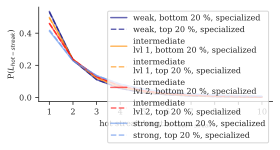

In [473]:
# #------------------------------------------------------
# bins_=101
# op_considered=1

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 2));

# store_for_test=[]
# LINES_=['-','--','-']
# LINES_=['-o']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]

# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_hot_streaks[str(game_type_)]>-1);
# X=player_elo_FILTER_hot_streaks[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# op_considered_lab=['','2nd']
# ax = fig.add_subplot(1, 1,1);
# store_for_test={}
# for it_bin in range(len(ELO_bins_)-1):
#     store_for_test[it_bin]=[]

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_FILTER_hot_streaks[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]>-1)\
#                      &(player_hot_streak_op_frac_times_played[str(game_type_)]>-1))
#     high_ind=high_ind[0]
#     X=player_hot_streak_lengths[str(game_type_)][high_ind]
#     XXX=player_hot_streak_op_frac_times_played[str(game_type_)][high_ind]
#     line_styles_=['-','--']
    
#     sorted_XXX=np.sort(np.array(XXX))
#     bottom_10=sorted_XXX[np.floor(2*sorted_XXX.shape[0]/10).astype('int')]
#     top_10=sorted_XXX[np.floor(8*sorted_XXX.shape[0]/10).astype('int')]
#     bottom_10=np.where(XXX<bottom_10)[0]
    
#     top_10=np.where(XXX>top_10)[0]
#     ranges_=[bottom_10,top_10]
#     label_add=['bottom 20 %, specialized', 'top 20 %, specialized']
#     for it_op_frac in range(2):
#         line_style=line_styles_[it_op_frac]
        
#         max_hot=11
        
#         X_plot=X[ranges_[it_op_frac]]
#         X_plot=X_plot[X_plot<max_hot]
#         store_for_test[it_bin].append(X_plot)

# #         store_for_test.append(X_plot)
#         X_plot=X_plot.reshape(-1, 1)

#         d = np.diff(np.unique(X_plot)).min()
#         left_of_first_bin = X_plot.min() - float(d)/2
#         right_of_last_bin = X_plot.max() + float(d)/2
#         counts, bin_edges = np.histogram(X_plot, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
#     #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#         xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
#         ax.plot(xxxx,counts,line_style,color=colors[it_bin],label=labels_[it_bin],alpha=.8+', '+label_add[it_op_frac],alpha=.6)


# xlab_=r"hot streak length, $L_{hot-streak}$"
# ylab_=r'P($L_{hot-streak}$)'
# simpleaxis(ax,xlab_,ylab_)
    
# ax.set_xticks(np.arange(1,max_hot))
# # ax.set_yscale('log');

# for it_bin in range(len(ELO_bins_)-1):
#     print(labels_[it_bin]+' vs '+ labels_[it_bin],'\n',
#           stats.ks_2samp(store_for_test[it_bin][0],store_for_test[it_bin][1]))

# ax.legend(loc='upper right');



In [ ]:
print(XXX[bottom_10],'\n',XXX[top_10])


## New version : mean length of hot-streak by player


In [88]:
# career_in_focus=len(store_career_indices)
# # career_in_focus=41
# # career_in_focus=100000

# t_ic = time.time();
# from collections import Counter

# with open(path_dicts+'game_won_.pkl', 'rb') as f:
#     store_who_won_= pickle.load(f)
# store_who_won_=np.array(store_who_won_)

# #----------------------------------------------
# #----------------------------------------------
# player_hot_streak_lengths_MEAN={'1':[],'2':[],'3':[]}
# player_cold_streak_lengths_MEAN={'1':[],'2':[],'3':[]}
# player_elo_FILTER_hot_streaks_MEAN={'1':[],'2':[],'3':[]}
# player_hot_streak_op_frac_times_played_MEAN={'1':[],'2':[],'3':[]}


# player_hot_streak_lengths_shuff_MEAN={'1':[],'2':[],'3':[]}
# player_cold_streak_lengths_shuff_MEAN={'1':[],'2':[],'3':[]}

# player_hot_streak_winrates_MEAN={'1':[],'2':[],'3':[]}

# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# n_shuffle=1

# for it in range(career_in_focus-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
#     won_=store_who_won_[ind0:ind1]
    
#     for game_type_ in [1,2,3]:         
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&(elos_>-1)); # hot-streak contain games with black as well
#         LL_=ind_relevant[0].shape[0]
        
#         if LL_>200:
#             ind_relevant_elo=np.where((type_==game_type_)&(elos_>-1) & (is_white==1)); # for elo calc, only consider games as white

#             ind_relevant=ind_relevant[100:]
#             ops_=store_op_mains[ind0:ind1]
# #             wins_=(won_[ind_relevant]==1).astype(int) ## only wins are counted in win streak, DRAW = LOSS
           
    
# # Win streaks     
#             L_wins=[]
#             wins_=(won_[ind_relevant]>0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak
#             elos_hot=elos_[ind_relevant]
            
#             ind_temp=(wins_[0:wins_.shape[0]-1]-wins_[1:wins_.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
            
#             if wins_[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]
#                 it_ll_=0
#                 for ll_ in hot_L:     
#                     L_wins.append(ll_)


#                     it_ll_=it_ll_+1
#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]
#                 it_ll_=0
#                 for ll_ in hot_L:
#                     L_wins.append(ll_)

               
#                     it_ll_=it_ll_+1
#             player_elo_FILTER_hot_streaks_MEAN[key_].append(elo_hot)
#             player_hot_streak_lengths_MEAN[key_].append(np.mean(np.array(L_wins)))

                

# #SHUFFLE:WINS
#             L_wins_shuff=[]
#             for it_shuffled in range(n_shuffle):
#                 wins__shuffled=np.random.permutation(wins_)
#                 ind_temp=(wins__shuffled[0:wins__shuffled.shape[0]-1]-wins__shuffled[1:wins__shuffled.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)
#                 if wins__shuffled[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]
#                     it_ll_=0
#                     for ll_ in hot_L:                    
#                         L_wins_shuff.append(ll_)

#                         it_ll_=it_ll_+1
#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]
#                     it_ll_=0
#                     for ll_ in hot_L:
#                         L_wins_shuff.append(ll_)

#                         it_ll_=it_ll_+1
#             player_hot_streak_lengths_shuff_MEAN[key_].append(np.mean(np.array(L_wins_shuff)))
#             player_hot_streak_winrates_MEAN[key_].append(sum(wins_)/len(wins_))

# # Losing streaks
#             L_loss=[]
#             losses_=(won_[ind_relevant]==0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak

#             ind_temp=(losses_[0:losses_.shape[0]-1]-losses_[1:losses_.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
            
#             if losses_[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]
#                 it_ll_=0
#                 for ll_ in hot_L:                    
#                     L_loss.append(ll_)

#                     it_ll_=it_ll_+1
#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]
#                 it_ll_=0
#                 for ll_ in hot_L:
#                     L_loss.append(ll_)
#                     it_ll_=it_ll_+1
#             player_cold_streak_lengths_MEAN[key_].append(np.mean(np.array(L_loss)))
                    
# #SHUFFLE:LOSING
#             L_loss_shuff=[]
#             for it_shuffled in range(n_shuffle):

#                 losses__shuffled=np.random.permutation(losses_)
#                 ind_temp=(losses__shuffled[0:losses__shuffled.shape[0]-1]-losses__shuffled[1:losses__shuffled.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)
#                 if losses__shuffled[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]
#                     it_ll_=0
#                     for ll_ in hot_L:                    
#                         L_loss_shuff.append(ll_)

#                         it_ll_=it_ll_+1
#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]
#                     it_ll_=0
#                     for ll_ in hot_L:
#                         L_loss_shuff.append(ll_)
#                         it_ll_=it_ll_+1

#             player_cold_streak_lengths_shuff_MEAN[key_].append(np.mean(np.array(L_loss_shuff)))



                

#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(career_in_focus-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/zz_HOT_STREAKS.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(store_career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(store_career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


            

# # #------------------------------------------------
# # # Saving the analysis
# # #------------------------------------------------
# player_elo_FILTER_hot_streaks_MEAN={x:np.array(player_elo_FILTER_hot_streaks_MEAN[x]) for x in player_elo_FILTER_hot_streaks_MEAN.keys()}
# player_hot_streak_lengths_MEAN={x:np.array(player_hot_streak_lengths_MEAN[x]) for x in player_hot_streak_lengths_MEAN.keys()}
# player_hot_streak_lengths_shuff_MEAN={x:np.array(player_hot_streak_lengths_shuff_MEAN[x]) for x in player_hot_streak_lengths_shuff_MEAN.keys()}
# player_cold_streak_lengths_MEAN={x:np.array(player_cold_streak_lengths_MEAN[x]) for x in player_cold_streak_lengths_MEAN.keys()}
# player_cold_streak_lengths_shuff_MEAN={x:np.array(player_cold_streak_lengths_shuff_MEAN[x]) for x in player_cold_streak_lengths_shuff_MEAN.keys()}
# player_hot_streak_winrates_MEAN={x:np.array(player_hot_streak_winrates_MEAN[x]) for x in player_hot_streak_winrates_MEAN.keys()}

# # player_elo_FILTER_hot_streaks_shuff_MEAN={x:np.array(player_elo_FILTER_hot_streaks_shuff_MEAN[x]) for x in player_elo_FILTER_hot_streaks_shuff_MEAN.keys()}

# # with open(path_dicts+'player_elo_FILTER_hot_streaks_MEAN.pkl', 'wb') as f:
# #     pickle.dump(player_elo_FILTER_hot_streaks_MEAN, f)

# with open(path_dicts+'player_hot_streak_lengths_MEAN.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_lengths_MEAN, f)
    
# with open(path_dicts+'player_hot_streak_lengths_shuff_MEAN.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_lengths_shuff_MEAN, f)
    
# with open(path_dicts+'player_elo_FILTER_hot_streaks_MEAN.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_hot_streaks_MEAN, f)
    
# with open(path_dicts+'player_hot_streak_winrates_MEAN.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_winrates_MEAN, f)

    
# with open(path_dicts+'player_cold_streak_lengths_MEAN.pkl', 'wb') as f:
#     pickle.dump(player_cold_streak_lengths_MEAN, f)
    
# with open(path_dicts+'player_cold_streak_lengths_shuff_MEAN.pkl', 'wb') as f:
#     pickle.dump(player_cold_streak_lengths_shuff_MEAN, f)

# with open(path_dicts+'player_hot_streak_winrates_MEAN.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_winrates_MEAN, f)


/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### plot new version

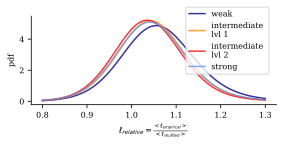

In [107]:
# #------------------------------------------------------
# bins_=101

# colors = ['navy', 'darkorange','red', 'cornflowerblue']

# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 2));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]

# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_hot_streaks_MEAN[str(game_type_)]>-1);
# X=player_elo_FILTER_hot_streaks_MEAN[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# ax = fig.add_subplot(1, 1,1);
# store_x_mean=[]
# for it_bin in range(len(ELO_bins_)-1):

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_FILTER_hot_streaks_MEAN[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks_MEAN[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks_MEAN[str(game_type_)]>-1))
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
#     high_ind=high_ind[0]
#     X=np.divide(player_hot_streak_lengths_MEAN[str(game_type_)][high_ind],player_hot_streak_lengths_shuff_MEAN[str(game_type_)][high_ind])
    
# #   X=np.divide(player_cold_streak_lengths_MEAN[str(game_type_)][high_ind],player_cold_streak_lengths_shuff_MEAN[str(game_type_)][high_ind])
#     store_for_test.append(X)
#     X=X.reshape(-1, 1)
#     ind=np.where(np.isnan(X)==0)[0]
#     X=X[ind]
#     store_x_mean.append(np.mean(X))

# #     p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
#     kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
#     s = np.linspace(.8,1.3,nn)
#     log_dens = kde.score_samples(s.reshape(-1,1))
#     ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
# #plt.fill_between(s, np.exp(log_dens), color=colors[it_bin],alpha=.4)

# # xlab_=r"hot streak length, $\ell$"
# xlab_=r'$\ell_{relative}=\frac{<\ell_{empirical}>}{<\ell_{shuffled}>}$'
# ylab_=r'pdf'

# # for it_bin in range(len(ELO_bins_)-2):
# #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# # it_bin=0
# # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))


# ax.legend(loc="lower center", bbox_to_anchor=(.8, 0.3),ncol=1);    
# simpleaxis(ax,xlab_,ylab_)





In [139]:
# #------------------------------------------------------
# bins_=101

# colors = ['navy', 'darkorange','red', 'cornflowerblue']

# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(7, 4));

# store_for_test=[]
# LINES_=['-.','--','-']
# LINES_=['-']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]

# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_hot_streaks_MEAN[str(game_type_)]>-1);
# X=player_elo_FILTER_hot_streaks_MEAN[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# ax = fig.add_subplot(2, 1,1);

# # for it_bin in range(len(ELO_bins_)-1):

# line_stlye=LINES_[it_career_len]
# high_ind=np.where(player_elo_FILTER_hot_streaks_MEAN[str(game_type_)]>-1)
# #                       &(player_num_op_FILTER[str(game_type_)]>CAREER_LEN_bins_[it_career_len])\
# #                       &(player_num_op_FILTER[str(game_type_)]<CAREER_LEN_bins_[it_career_len+1]));
# high_ind=high_ind[0]
# X=np.divide(player_hot_streak_lengths_MEAN[str(game_type_)][high_ind],player_hot_streak_lengths_shuff_MEAN[str(game_type_)][high_ind])
# Y=player_elo_FILTER_hot_streaks_MEAN[str(game_type_)][high_ind]
# #   X=np.divide(player_cold_streak_lengths_MEAN[str(game_type_)][high_ind],player_cold_streak_lengths_shuff_MEAN[str(game_type_)][high_ind])
# store_for_test.append(X)
# X=X.reshape(-1, 1)
# ind=np.where(np.isnan(X)==0)[0]
# X=X[ind]
# Y=Y[ind]

# #     p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
# # kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(X)
# # s = np.linspace(.8,1.3,nn)
# # log_dens = kde.score_samples(s.reshape(-1,1))
# # ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
# #plt.fill_between(s, np.exp(log_dens), color=colors[it_bin],alpha=.4)

# # xlab_=r"hot streak length, $\ell$"
# xlab_=r'$\ell_{relative}=\frac{<\ell_{empirical}>}{<\ell_{shuffled}>}$'
# ylab_=r'ELO'

# # for it_bin in range(len(ELO_bins_)-2):
# #     print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
# # it_bin=0
# # print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
# #           stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# p_=ax.plot(Y,X,'.',color='k',alpha=.01,label=labels_[it_bin]);
# ax.set_ylim([.7,1.3])


# simpleaxis(ax,xlab_,ylab_)
# ax.legend(loc="lower center", bbox_to_anchor=(1.4, 0.1),ncol=1);    
# # ax.set_title(r"p(op1)-p(op2)>0.1 p(op1) ",fontsize=ff);

# # --------------------------------------
# # density plots
# # ______________________________________
# a=np.array(Y)
# b=np.array([y[0] for y in X])
# arr=np.zeros([a.shape[0],2]);arr[:,0]=a;arr[:,1]=b;
# df = pd.DataFrame(arr)
# df.columns=['elo','len']
# # libraries & dataset
# # Custom the color, add shade and bandwidth
# it_plot=1
# it_plot=it_plot+1
# ax = fig.add_subplot(2, 1,it_plot);
# ax=sns.kdeplot(x=df.elo, y=df.len, cmap="Reds", shade=True, bw_adjust=.5)
# # ax.plot(np.linspace(0,1,11),np.linspace(0,1,11),'k-',linewidth=.2)
# #     ax.set_yscale('log')
# ax.set_ylim([.9,1.15])

# # ax.legend(loc="lower center", bbox_to_anchor=(.8, 0.3),ncol=1);    
# # simpleaxis(ax,xlab_,ylab_)


# # ax.legend(loc="lower center", bbox_to_anchor=(1.4, 0.1),ncol=1);    
# simpleaxis(ax,xlab_,ylab_)



# CumulativeL Hot-streak

In [10]:
n_shuffle=50


In [16]:
# career_in_focus=len(store_career_indices)
# # career_in_focus=41
# # career_in_focus=100000

# t_ic = time.time();
# from collections import Counter

# with open(path_dicts+'game_won_.pkl', 'rb') as f:
#     store_who_won_= pickle.load(f)
# store_who_won_=np.array(store_who_won_)

# #----------------------------------------------
# #----------------------------------------------
# player_hot_streak_lengths_cumu={'1':{},'2':{},'3':{}}
# player_cold_streak_lengths_cumu={'1':{},'2':{},'3':{}}
# player_elo_FILTER_hot_streaks_cumu={'1':{},'2':{},'3':{}}
# player_hot_streak_op_frac_times_played_cumu={'1':{},'2':{},'3':{}}


# player_hot_streak_lengths_shuff_cumu={'1':{},'2':{},'3':{}}
# player_cold_streak_lengths_shuff_cumu={'1':{},'2':{},'3':{}}


# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];


# for it in range(career_in_focus-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
#     won_=store_who_won_[ind0:ind1]
    
#     for game_type_ in [1,2,3]:         
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&(elos_>-1)); # hot-streak contain games with black as well
#         LL_=ind_relevant[0].shape[0]
        

#         if LL_>200:
#             player_hot_streak_lengths_cumu[key_][it]=[]
#             player_cold_streak_lengths_cumu[key_][it]=[]
#             player_elo_FILTER_hot_streaks_cumu[key_][it]=[]
#     #         player_hot_streak_op_frac_times_played_cumu[key_][career_in_focus]=[]

#             player_hot_streak_lengths_shuff_cumu[key_][it]=[]
#             player_cold_streak_lengths_shuff_cumu[key_][it]=[]


#             ind_relevant_elo=np.where((type_==game_type_)&(elos_>-1) & (is_white==1)); # for elo calc, only consider games as white

#             ind_relevant=ind_relevant[100:]
#             ops_=store_op_mains[ind0:ind1]
# #             wins_=(won_[ind_relevant]==1).astype(int) ## only wins are counted in win streak, DRAW = LOSS
           
    
# # Win streaks     
#             L_wins=[]
#             wins_=(won_[ind_relevant]>0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak
#             elos_hot=elos_[ind_relevant]
            
#             ind_temp=(wins_[0:wins_.shape[0]-1]-wins_[1:wins_.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
            
#             if wins_[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#             player_elo_FILTER_hot_streaks_cumu[key_][it]=elo_hot
#             player_hot_streak_lengths_cumu[key_][it].append(hot_L)
                

# #SHUFFLE:WINS
            
#             for it_shuffled in range(n_shuffle):
#                 L_wins_shuff=[]
#                 wins__shuffled=np.random.permutation(wins_)
#                 ind_temp=(wins__shuffled[0:wins__shuffled.shape[0]-1]-wins__shuffled[1:wins__shuffled.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)
#                 if wins__shuffled[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#                 player_hot_streak_lengths_shuff_cumu[key_][it].append(hot_L)

# # Losing streaks
#             L_loss=[]
#             losses_=(won_[ind_relevant]==0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak

#             ind_temp=(losses_[0:losses_.shape[0]-1]-losses_[1:losses_.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
            
#             if losses_[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#             player_cold_streak_lengths_cumu[key_][it].append(hot_L)
                    
# #SHUFFLE:LOSING
            
#             for it_shuffled in range(n_shuffle):
#                 L_loss_shuff=[]
#                 losses__shuffled=np.random.permutation(losses_)
#                 ind_temp=(losses__shuffled[0:losses__shuffled.shape[0]-1]-losses__shuffled[1:losses__shuffled.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)
#                 if losses__shuffled[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#                 player_cold_streak_lengths_shuff_cumu[key_][it].append(hot_L)
               

#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(career_in_focus-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/zz_HOT_STREAKS.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(store_career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(store_career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------

# with open(path_dicts+'player_hot_streak_lengths_cumu.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_lengths_cumu, f)
# with open(path_dicts+'player_cold_streak_lengths_cumu.pkl', 'wb') as f:
#     pickle.dump(player_cold_streak_lengths_cumu, f)
# with open(path_dicts+'player_elo_FILTER_hot_streaks_cumu.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_hot_streaks_cumu, f)
# with open(path_dicts+'player_hot_streak_op_frac_times_played_cumu.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_op_frac_times_played_cumu, f)
# with open(path_dicts+'player_hot_streak_lengths_shuff_cumu.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_lengths_shuff_cumu, f)
# with open(path_dicts+'player_cold_streak_lengths_shuff_cumu.pkl', 'wb') as f:
#     pickle.dump(player_cold_streak_lengths_shuff_cumu, f)




In [11]:
    
with open(path_dicts+'player_hot_streak_lengths_cumu.pkl', 'rb') as f:
    player_hot_streak_lengths_cumu= pickle.load(f)
with open(path_dicts+'player_cold_streak_lengths_cumu.pkl', 'rb') as f:
    player_cold_streak_lengths_cumu= pickle.load(f)
with open(path_dicts+'player_elo_FILTER_hot_streaks_cumu.pkl', 'rb') as f:
    player_elo_FILTER_hot_streaks_cumu= pickle.load(f)
with open(path_dicts+'player_hot_streak_op_frac_times_played_cumu.pkl', 'rb') as f:
    player_hot_streak_op_frac_times_played_cumu= pickle.load(f)

with open(path_dicts+'player_hot_streak_lengths_shuff_cumu.pkl', 'rb') as f:
    player_hot_streak_lengths_shuff_cumu= pickle.load(f)
with open(path_dicts+'player_cold_streak_lengths_shuff_cumu.pkl', 'rb') as f:
    player_cold_streak_lengths_shuff_cumu= pickle.load(f)
    

In [ ]:
store_n_l_L={'1':{},'2':{},'3':{}}
store_n_l_L_shuff={'1':{},'2':{},'3':{}}
p_l_L={'1':{},'2':{},'3':{}}
elos_l_L={'1':{},'2':{},'3':{}}
L_=10
t_ic = time.time();

# for game_type_ in [1,2,3]:         
for game_type_ in [2]:         
    key_=str(game_type_)
#     for it in range(career_in_focus-1):
    it=0
    career_in_focus_=len(list(player_hot_streak_lengths_cumu[key_].keys()))
    
    for player_ in player_hot_streak_lengths_cumu[key_].keys():
        it=it+1
        X=np.array(player_hot_streak_lengths_cumu[key_][player_][0])
        
        store_n_l_L[key_][player_]=[];
        store_n_l_L_shuff[key_][player_]=[[] for it_shuf in range(n_shuffle)];
        
        for l_ in range(L_):
            store_n_l_L[key_][player_].append(np.sum(X>l_));
        # Shuff
        
        for it_shuf in range(n_shuffle):
            X=np.array(player_hot_streak_lengths_shuff_cumu[key_][player_][it_shuf])
            for l_ in range(L_):
                store_n_l_L_shuff[key_][player_][it_shuf].append(np.sum(X>l_));
            store_n_l_L_shuff[key_][player_][it_shuf]=np.array(store_n_l_L_shuff[key_][player_][it_shuf])
        store_n_l_L_shuff[key_][player_]=np.mean(store_n_l_L_shuff[key_][player_],0)
        
        
        # likelihood
        
        p_l_L[key_][player_]=np.divide(store_n_l_L[key_][player_],store_n_l_L_shuff[key_][player_])
        elos_l_L[key_][player_]=player_elo_FILTER_hot_streaks_cumu[key_][player_]

        
        if it % 1000 == 0:
            t_oc = time.time();
            print('game--',game_type_,'--career number=''--'+str(it/(career_in_focus_-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus_-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')



#             player_cold_streak_lengths_cumu[key_][it]
#             player_hot_streak_lengths_shuff_cumu[key_][it]
#             player_cold_streak_lengths_shuff_cumu[key_][it]

#             print(player_elo_FILTER_hot_streaks_cumu[key_][it])




<ipython-input-21-6ed468f0da89>:36: RuntimeWarning: invalid value encountered in true_divide
  p_l_L[key_][player_]=np.divide(store_n_l_L[key_][player_],store_n_l_L_shuff[key_][player_])
<ipython-input-21-6ed468f0da89>:36: RuntimeWarning: divide by zero encountered in true_divide
  p_l_L[key_][player_]=np.divide(store_n_l_L[key_][player_],store_n_l_L_shuff[key_][player_])


In [ ]:
#------------------------------------------------------
bins_=101

colors = ['navy', 'darkorange','red', 'cornflowerblue']
ff=14

# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_

store_for_test=[]
LINES_=['-o','-^','-s','-*']
# LINES_=['-o']

# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]
for game_type_ in [2]:
#     game_type_=1
    fig = plt.figure(game_type_,figsize=(4, 2));

    elos__in_use=np.array(list(elos_l_L[str(game_type_)].values()))
    ind_relevant__=np.where(elos__in_use>-1);
    X=elos__in_use[ind_relevant__[0]];
    ELO_bins_= get_ELO_bins(game_type_,X)

    X_orig= [x for x in p_l_L[str(game_type_)].values()]
    X_orig = np.array(X_orig)

    labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
    labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
    labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
    labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

    it_career_len=0

    op_considered_lab=['','2nd']
    ax = fig.add_subplot(1, 1,1);
    store_for_test=[]
    store_Y=[]
    for it_bin in range(len(ELO_bins_)-1):

        line_stlye=LINES_[it_bin]
        high_ind=np.where((elos__in_use>ELO_bins_[it_bin])\
                          &(elos__in_use<ELO_bins_[it_bin+1])\
                          &(elos__in_use>-1))
        high_ind=high_ind[0]
        X=X_orig[high_ind]
        Y=[]
        Y_err=[]
        for it_L in range(L_):
            Y.append(np.nanmean(X[:,it_L][~np.isinf(X[:,it_L])],0))
            Y_err.append(np.nanvar(X[:,it_L][~np.isinf(X[:,it_L])],0))
        Y_err=np.power(Y_err,.5)
        store_for_test.append(X)
        store_Y.append(Y)

        line_styles_=['-','--']
        xtic=np.linspace(1,L_,L_)    
#         ls=LS_[it_bin]
        ax.plot(xtic+(it_bin-2)/10,Y,line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.6)

    #     ax.errorbar(xtic+(it_bin-2)/10,Y,yerr=Y_err,fmt='o-',color=colors[it_bin],label=labels_[it_bin],alpha=.6)


    ylab_=r"$\frac{n^{emp}(\ell \geq L_{hotstreak})}{n^{null}(\ell \geq L_{hotstreak})}$"
    xlab_=r'$L_{hotstreak}$'
    simpleaxis(ax,xlab_,ylab_)
    ax.set_ylabel(ylab_,fontsize=ff+2)

    ax.set_xticks(xtic)
    # # ax.set_yscale('log');

    # for it_bin in range(len(ELO_bins_)-1):
    #     print(labels_[it_bin]+' vs '+ labels_[it_bin],'\n',
    #           stats.ks_2samp(store_for_test[it_bin][0],store_for_test[it_bin][1]))

    ax.legend(loc='upper left',ncol=1,fontsize=ff-4);

plt.savefig(path_fig+'/fig_2b_hotstreaks.png',dpi=300, bbox_inches = "tight")


### Hotstreaks vs career

In [ ]:
# career_in_focus=len(store_career_indices)


# N_STAGES=len(STAGES_)-1
# hot_vs_career={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# cold_vs_career={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# hot_vs_career_shuff={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# cold_vs_career_shuff={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}

# hot_vs_career_player_elo_FILTER={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# hot_vs_career_num_op_FILTER={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# hot_vs_career_op_frac_times_played={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# # cold_vs_career_op_frac_times_played=={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}

# t_ic = time.time();
# from collections import Counter

# with open(path_dicts+'game_won_.pkl', 'rb') as f:
#     store_who_won_= pickle.load(f)
# store_who_won_=np.array(store_who_won_)

# # #----------------------------------------------
# # #----------------------------------------------
# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];


# for it in range(career_in_focus-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
#     won_=store_who_won_[ind0:ind1]
    
#     for game_type_ in [1,2,3]:         
#         key_=str(game_type_)
#         ind_relevant1=np.where((type_==game_type_)&(elos_>-1)); # hot-streak contain games with black as well
#         LL_=ind_relevant1[0].shape[0]
# #         LL_=ops_rel.shape[0]
# #         if LL_>STAGES_[-1]:
# #             num_op_FILTER_career_sequence[key_].append(LL_)
# #             for career_stage in range(N_STAGES):
# #                 entropy_vs_career_sequence[key_][career_stage].append(entropy_cal(ops_rel[STAGES_[career_stage]:STAGES_[career_stage+1]]))

# #             player_elo_FILTER_career_sequence[key_].append(np.mean(elos_[ind_relevant][STAGES_[career_stage]:STAGES_[career_stage+1]]))

        
      

#         if LL_>STAGES_[-1]:
#             for career_stage in range(N_STAGES):
            
#                 hot_vs_career[key_][career_stage][it]=[]
#                 cold_vs_career[key_][career_stage][it]=[]
#                 hot_vs_career_player_elo_FILTER[key_][career_stage][it]=[]
#                 hot_vs_career_op_frac_times_played[key_][career_stage][it]=[]

#                 hot_vs_career_shuff[key_][career_stage][it]=[]
#                 cold_vs_career_shuff[key_][career_stage][it]=[]


#                 ind_relevant_elo=np.where((type_==game_type_)&(elos_>-1) & (is_white==1)); # for elo calc, only consider games as white

#                 ind_relevant=ind_relevant1[STAGES_[career_stage]:STAGES_[career_stage+1]]
#                 ops_=store_op_mains[ind0:ind1]
#                 wins_=(won_[ind_relevant]==1).astype(int) ## only wins are counted in win streak, DRAW = LOSS


# # Win streaks     
#                 L_wins=[]
#                 wins_=(won_[ind_relevant]>0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak
#                 elos_hot=elos_[ind_relevant]

#                 ind_temp=(wins_[0:wins_.shape[0]-1]-wins_[1:wins_.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)

#                 if wins_[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#                 hot_vs_career_player_elo_FILTER[key_][career_stage][it]=elo_hot
#                 hot_vs_career[key_][career_stage][it].append(hot_L)


# #SHUFFLE:WINS
            
#                 for it_shuffled in range(n_shuffle):
#                     L_wins_shuff=[]
#                     wins__shuffled=np.random.permutation(wins_)
#                     ind_temp=(wins__shuffled[0:wins__shuffled.shape[0]-1]-wins__shuffled[1:wins__shuffled.shape[0]])

#                     ind01=np.where(ind_temp==-1)[0]
#                     ind10=np.where(ind_temp==1)[0]
#                     LL__hot=min(ind10.shape[0],ind01.shape[0])
#                     elo_hot=np.mean(elos_hot)
#                     if wins__shuffled[0]==1:
#                         hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#                     else:
#                         hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#                     hot_vs_career_shuff[key_][career_stage][it].append(hot_L)

# # Losing streaks
#                 L_loss=[]
#                 losses_=(won_[ind_relevant]==0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak

#                 ind_temp=(losses_[0:losses_.shape[0]-1]-losses_[1:losses_.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)

#                 if losses_[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#                 cold_vs_career[key_][career_stage][it].append(hot_L)
                    
# #SHUFFLE:LOSING

#                 for it_shuffled in range(n_shuffle):
#                     L_loss_shuff=[]
#                     losses__shuffled=np.random.permutation(losses_)
#                     ind_temp=(losses__shuffled[0:losses__shuffled.shape[0]-1]-losses__shuffled[1:losses__shuffled.shape[0]])

#                     ind01=np.where(ind_temp==-1)[0]
#                     ind10=np.where(ind_temp==1)[0]
#                     LL__hot=min(ind10.shape[0],ind01.shape[0])
#                     elo_hot=np.mean(elos_hot)
#                     if losses__shuffled[0]==1:
#                         hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#                     else:
#                         hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#                     cold_vs_career_shuff[key_][career_stage][it].append(hot_L)


#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(career_in_focus-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/zz_HOT_vs_career.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(store_career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(store_career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------

# with open(path_dicts+'hot_vs_career.pkl', 'wb') as f:
#     pickle.dump(hot_vs_career, f)
# with open(path_dicts+'cold_vs_career.pkl', 'wb') as f:
#     pickle.dump(cold_vs_career, f)
# with open(path_dicts+'hot_vs_career_player_elo_FILTER.pkl', 'wb') as f:
#     pickle.dump(hot_vs_career_player_elo_FILTER, f)
# with open(path_dicts+'hot_vs_career_op_frac_times_played.pkl', 'wb') as f:
#     pickle.dump(hot_vs_career_op_frac_times_played, f)
# with open(path_dicts+'hot_vs_career_shuff.pkl', 'wb') as f:
#     pickle.dump(hot_vs_career_shuff, f)
# with open(path_dicts+'cold_vs_career_shuff.pkl', 'wb') as f:
#     pickle.dump(cold_vs_career_shuff, f)


In [19]:
# store_n_l_L_hot_career={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# store_n_l_L_shuff_hot_career={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# p_l_L_hot_career={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}
# elos_l_L_hot_career={'1':[{} for x in range(N_STAGES)],'2':[{} for x in range(N_STAGES)],'3':[{} for x in range(N_STAGES)]}

# L_=10
# t_ic = time.time();

# # for game_type_ in [1,2,3]:         
# for game_type_ in [2]:         
#     key_=str(game_type_)
# #     for it in range(career_in_focus-1):
#     it=0
#     career_in_focus_=len(list(player_cold_streak_lengths_cumu[key_].keys()))
    
#     for player_ in player_cold_streak_lengths_cumu[key_].keys():
#         it=it+1
#         X=np.array(player_cold_streak_lengths_cumu[key_][player_][0])
        
#         store_n_l_L_cold[key_][player_]=[];
#         store_n_l_L_shuff_cold[key_][player_]=[[] for it_shuf in range(n_shuffle)];
        
#         for l_ in range(L_):
#             store_n_l_L_cold[key_][player_].append(np.sum(X>l_));
#         # Shuff
        
#         for it_shuf in range(n_shuffle):
#             X=np.array(player_cold_streak_lengths_shuff_cumu[key_][player_][it_shuf])
#             for l_ in range(L_):
#                 store_n_l_L_shuff_cold[key_][player_][it_shuf].append(np.sum(X>l_));
#             store_n_l_L_shuff_cold[key_][player_][it_shuf]=np.array(store_n_l_L_shuff_cold[key_][player_][it_shuf])
#         store_n_l_L_shuff_cold[key_][player_]=np.mean(store_n_l_L_shuff_cold[key_][player_],0)
        
        
#         # likelihood
        
#         p_l_L_cold[key_][player_]=np.divide(store_n_l_L_cold[key_][player_],store_n_l_L_shuff_cold[key_][player_])
#         elos_l_L_cold[key_][player_]=player_elo_FILTER_hot_streaks_cumu[key_][player_]

        
#         if it % 1000 == 0:
#             t_oc = time.time();
#             print('game--',game_type_,'--career number=''--'+str(it/(career_in_focus_-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus_-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')



# #             player_cold_streak_lengths_cumu[key_][it]
# #             player_hot_streak_lengths_shuff_cumu[key_][it]
# #             player_cold_streak_lengths_shuff_cumu[key_][it]

# #             print(player_elo_FILTER_hot_streaks_cumu[key_][it])




# Cummulative Cold-streaks

In [ ]:
store_n_l_L_cold={'1':{},'2':{},'3':{}}
store_n_l_L_shuff_cold={'1':{},'2':{},'3':{}}
p_l_L_cold={'1':{},'2':{},'3':{}}
elos_l_L_cold={'1':{},'2':{},'3':{}}
L_=10
t_ic = time.time();

# for game_type_ in [1,2,3]:         
for game_type_ in [2]:         
    key_=str(game_type_)
#     for it in range(career_in_focus-1):
    it=0
    career_in_focus_=len(list(player_cold_streak_lengths_cumu[key_].keys()))
    
    for player_ in player_cold_streak_lengths_cumu[key_].keys():
        it=it+1
        X=np.array(player_cold_streak_lengths_cumu[key_][player_][0])
        
        store_n_l_L_cold[key_][player_]=[];
        store_n_l_L_shuff_cold[key_][player_]=[[] for it_shuf in range(n_shuffle)];
        
        for l_ in range(L_):
            store_n_l_L_cold[key_][player_].append(np.sum(X>l_));
        # Shuff
        
        for it_shuf in range(n_shuffle):
            X=np.array(player_cold_streak_lengths_shuff_cumu[key_][player_][it_shuf])
            for l_ in range(L_):
                store_n_l_L_shuff_cold[key_][player_][it_shuf].append(np.sum(X>l_));
            store_n_l_L_shuff_cold[key_][player_][it_shuf]=np.array(store_n_l_L_shuff_cold[key_][player_][it_shuf])
        store_n_l_L_shuff_cold[key_][player_]=np.mean(store_n_l_L_shuff_cold[key_][player_],0)
        
        
        # likelihood
        
        p_l_L_cold[key_][player_]=np.divide(store_n_l_L_cold[key_][player_],store_n_l_L_shuff_cold[key_][player_])
        elos_l_L_cold[key_][player_]=player_elo_FILTER_hot_streaks_cumu[key_][player_]

        
        if it % 1000 == 0:
            t_oc = time.time();
            print('game--',game_type_,'--career number=''--'+str(it/(career_in_focus_-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus_-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')



#             player_cold_streak_lengths_cumu[key_][it]
#             player_hot_streak_lengths_shuff_cumu[key_][it]
#             player_cold_streak_lengths_shuff_cumu[key_][it]

#             print(player_elo_FILTER_hot_streaks_cumu[key_][it])




In [ ]:
#------------------------------------------------------
bins_=101

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_

store_for_test=[]
LINES_=['-','--','-']
LINES_=['-o']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]
# for game_type_ in [1,2,3]:
for game_type_ in [2]:
#     game_type_=1
    fig = plt.figure(game_type_,figsize=(4, 2));

    elos__in_use=np.array(list(elos_l_L_cold[str(game_type_)].values()))
    ind_relevant__=np.where(elos__in_use>-1);
    X=elos__in_use[ind_relevant__[0]];
    ELO_bins_= get_ELO_bins(game_type_,X)

    X_orig= [x for x in p_l_L_cold[str(game_type_)].values()]
    X_orig = np.array(X_orig)

    labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
    labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
    labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
    labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

    it_career_len=0

    op_considered_lab=['','2nd']
    ax = fig.add_subplot(1, 1,1);
    store_for_test=[]
    store_Y=[]
    for it_bin in range(len(ELO_bins_)-1):

        line_stlye=LINES_[it_career_len]
        high_ind=np.where((elos__in_use>ELO_bins_[it_bin])\
                          &(elos__in_use<ELO_bins_[it_bin+1])\
                          &(elos__in_use>-1))
        high_ind=high_ind[0]
        X=X_orig[high_ind]
        Y=[]
        Y_err=[]
        for it_L in range(L_):
            Y.append(np.nanmean(X[:,it_L][~np.isinf(X[:,it_L])],0))
            Y_err.append(np.nanvar(X[:,it_L][~np.isinf(X[:,it_L])],0))
        Y_err=np.power(Y_err,.5)
        store_for_test.append(X)
        store_Y.append(Y)

        line_styles_=['-','--']
        xtic=np.linspace(1,L_,L_)    
        ax.plot(xtic+(it_bin-2)/10,Y,'o-',color=colors[it_bin],label=labels_[it_bin],alpha=.6)

    #     ax.errorbar(xtic+(it_bin-2)/10,Y,yerr=Y_err,fmt='o-',color=colors[it_bin],label=labels_[it_bin],alpha=.6)


    ylab_=r"$\frac{n^{emp}(\ell_{coldstreak} \geq L)}{n^{null}(\ell_{coldstreak} \geq L)}$"
    xlab_=r'$\ell_{coldstreak}$'
    simpleaxis(ax,xlab_,ylab_)
    ax.set_ylabel(ylab_,fontsize=12)

    ax.set_xticks(xtic)
    # # ax.set_yscale('log');

    # for it_bin in range(len(ELO_bins_)-1):
    #     print(labels_[it_bin]+' vs '+ labels_[it_bin],'\n',
    #           stats.ks_2samp(store_for_test[it_bin][0],store_for_test[it_bin][1]))

    ax.legend(loc='upper left',ncol=1);

plt.savefig(path_fig+'/fig_SI_coldstreaks.png',dpi=300, bbox_inches = "tight")


# Are wins more clustered than losses?

In [ ]:
#------------------------------------------------------
bins_=101

colors = ['indianred', 'slategray']
colors=['indianred', 'royalblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']
ff=14
nn=bins_

store_for_test=[]
LINES_=['-^','-v']
# LINES_=['-o']
list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]
for game_type_ in [2]:
    
#     game_type_=1
    fig = plt.figure(game_type_,figsize=(4, 2));
    ax = fig.add_subplot(1, 1,1);

    for it_hot_or_cold in [1,2]:
        if it_hot_or_cold==1:
            
            elos__in_use=np.array(list(elos_l_L[str(game_type_)].values()))
            ind_relevant__=np.where(elos__in_use>-1);
            X=elos__in_use[ind_relevant__[0]];
            ELO_bins_= get_ELO_bins(game_type_,X)
            X_orig= [x for x in p_l_L[str(game_type_)].values()]
            X_orig = np.array(X_orig)

        else:
            elos__in_use=np.array(list(elos_l_L_cold[str(game_type_)].values()))
            ind_relevant__=np.where(elos__in_use>-1);
            X=elos__in_use[ind_relevant__[0]];
            ELO_bins_= get_ELO_bins(game_type_,X)

            X_orig= [x for x in p_l_L_cold[str(game_type_)].values()]
            X_orig = np.array(X_orig)


        labels_=['hot','cold']

        it_career_len=0

        store_for_test=[]
        store_Y=[]

        line_stlye=LINES_[it_hot_or_cold-1]
        high_ind=np.where(elos__in_use>-1)
        high_ind=high_ind[0]
        X=X_orig[high_ind]
        Y=[]
        Y_err=[]
        for it_L in range(L_):
            Y.append(np.nanmean(X[:,it_L][~np.isinf(X[:,it_L])],0))
            Y_err.append(np.nanvar(X[:,it_L][~np.isinf(X[:,it_L])],0))
        Y_err=np.power(Y_err,.5)
        store_for_test.append(X)
        store_Y.append(Y)

        line_styles_=['-','--']
        xtic=np.linspace(1,L_,L_)    
        ax.plot(xtic+(it_bin-2)/10,Y,line_stlye,color=colors[it_hot_or_cold-1],label=labels_[it_hot_or_cold-1],alpha=.6)

#         ax.errorbar(xtic+(it_bin-2)/10,Y,yerr=Y_err,fmt='o-',color=colors[it_hot_or_cold-1],label=labels_[it_hot_or_cold-1],alpha=.6)


        ylab_=r"$\frac{n^{emp}(\ell \geq L_{streak})}{n^{null}(\ell \geq L_{streak})}$"
        xlab_=r'$L_{streak}$'
        simpleaxis(ax,xlab_,ylab_)
        ax.set_ylabel(ylab_,fontsize=ff+2)

        ax.set_xticks(xtic)
        # # ax.set_yscale('log');

        # for it_bin in range(len(ELO_bins_)-1):
        #     print(labels_[it_bin]+' vs '+ labels_[it_bin],'\n',
        #           stats.ks_2samp(store_for_test[it_bin][0],store_for_test[it_bin][1]))

        ax.legend(loc='upper left',ncol=1,fontsize=ff-4);

#         ax.set_title(list_types[int(game_type_)-1],fontsize=ff,loc='left')
plt.savefig(path_fig+'/fig_2a_streaks.png',dpi=300, bbox_inches = "tight")


# Cumulative streaks: Just games as WHITE: one trick pony?

## Cummulative hotstreaks


In [ ]:
# career_in_focus=len(store_career_indices)
# # career_in_focus=41
# # career_in_focus=100000

# t_ic = time.time();

# #----------------------------------------------
# #----------------------------------------------
# player_hot_streak_lengths_cumu_white_only={'1':{},'2':{},'3':{}}
# player_cold_streak_lengths_cumu_white_only={'1':{},'2':{},'3':{}}
# player_elo_FILTER_hot_streaks_cumu_white_only={'1':{},'2':{},'3':{}}
# player_hot_streak_op_frac_times_played_cum_white_onlyu={'1':{},'2':{},'3':{}}


# player_hot_streak_lengths_shuff_cumu_white_only={'1':{},'2':{},'3':{}}
# player_cold_streak_lengths_shuff_cumu_white_only={'1':{},'2':{},'3':{}}


# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# n_shuffle=50

# for it in range(career_in_focus-1):

#     ind0=store_career_indices[it]+1
#     ind1=store_career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
#     won_=store_who_won_[ind0:ind1]
    
#     for game_type_ in [1,2,3]:         
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&(elos_>-1)&(is_white==1)); # hot-streak contain games with black as well
#         LL_=ind_relevant[0].shape[0]
        

#         if LL_>200:
#             player_hot_streak_lengths_cumu_white_only[key_][it]=[]
#             player_cold_streak_lengths_cumu_white_only[key_][it]=[]
#             player_elo_FILTER_hot_streaks_cumu_white_only[key_][it]=[]
#     #         player_hot_streak_op_frac_times_played_cumu[key_][career_in_focus]=[]

#             player_hot_streak_lengths_shuff_cumu_white_only[key_][it]=[]
#             player_cold_streak_lengths_shuff_cumu_white_only[key_][it]=[]


#             ind_relevant_elo=np.where((type_==game_type_)&(elos_>-1) & (is_white==1)); # for elo calc, only consider games as white

#             ind_relevant=ind_relevant[100:]
#             ops_=store_op_mains[ind0:ind1]
# #             wins_=(won_[ind_relevant]==1).astype(int) ## only wins are counted in win streak, DRAW = LOSS
           
    
# # Win streaks     
#             L_wins=[]
#             wins_=(won_[ind_relevant]>0).astype(int) ## DRAW = part of win streak
#             elos_hot=elos_[ind_relevant]
            
#             ind_temp=(wins_[0:wins_.shape[0]-1]-wins_[1:wins_.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
            
#             if wins_[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#             player_elo_FILTER_hot_streaks_cumu_white_only[key_][it]=elo_hot
#             player_hot_streak_lengths_cumu_white_only[key_][it].append(hot_L)
                

# #SHUFFLE:WINS
            
#             for it_shuffled in range(n_shuffle):
#                 L_wins_shuff=[]
#                 wins__shuffled=np.random.permutation(wins_)
#                 ind_temp=(wins__shuffled[0:wins__shuffled.shape[0]-1]-wins__shuffled[1:wins__shuffled.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)
#                 if wins__shuffled[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#                 player_hot_streak_lengths_shuff_cumu_white_only[key_][it].append(hot_L)

# # Losing streaks
#             L_loss=[]
#             losses_=(won_[ind_relevant]==0).astype(int) ## only wins are counted in win streak, DRAW = part of win streak

#             ind_temp=(losses_[0:losses_.shape[0]-1]-losses_[1:losses_.shape[0]])
            
#             ind01=np.where(ind_temp==-1)[0]
#             ind10=np.where(ind_temp==1)[0]
#             LL__hot=min(ind10.shape[0],ind01.shape[0])
#             elo_hot=np.mean(elos_hot)
            
#             if losses_[0]==1:
#                 hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#             else:
#                 hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#             player_cold_streak_lengths_cumu_white_only[key_][it].append(hot_L)
                    
# #SHUFFLE:LOSING
            
#             for it_shuffled in range(n_shuffle):
#                 L_loss_shuff=[]
#                 losses__shuffled=np.random.permutation(losses_)
#                 ind_temp=(losses__shuffled[0:losses__shuffled.shape[0]-1]-losses__shuffled[1:losses__shuffled.shape[0]])

#                 ind01=np.where(ind_temp==-1)[0]
#                 ind10=np.where(ind_temp==1)[0]
#                 LL__hot=min(ind10.shape[0],ind01.shape[0])
#                 elo_hot=np.mean(elos_hot)
#                 if losses__shuffled[0]==1:
#                     hot_L=ind10[1:LL__hot]-ind01[0:LL__hot-1]

#                 else:
#                     hot_L=ind10[0:LL__hot]-ind01[0:LL__hot]

#                 player_cold_streak_lengths_shuff_cumu_white_only[key_][it].append(hot_L)
               

#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(career_in_focus-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/zz_HOT_STREAKS.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(store_career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(store_career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------

# with open(path_dicts+'player_hot_streak_lengths_cumu_white_only.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_lengths_cumu, f)
# with open(path_dicts+'player_cold_streak_lengths_cumu_white_only.pkl', 'wb') as f:
#     pickle.dump(player_cold_streak_lengths_cumu, f)
# with open(path_dicts+'player_elo_FILTER_hot_streaks_cumu_white_only.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_hot_streaks_cumu, f)
# with open(path_dicts+'player_hot_streak_op_frac_times_played_cumu_white_only.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_op_frac_times_played_cumu, f)
# with open(path_dicts+'player_hot_streak_lengths_shuff_cumu_white_only.pkl', 'wb') as f:
#     pickle.dump(player_hot_streak_lengths_shuff_cumu, f)
# with open(path_dicts+'player_cold_streak_lengths_shuff_cumu_white_only.pkl', 'wb') as f:
#     pickle.dump(player_cold_streak_lengths_shuff_cumu, f)



In [ ]:
store_n_l_L_white_only={'1':{},'2':{},'3':{}}
store_n_l_L_shuff_white_only={'1':{},'2':{},'3':{}}
p_l_L_white_only_white_only={'1':{},'2':{},'3':{}}
elos_l_L_white_only={'1':{},'2':{},'3':{}}
L_=10
t_ic = time.time();

for game_type_ in [1,2,3]:         
# for game_type_ in [2]:         
    key_=str(game_type_)
#     for it in range(career_in_focus-1):
    it=0
    career_in_focus_=len(list(player_hot_streak_lengths_cumu_white_only[key_].keys()))
    
    for player_ in player_hot_streak_lengths_cumu_white_only[key_].keys():
        it=it+1
        X=np.array(player_hot_streak_lengths_cumu_white_only[key_][player_][0])
        
        store_n_l_L_white_only[key_][player_]=[];
        store_n_l_L_shuff_white_only[key_][player_]=[[] for it_shuf in range(n_shuffle)];
        
        for l_ in range(L_):
            store_n_l_L_white_only[key_][player_].append(np.sum(X>l_));
        # Shuff
        
        for it_shuf in range(n_shuffle):
            X=np.array(player_hot_streak_lengths_shuff_cumu_white_only[key_][player_][it_shuf])
            for l_ in range(L_):
                store_n_l_L_shuff_white_only[key_][player_][it_shuf].append(np.sum(X>l_));
            store_n_l_L_shuff_white_only[key_][player_][it_shuf]=np.array(store_n_l_L_shuff_white_only[key_][player_][it_shuf])
        store_n_l_L_shuff_white_only[key_][player_]=np.mean(store_n_l_L_shuff_white_only[key_][player_],0)
        
        
        # likelihood
        
        p_l_L_white_only[key_][player_]=np.divide(store_n_l_L_white_only[key_][player_],store_n_l_L_shuff_white_only[key_][player_])
        elos_l_L_white_only[key_][player_]=player_elo_FILTER_hot_streaks_cumu_white_only[key_][player_]

        
        if it % 1000 == 0:
            t_oc = time.time();
            print('game--',game_type_,'--career number=''--'+str(it/(career_in_focus_-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus_-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')



#             player_cold_streak_lengths_cumu[key_][it]
#             player_hot_streak_lengths_shuff_cumu[key_][it]
#             player_cold_streak_lengths_shuff_cumu[key_][it]

#             print(player_elo_FILTER_hot_streaks_cumu[key_][it])




In [ ]:
#------------------------------------------------------
bins_=101

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_

store_for_test=[]
LINES_=['-','--','-']
LINES_=['-o']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]
for game_type_ in [1,2,3]:
#     game_type_=1
    fig = plt.figure(game_type_,figsize=(4, 2));

    elos__in_use=np.array(list(elos_l_L_white_only[str(game_type_)].values()))
    ind_relevant__=np.where(elos__in_use>-1);
    X=elos__in_use[ind_relevant__[0]];
    ELO_bins_= get_ELO_bins(game_type_,X)

    X_orig= [x for x in p_l_L_white_only[str(game_type_)].values()]
    X_orig = np.array(X_orig)

    labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
    labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
    labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
    labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

    it_career_len=0

    op_considered_lab=['','2nd']
    ax = fig.add_subplot(1, 1,1);
    store_for_test=[]
    store_Y=[]
    for it_bin in range(len(ELO_bins_)-1):

        line_stlye=LINES_[it_career_len]
        high_ind=np.where((elos__in_use>ELO_bins_[it_bin])\
                          &(elos__in_use<ELO_bins_[it_bin+1])\
                          &(elos__in_use>-1))
        high_ind=high_ind[0]
        X=X_orig[high_ind]
        Y=[]
        Y_err=[]
        for it_L in range(L_):
            Y.append(np.nanmean(X[:,it_L][~np.isinf(X[:,it_L])],0))
            Y_err.append(np.nanvar(X[:,it_L][~np.isinf(X[:,it_L])],0))
        Y_err=np.power(Y_err,.5)
        store_for_test.append(X)
        store_Y.append(Y)

        line_styles_=['-','--']
        xtic=np.linspace(1,L_,L_)    
        ax.plot(xtic+(it_bin-2)/10,Y,'o-',color=colors[it_bin],label=labels_[it_bin],alpha=.6)

    #     ax.errorbar(xtic+(it_bin-2)/10,Y,yerr=Y_err,fmt='o-',color=colors[it_bin],label=labels_[it_bin],alpha=.6)


    ylab_=r"$\frac{n^{emp}(\ell_{hotstreak} \geq L)}{n^{null}(\ell_{hotstreak} \geq L)}$"
    xlab_=r'$\ell_{hotstreak}$'
    simpleaxis(ax,xlab_,ylab_)
    ax.set_ylabel(ylab_,fontsize=12)

    ax.set_xticks(xtic)
    # # ax.set_yscale('log');

    # for it_bin in range(len(ELO_bins_)-1):
    #     print(labels_[it_bin]+' vs '+ labels_[it_bin],'\n',
    #           stats.ks_2samp(store_for_test[it_bin][0],store_for_test[it_bin][1]))

    ax.legend(loc='upper left',ncol=1);



## Cummulative Cold-streaks

In [ ]:
store_n_l_L_cold_white_only={'1':{},'2':{},'3':{}}
store_n_l_L_shuff_cold_white_only={'1':{},'2':{},'3':{}}
p_l_L_cold_white_only={'1':{},'2':{},'3':{}}
elos_l_L_cold_white_only={'1':{},'2':{},'3':{}}
L_=10
t_ic = time.time();

for game_type_ in [1,2,3]:         
# for game_type_ in [2]:         
    key_=str(game_type_)
#     for it in range(career_in_focus-1):
    it=0
    career_in_focus_=len(list(player_cold_streak_lengths_cumu_white_only[key_].keys()))
    
    for player_ in player_cold_streak_lengths_cumu_white_only[key_].keys():
        it=it+1
        X=np.array(player_cold_streak_lengths_cumu_white_only[key_][player_][0])
        
        store_n_l_L_cold_white_only[key_][player_]=[];
        store_n_l_L_shuff_cold_white_only[key_][player_]=[[] for it_shuf in range(n_shuffle)];
        
        for l_ in range(L_):
            store_n_l_L_cold_white_only[key_][player_].append(np.sum(X>l_));
        # Shuff
        
        for it_shuf in range(n_shuffle):
            X=np.array(player_cold_streak_lengths_shuff_cumu_white_only[key_][player_][it_shuf])
            for l_ in range(L_):
                store_n_l_L_shuff_cold_white_only[key_][player_][it_shuf].append(np.sum(X>l_));
            store_n_l_L_shuff_cold_white_only[key_][player_][it_shuf]=np.array(store_n_l_L_shuff_cold_white_only[key_][player_][it_shuf])
        store_n_l_L_shuff_cold_white_only[key_][player_]=np.mean(store_n_l_L_shuff_cold_white_only[key_][player_],0)
        
        
        # likelihood
        
        p_l_L_cold_white_only[key_][player_]=np.divide(store_n_l_L_cold_white_only[key_][player_],store_n_l_L_shuff_cold_white_only[key_][player_])
        elos_l_L_cold_white_only[key_][player_]=player_elo_FILTER_hot_streaks_cumu_white_only[key_][player_]

        
        if it % 1000 == 0:
            t_oc = time.time();
            print('game--',game_type_,'--career number=''--'+str(it/(career_in_focus_-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus_-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')



#             player_cold_streak_lengths_cumu[key_][it]
#             player_hot_streak_lengths_shuff_cumu[key_][it]
#             player_cold_streak_lengths_shuff_cumu[key_][it]

#             print(player_elo_FILTER_hot_streaks_cumu[key_][it])




In [ ]:
#------------------------------------------------------
bins_=101

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_

store_for_test=[]
LINES_=['-','--','-']
LINES_=['-o']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]
for game_type_ in [1,2,3]:
#     game_type_=1
    fig = plt.figure(game_type_,figsize=(4, 2));

    elos__in_use=np.array(list(elos_l_L_cold_white_only[str(game_type_)].values()))
    ind_relevant__=np.where(elos__in_use>-1);
    X=elos__in_use[ind_relevant__[0]];
    ELO_bins_= get_ELO_bins(game_type_,X)

    X_orig= [x for x in p_l_L_cold_white_only[str(game_type_)].values()]
    X_orig = np.array(X_orig)

    labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
    labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
    labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
    labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

    it_career_len=0

    op_considered_lab=['','2nd']
    ax = fig.add_subplot(1, 1,1);
    store_for_test=[]
    store_Y=[]
    for it_bin in range(len(ELO_bins_)-1):

        line_stlye=LINES_[it_career_len]
        high_ind=np.where((elos__in_use>ELO_bins_[it_bin])\
                          &(elos__in_use<ELO_bins_[it_bin+1])\
                          &(elos__in_use>-1))
        high_ind=high_ind[0]
        X=X_orig[high_ind]
        Y=[]
        Y_err=[]
        for it_L in range(L_):
            Y.append(np.nanmean(X[:,it_L][~np.isinf(X[:,it_L])],0))
            Y_err.append(np.nanvar(X[:,it_L][~np.isinf(X[:,it_L])],0))
        Y_err=np.power(Y_err,.5)
        store_for_test.append(X)
        store_Y.append(Y)

        line_styles_=['-','--']
        xtic=np.linspace(1,L_,L_)    
        ax.plot(xtic+(it_bin-2)/10,Y,'o-',color=colors[it_bin],label=labels_[it_bin],alpha=.6)

    #     ax.errorbar(xtic+(it_bin-2)/10,Y,yerr=Y_err,fmt='o-',color=colors[it_bin],label=labels_[it_bin],alpha=.6)


    ylab_=r"$\frac{n^{emp}(\ell_{coldstreak} \geq L)}{n^{null}(\ell_{coldstreak} \geq L)}$"
    xlab_=r'$\ell_{coldstreak}$'
    simpleaxis(ax,xlab_,ylab_)
    ax.set_ylabel(ylab_,fontsize=12)

    ax.set_xticks(xtic)
    # # ax.set_yscale('log');

    # for it_bin in range(len(ELO_bins_)-1):
    #     print(labels_[it_bin]+' vs '+ labels_[it_bin],'\n',
    #           stats.ks_2samp(store_for_test[it_bin][0],store_for_test[it_bin][1]))

    ax.legend(loc='upper left',ncol=1);



## Are wins more clustered than losses?

In [ ]:
#------------------------------------------------------
bins_=101

colors = ['indianred', 'slategray']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_

store_for_test=[]
LINES_=['-','--','-']
LINES_=['-o']
list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];

# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]
for game_type_ in [1,2,3]:
    
#     game_type_=1
    fig = plt.figure(game_type_,figsize=(4, 2));
    ax = fig.add_subplot(1, 1,1);

    for it_hot_or_cold in [1,2]:
        if it_hot_or_cold==1:
            
            elos__in_use=np.array(list(elos_l_L_white_only[str(game_type_)].values()))
            ind_relevant__=np.where(elos__in_use>-1);
            X=elos__in_use[ind_relevant__[0]];
            ELO_bins_= get_ELO_bins(game_type_,X)
            X_orig= [x for x in p_l_L_white_only[str(game_type_)].values()]
            X_orig = np.array(X_orig)

        else:
            elos__in_use=np.array(list(elos_l_L_cold_white_only[str(game_type_)].values()))
            ind_relevant__=np.where(elos__in_use>-1);
            X=elos__in_use[ind_relevant__[0]];
            ELO_bins_= get_ELO_bins(game_type_,X)

            X_orig= [x for x in p_l_L_cold_white_only[str(game_type_)].values()]
            X_orig = np.array(X_orig)


        labels_=['Hot','Cold']

        it_career_len=0

        store_for_test=[]
        store_Y=[]

        line_stlye=LINES_[it_career_len]
        high_ind=np.where(elos__in_use>-1)
        high_ind=high_ind[0]
        X=X_orig[high_ind]
        Y=[]
        Y_err=[]
        for it_L in range(L_):
            Y.append(np.nanmean(X[:,it_L][~np.isinf(X[:,it_L])],0))
            Y_err.append(np.nanvar(X[:,it_L][~np.isinf(X[:,it_L])],0))
        Y_err=np.power(Y_err,.5)
        store_for_test.append(X)
        store_Y.append(Y)

        line_styles_=['-','--']
        xtic=np.linspace(1,L_,L_)    
        ax.plot(xtic+(it_bin-2)/10,Y,'o-',color=colors[it_hot_or_cold-1],label=labels_[it_hot_or_cold-1],alpha=.6)

#         ax.errorbar(xtic+(it_bin-2)/10,Y,yerr=Y_err,fmt='o-',color=colors[it_hot_or_cold-1],label=labels_[it_hot_or_cold-1],alpha=.6)


        ylab_=r"$\frac{n^{emp}(\ell_{streak} \geq L)}{n^{null}(\ell_{streak} \geq L)}$"
        xlab_=r'$\ell_{streak}$'
        simpleaxis(ax,xlab_,ylab_)
        ax.set_ylabel(ylab_,fontsize=12)

        ax.set_xticks(xtic)
        # # ax.set_yscale('log');

        # for it_bin in range(len(ELO_bins_)-1):
        #     print(labels_[it_bin]+' vs '+ labels_[it_bin],'\n',
        #           stats.ks_2samp(store_for_test[it_bin][0],store_for_test[it_bin][1]))

        ax.legend(loc='upper left',ncol=1);

        ax.set_title(list_types[int(game_type_)-1],fontsize=ff,loc='left')

## New : Hot-streaks and Specialization in opening
Top 10 percent people in terms of specialization - fraction of times most played opening is played

In [ ]:
# #------------------------------------------------------
# bins_=101
# op_considered=np.array(player_hot_streak_winrates_MEAN[str(game_type_)])[high_ind]

# colors = ['navy', 'darkorange','red', 'cornflowerblue']


# # labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

# nn=bins_
# fig = plt.figure(0,figsize=(4, 2));

# store_for_test=[]
# LINES_=['-','--','-']
# LINES_=['-o']
# # CAREER_LEN_bins_=[100,500,2000,10000]
# # CAREER_LEN_bins_=[100,10000]

# game_type_=2
# ind_relevant__=np.where(player_elo_FILTER_hot_streaks[str(game_type_)]>-1);
# X=player_elo_FILTER_hot_streaks[str(game_type_)][ind_relevant__[0]];
# ELO_bins_= get_ELO_bins(game_type_,X)


# labels_=[str(round(ELO_bins_[x],0))+'<ELO<'+str(round(ELO_bins_[x+1],0)) for x in range(len(ELO_bins_)-1)]
# labels_[0]='ELO<'+str(round(ELO_bins_[1],0))
# labels_[len(labels_)-1]='ELO>'+str(round(ELO_bins_[len(ELO_bins_)-2],0))
# labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

# it_career_len=0

# op_considered_lab=['','2nd']
# ax = fig.add_subplot(1, 1,1);
# store_for_test={}
# for it_bin in range(len(ELO_bins_)-1):
#     store_for_test[it_bin]=[]

#     line_stlye=LINES_[it_career_len]
#     high_ind=np.where((player_elo_FILTER_hot_streaks[str(game_type_)]>ELO_bins_[it_bin])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]<ELO_bins_[it_bin+1])\
#                       &(player_elo_FILTER_hot_streaks[str(game_type_)]>-1)\
#                      &(player_hot_streak_op_frac_times_played[str(game_type_)]>-1))
#     high_ind=high_ind[0]
#     X=np.array(player_hot_streak_winrates_MEAN[str(game_type_)])[high_ind]
#     XXX=player_hot_streak_op_frac_times_played[str(game_type_)][high_ind]
#     line_styles_=['-','--']
    
#     sorted_XXX=np.sort(np.array(XXX))
#     bottom_10=sorted_XXX[np.floor(2*sorted_XXX.shape[0]/10).astype('int')]
#     top_10=sorted_XXX[np.floor(8*sorted_XXX.shape[0]/10).astype('int')]
#     bottom_10=np.where(XXX<bottom_10)[0]
    
#     top_10=np.where(XXX>top_10)[0]
#     ranges_=[bottom_10,top_10]
#     label_add=['bottom 20 %, specialized', 'top 20 %, specialized']
#     for it_op_frac in range(2):
#         line_style=line_styles_[it_op_frac]
        
#         max_hot=11
        
#         X_plot=X[ranges_[it_op_frac]]
#         X_plot=X_plot[X_plot<max_hot]
#         store_for_test[it_bin].append(X_plot)

# #         store_for_test.append(X_plot)
#         X_plot=X_plot.reshape(-1, 1)

#         d = np.diff(np.unique(X_plot)).min()
#         left_of_first_bin = X_plot.min() - float(d)/2
#         right_of_last_bin = X_plot.max() + float(d)/2
#         counts, bin_edges = np.histogram(X_plot, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
#     #     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
#         xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
#         ax.plot(xxxx,counts,line_style,color=colors[it_bin],label=labels_[it_bin],alpha=.8+', '+label_add[it_op_frac],alpha=.6)


# xlab_=r"hot streak length, $L_{hot-streak}$"
# ylab_=r'P($L_{hot-streak}$)'
# simpleaxis(ax,xlab_,ylab_)
    
# ax.set_xticks(np.arange(1,max_hot))
# # ax.set_yscale('log');

# for it_bin in range(len(ELO_bins_)-1):
#     print(labels_[it_bin]+' vs '+ labels_[it_bin],'\n',
#           stats.ks_2samp(store_for_test[it_bin][0],store_for_test[it_bin][1]))

# ax.legend(loc='upper right');



# opening switches expected by chance vs empirical

In [469]:
# career_in_focus=len(career_indices)
# # career_in_focus=10000
# # career_in_focus=100000

# t_ic = time.time();
# from collections import Counter

# with open(path_dicts+'game_won_.pkl', 'rb') as f:
#     store_who_won_= pickle.load(f)
# store_who_won_=np.array(store_who_won_)

# #----------------------------------------------
# #----------------------------------------------
# player_switches_opening={'1':[],'2':[],'3':[]}
# player_elo_FILTER_switches={'1':[],'2':[],'3':[]}
# player_switches_career_stage={'1':[],'2':[],'3':[]}


# player_switches_opening_shuff={'1':[],'2':[],'3':[]}
# # player_elo_FILTER_switches_shuff={'1':[],'2':[],'3':[]}
# # player_switches_career_stage_shuff={'1':[],'2':[],'3':[]}

# list_types=['Bullet','Blitz','Rapid','Standard','Correspondence'];


# for it in range(career_in_focus-1):

#     ind0=career_indices[it]+1
#     ind1=career_indices[it+1]+1
#     type_=game_type_simplified_numeric[ind0:ind1]
#     ops_=store_op_mains[ind0:ind1]
#     ops_vari=store_all_OPENINGS_variations[ind0:ind1]
#     elos_=store_all_ELOs[ind0:ind1]
#     is_white=store_is_white[ind0:ind1]
#     won_=store_who_won_[ind0:ind1]
    
#     for game_type_ in [1,2,3]:         
#         key_=str(game_type_)
#         ind_relevant=np.where((type_==game_type_)&(elos_>-1)  & (is_white==1)); # hot-streak contain games with black as well
#         LL_=ind_relevant[0].shape[0]
        

#         if LL_>120:
#             ind_relevant=ind_relevant[100:]

#             ops_game=ops_[ind_relevant]
#             switches_=np.where(ops_game[0:ops_game.shape[0]-1] !=ops_game[1:ops_game.shape[0]])[0].shape[0]
#             player_switches_opening[key_].append(switches_)
#             switches_shuff=[]
#             for it_shuff in range(10):
#                 ops_shuffled=np.random.permutation(ops_game)
#                 switches_shuff.append(np.where(ops_shuffled[0:ops_shuffled.shape[0]-1] !=ops_shuffled[1:ops_shuffled.shape[0]])[0].shape[0])
#             switches_shuff=np.mean(switches_shuff)
#             player_switches_opening_shuff[key_].append(switches_shuff)
#             elo_switch_=elos_[ind_relevant]
#             elo_switch_=np.mean(elo_switch_)
#             player_elo_FILTER_switches[key_].append(elo_switch_)

 

#     if it % 10000 == 0:
#         t_oc = time.time();
#         print('career number=''--'+str(it/(career_in_focus-1))+'--i.e.-'+str(it)+'/'+str(career_in_focus-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')
#         with open("/mnt/sdb1/sandeep/0. Careers in chess/a_entropy_calc.txt", "a") as file_object:
#             file_object.write('--'+str(it/(len(career_indices)-1))+'--i.e.-'+str(it)+'/'+str(len(career_indices)-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')


            

# # #------------------------------------------------
# # # Saving the analysis
# # #------------------------------------------------
# player_elo_FILTER_switches={x:np.array(player_elo_FILTER_switches[x]) for x in player_elo_FILTER_switches.keys()}
# player_switches_opening={x:np.array(player_switches_opening[x]) for x in player_switches_opening.keys()}


# player_switches_opening_shuff={x:np.array(player_switches_opening_shuff[x]) for x in player_switches_opening_shuff.keys()}


# with open(path_dicts+'player_switches_opening.pkl', 'wb') as f:
#     pickle.dump(player_switches_opening, f)

# with open(path_dicts+'player_switches_opening_shuff.pkl', 'wb') as f:
#     pickle.dump(player_switches_opening_shuff, f)

# with open(path_dicts+'player_elo_FILTER_switches.pkl', 'wb') as f:
#     pickle.dump(player_elo_FILTER_switches, f)


In [471]:
# player_switches_opening_shuff

In [ ]:
game_type_=2




#------------------------------------------------------
bins_=101

colors = ['navy', 'darkorange','red', 'cornflowerblue']

ind_relevant__=np.where((player_elo_FILTER_switches[str(game_type_)]>-1) );
X=player_elo_FILTER_switches[str(game_type_)][ind_relevant__[0]];
ELO_bins_= get_ELO_bins(game_type_,X)


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=101
fig = plt.figure(0,figsize=(4, 2));
ax = fig.add_subplot(1, 1,1);

store_for_test=[]
LINES_=['-.','--','-']
LINES_=['-']
# CAREER_LEN_bins_=[100,500,2000,10000]
# CAREER_LEN_bins_=[100,10000]


labels_=[str(ELO_bins_[x])+'<ELO<'+str(ELO_bins_[x+1]) for x in range(len(ELO_bins_)-1)]
labels_[0]='ELO<'+str(ELO_bins_[1])
labels_[len(labels_)-1]='ELO>'+str(ELO_bins_[len(ELO_bins_)-2])
labels_=[ 'beginner', 'intermediate', 'advanced', 'expert']

it_career_len=0
max_lim=0
for it_bin in range(len(ELO_bins_)-1):

    line_stlye=LINES_[it_career_len]
    high_ind=np.where((player_elo_FILTER_switches[str(game_type_)]>ELO_bins_[it_bin])&\
                      (player_elo_FILTER_switches[str(game_type_)]<ELO_bins_[it_bin+1])&\
                      (player_elo_FILTER_switches[str(game_type_)]>-1));
    high_ind=high_ind[0]
    X=np.divide(player_switches_opening[str(game_type_)][high_ind],player_switches_opening_shuff[str(game_type_)][high_ind])
    store_for_test.append(X)
    X=X.reshape(-1, 1)
#     p_=ax.hist(X,bins_,alpha=.3,density=True,color=colors[it_bin]);
    kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(X)
    s = np.linspace(.85,1.15,nn)
    log_dens = kde.score_samples(s.reshape(-1,1))
    ax.plot(s,np.exp(log_dens),line_stlye,color=colors[it_bin],label=labels_[it_bin],alpha=.8)
    max_lim=max(np.max(np.exp(log_dens)),max_lim)
    
    
ax.plot([1,1],[0,max_lim],'k--')
# ax.hist(store_entropyL[high_ind],bins_,alpha=.3,density=True);
# ax.legend(store_lines,leg_,loc=(1.04,0));
# ax.set(xlabel=r"opening entropy , s ", ylabel=r'P($s$)');

xlab_=r"opening switches in career $\frac{empirical}{chance}$, $s$ "
ylab_=r'P($s$)'


for it_bin in range(len(ELO_bins_)-2):
    print(labels_[it_bin]+' vs '+ labels_[it_bin+1],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+1]))
it_bin=0
print(labels_[it_bin]+' vs '+ labels_[it_bin+2],'\n',
          stats.ks_2samp(store_for_test[it_bin],store_for_test[it_bin+2]))

# print('12',stats.ks_2samp(store_for_test[1],store_for_test[2]))
# print('02',stats.ks_2samp(store_for_test[0],store_for_test[2]))

ax.legend(loc='upper left');
ax.set_xticks([0.9,1,1.1])
simpleaxis(ax,xlab_,ylab_)


# ax = fig.add_subplot(2, 1, 2);
# ax.hist(store_rating,bins_,alpha=.3);

# ax.set_yscale('log',base=10)
# ax.set_xticks(np.linspace(12,48,4));
plt.savefig(path_fig+'/fig_SI_opening_switches.png',dpi=300, bbox_inches = "tight")


## Win probablity when switching vs streak

### Global popularity of openings
vs local popularity

# Finding Magnus

In [165]:


def importPGNData(filepath):
    """This function returns the data read as a string"""
    with open(filepath) as f:
        return f.readlines()
def getEdgePoints(data):
    """This function returns the start and end indices for each game in the PGN"""
    ends=[]
    starts=[]
    for n,l in enumerate(data):
        if l.startswith("[Event"):
            if n!=0:
                ends.append(n - 1)
            starts.append(n)
        elif (n==len(data)-1):
            ends.append(n)

    return (starts,ends)



In [166]:
# with open(path_dicts+'store_player_id.pkl', 'rb') as f:
#     store_player_id= pickle.load(f)
    
file_carlsen_career='lichess_DrNykterstein_2022-02-13 (1).pgn'
ingame_name_of_Magnus='DrNykterstein'


data = importPGNData(file_carlsen_career)
t_oc=time.time();
print(t_oc-t_ic,' seconds')

#----------------------------------------------------
# Getting the begining and ending point of games in the data file
#----------------------------------------------------

starts, ends = getEdgePoints(data)
t_oc=time.time();
print(t_oc-t_ic,' seconds')

#----------------------------------------------------
#Making dictionary {player name : [game details]}
#----------------------------------------------------
dict_career={}
#31179146
LL=len(starts)
t_ic = time.time();
for it_game in range(LL):
    if it_game % 1000 == 0:
        t_oc = time.time();
        print('done=','-----',it_game/LL)
  
    game=data[starts[it_game]:ends[it_game]]
    flag_actual=0;
    for it in range(len(game)):
        l=game[it]
        if l.startswith("[Event"):            event_type=l.split('"')[1]
        if l.startswith("[White "):            white_player=l.split('"')[1]
        if l.startswith("[Black "):            black_player=l.split('"')[1]            
        if l.startswith("[Result"):            result_=l.split('"')[1]
        if l.startswith("[WhiteElo"):            whiteelo=l.split('"')[1]
        if l.startswith("[BlackElo"):            blackelo=l.split('"')[1]
        if l.startswith("[UTCDate"):            utcdate=l.split('"')[1]
        if l.startswith("[UTCTime"):            utctime=l.split('"')[1]
        if l.startswith("[WhiteRatingDiff"):            wratdiff=l.split('"')[1]
        if l.startswith("[BlackRatingDiff"):            bratdiff=l.split('"')[1]
        if l.startswith("[ECO"):            eco_=l.split('"')[1]
        if l.startswith("[Opening"):            opening_=l.split('"')[1]
        if l.startswith("[TimeControl"):            time_control=l.split('"')[1]            
        if l.startswith("[Termination"):            termination_=l.split('"')[1]            

        if l.startswith("1."):            actual_game_=l;flag_actual=1; break

    if flag_actual==1:

        everything_about_game=[event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_,termination_]    


        if white_player in dict_career.keys():
            dict_career[white_player].append(everything_about_game)
        else:
#                 dict_career[white_player]=(everything_about_game)
            dict_career.setdefault(white_player, []).append(everything_about_game)

        if black_player in dict_career.keys():
            dict_career[black_player].append(everything_about_game)
        else:
#                 dict_career[black_player]=(everything_about_game)
            dict_career.setdefault(black_player, []).append(everything_about_game)
        del event_type,time_control,white_player,black_player,result_,utcdate,utctime,whiteelo,blackelo,opening_,actual_game_,termination_;

#----------------------------------------------------
# Writing dictionary to file 
#----------------------------------------------------        
file_write=path_dicts+"a_Magnus_Carlsen_career.pkl"

with open(file_write, 'wb') as f:
    pickle.dump(dict_career, f, pickle.HIGHEST_PROTOCOL)

t_oc=time.time();
print(t_oc-t_ic,' seconds')


7320.786388635635  seconds
7320.91018652916  seconds
done= ----- 0.0
done= ----- 0.10443864229765012
done= ----- 0.20887728459530025
done= ----- 0.3133159268929504
done= ----- 0.4177545691906005
done= ----- 0.5221932114882507
done= ----- 0.6266318537859008
done= ----- 0.7310704960835509
done= ----- 0.835509138381201
done= ----- 0.9399477806788512
0.509984016418457  seconds


In [167]:
file_to_read = open(path_dicts+"a_Magnus_Carlsen_career.pkl", "rb")
dict_career_MAIN= pickle.load(file_to_read)

t_ic=time.time()
LL=len(dict_career_MAIN.keys())
cc=0
dict_temp={}

for key_ in dict_career_MAIN:
    if key_ =='DrNykterstein':
        career_=dict_career_MAIN[key_]
        dict_temp[key_]=career_

    #         with open(file_write, 'wb') as f:
    #             pickle.dump(dict_temp, f, pickle.HIGHEST_PROTOCOL)
            # creating a pandas dataframe

        store_all=[]
        for key_ in dict_temp:
            career_=dict_temp[key_]
            career_=[[key_]+x for x in career_]
            for x in career_:
                store_all.append(x)

        cnames=['player_id','event_type','time_control','white_player','black_player','result_','utcdate',
                    'utctime','whiteelo','blackelo','opening_','actual_game_','termination_']    
        df = pd.DataFrame(store_all)
        df.columns = cnames

        # writing to parquet
#         names_par=path_dicts+"parquets/dict_full_careers"+str(count_store)+".parquet"
#         df.to_parquet(names_par,index=None)
        # emptying the dict to be filled again
        dict_temp={}
        t_oc = time.time();
        print('done=','-----')

df_careers=df

#----------------------------------------------------------
### CREATING NEW COLUMNS

pd.options.mode.chained_assignment = None  # default='warn'
df_careers["is_white"]=np.where(df_careers["white_player"]==df_careers["player_id"],1,0)
conditions  = [ (df_careers["result_"]=='1-0') &(df_careers["is_white"]==1),
               (df_careers["result_"]=='0-1') &(df_careers["is_white"]==0),
              (df_careers["result_"]=='1/2-1/2')]
choices     = [ 1,1,0.5 ]    
df_careers["won_"] = np.select(conditions, choices, default=0)
df_careers["utcdate"]=df_careers["utcdate"]+' '+df_careers["utctime"]

#----------------------------------------------------------
### Merging datetime
#----------------------------------------------------------
from datetime import datetime
format_='%Y.%m.%d %H:%M:%S'
df_careers["utcdate"]=pd.to_datetime(pd.Series(df_careers["utcdate"]), format=format_)


df_bullet=df[df['event_type']=='Rated Bullet game']
df_bullet.head()





done= -----


player_id         event_type time_control     white_player  \
0  DrNykterstein  Rated Bullet game         60+0    DrNykterstein   
1  DrNykterstein  Rated Bullet game         60+0  Zhigalko_Sergei   
2  DrNykterstein  Rated Bullet game         60+0    DrNykterstein   
3  DrNykterstein  Rated Bullet game         60+0  Zhigalko_Sergei   
4  DrNykterstein  Rated Bullet game         60+0    DrNykterstein   

      black_player result_             utcdate   utctime whiteelo blackelo  \
0  Zhigalko_Sergei     1-0 2022-01-12 18:26:12  18:26:12     3221     3114   
1    DrNykterstein     0-1 2022-01-12 18:24:32  18:24:32     3118     3217   
2  Zhigalko_Sergei     0-1 2022-01-12 18:23:11  18:23:11     3224     3110   
3    DrNykterstein     0-1 2022-01-12 18:21:15  18:21:15     3114     3220   
4  Zhigalko_Sergei     1-0 2022-01-12 18:19:56  18:19:56     3216     3119   

                                            opening_  \
0                Sicilian Defense: Grand Prix Attack   
1  French Defense: Advance Variation, Lputian Var...   
2  Queen's Indian Defense: Fianchetto Variation, ...   
3                  Pirc Defense: Classical Variation   
4  Queen's Indian Defense: Fianchetto Variation, ...   

                                        actual_game_  termination_  is_white  \
0  1. e4 c5 2. Nc3 Nc6 3. f4 g6 4. Nf3 Bg7 5. a3 ...        Normal         1   
1  1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Nc6 5. Nf3 Qb...        Normal         0   
2  1. d4 Nf6 2. c4 e6 3. Nf3 b6 4. g3 Ba6 5. Nbd2...        Normal         1   
3  1. e4 d6 2. d4 Nf6 3. Nc3 g6 4. Nf3 Bg7 5. Be3...  Time forfeit         0   
4  1. d4 Nf6 2. c4 e6 3. Nf3 b6 4. g3 Ba6 5. Nbd2...        Normal         1   

   won_  
0   1.0  
1   1.0  
2   0.0  
3   1.0  
4   1.0

In [169]:
fight_repeats=[len(dict_career_MAIN[x]) for x in list(dict_career_MAIN.keys())]
sorted(fight_repeats,reverse=True)[0:10]

[9573, 1194, 995, 770, 630, 396, 340, 316, 315, 238]

In [172]:
# magnus_won=np.array(df_bullet['won_'])
# magnus_won
# # magnus_won
# # magnus_won[1:200]

# magnus_won=magnus_won[np.where(np.array(ind_rel)==1)]
# magnus_won


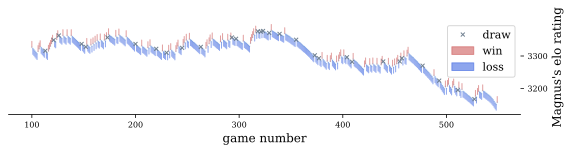

In [174]:
#----------------------------------------------
fig = plt.figure(0,figsize=(8, 2));
ff=12
ax = fig.add_subplot(1, 1,1);
magnus_won=np.array(df_bullet['won_'])
rating=np.where(df_bullet['is_white']==1,df_bullet['whiteelo'],df_bullet['blackelo'])
ind_rel=[1 if (not(x== np.NaN) and not(x== '?')) else 0 for x in rating ]

rating_=np.array([int(x) for x in rating if (not(x== np.NaN) and not(x== '?'))])
magnus_won=magnus_won[np.where(np.array(ind_rel)==1)]


rating_=np.array(rating_)
games_=np.arange(100,550)
ax.plot(games_,rating_[games_],'o',markersize=1,alpha=.1);
first_draw=1
first_win=1
first_loss=1
for x in games_:
    won__=-(2*magnus_won[x]-1) 
    cols_=['indianred', 'royalblue']
    if magnus_won[x]!=0.5:
        if (first_win==1) and (won__==1):
            ax.arrow(x,rating_[x],0,18*won__,ec=cols_[int(magnus_won[x])],fc=cols_[int(magnus_won[x])],alpha=.6,label='win');first_win=0
        elif (first_loss==1) and (won__<1):
            ax.arrow(x,rating_[x],0,18*won__,ec=cols_[int(magnus_won[x])],fc=cols_[int(magnus_won[x])],alpha=.6,label='loss');first_loss=0
        else:
            ax.arrow(x,rating_[x],0,18*won__,ec=cols_[int(magnus_won[x])],fc=cols_[int(magnus_won[x])],alpha=.6)
    else:
        if first_draw==1:
            ax.plot(x,rating_[x],'x',color='slategray',markersize=4,label='draw');first_draw=0
        else:
            ax.plot(x,rating_[x],'x',color='slategray',markersize=4)
xlab_=r"game number";ylab_=r"Magnus's elo rating"
# ax.set_xticks([0,4000,8000])
ax.set_yticks([3200,3300])
simpleaxis(ax,xlab_,ylab_)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.spines['left'].set_color('white')

# rhs = lambda ax: (ax.yaxis.set_label_position("right"), ax.yaxis.tick_right())
ax.legend(fontsize=ff-1)
plt.savefig(path_fig+'/fig_1_magnus.png',dpi=300, bbox_inches = "tight")


In [938]:
actual_games_magnus=df_bullet['actual_game_']

In [939]:
actual_games_magnus

0       1. e4 c5 2. Nc3 Nc6 3. f4 g6 4. Nf3 Bg7 5. a3 ...
1       1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Nc6 5. Nf3 Qb...
2       1. d4 Nf6 2. c4 e6 3. Nf3 b6 4. g3 Ba6 5. Nbd2...
3       1. e4 d6 2. d4 Nf6 3. Nc3 g6 4. Nf3 Bg7 5. Be3...
4       1. d4 Nf6 2. c4 e6 3. Nf3 b6 4. g3 Ba6 5. Nbd2...
                              ...                        
9507    1. Nf3 f5 2. e3 Nf6 3. c4 g6 4. Be2 Bg7 5. O-O...
9508    1. c4 d5 2. Nc3 d4 3. Ne4 e5 4. d3 Nc6 5. Nd2 ...
9509    1. d4 d5 2. Nf3 Bf5 3. Bf4 e6 4. e3 Bd6 5. Bg3...
9510    1. e4 d5 2. Nc3 dxe4 3. Nxe4 Nf6 4. Nxf6+ exf6...
9511    1. e3 d5 2. d4 c6 3. Nf3 Bf5 4. c4 e6 5. Nc3 N...
Name: actual_game_, Length: 7758, dtype: object

# Repeated interactions

In [34]:
with open(path_dicts+'store_player_id_black_.pkl', 'rb') as f:
    store_player_id_black_= pickle.load(f)
    
with open(path_dicts+'store_player_id_white_.pkl', 'rb') as f:
    store_player_id_white_= pickle.load(f)
    

In [103]:
dict_repeated=dict()
t_ic = time.time();
career_in_focus=store_player_id_black_.shape[0]
# career_in_focus=10000000
for it_game in range(career_in_focus):
#     key_=store_player_id_black_[it_game]+'__vs_versus_vs__'+store_player_id_white_[it_game]
    key_2=store_player_id_white_[it_game]+'|'+store_player_id_black_[it_game]
    
#     if key_ in dict_repeated.keys():
#         dict_repeated[key_]=dict_repeated[key_]+1
    if key_2 in dict_repeated.keys():
        dict_repeated[key_2]=dict_repeated[key_2]+1
    else:
        dict_repeated[key_2]=1
    if it_game % 10000 == 0:
        t_oc = time.time();
        print('career number=''--'+str(it_game/(career_in_focus-1))+'--i.e.-'+str(it_game)+'/'+str(career_in_focus-1)+'----time (s)-'+str(round(t_oc-t_ic,2))+'',end='\r')

    

NameError: name 'dict_repeated' is not defined

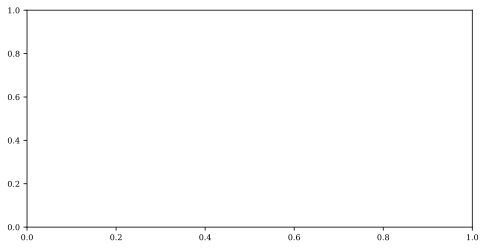

In [940]:
#------------------------------------------------------
bins_=101
op_considered=1

colors = ['navy', 'darkorange','red', 'cornflowerblue']


# labels_ = ['ELO < 1500', '1500 < ELO < 1800 ', 'ELO > 1800']

nn=bins_
fig = plt.figure(0,figsize=(8, 4));



ax = fig.add_subplot(1, 1,1);
X=np.array(list(dict_repeated.values()))/2

d = np.diff(np.unique(X)).min()
left_of_first_bin = X.min() - float(d)/2
right_of_last_bin = X.max() + float(d)/2
# counts, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=True)
counts, bin_edges = np.histogram(X, bins=np.arange(left_of_first_bin, right_of_last_bin + d, d),density=False)
#     ax.hist(X, np.arange(left_of_first_bin, right_of_last_bin + d, d),color=colors[it_bin],label=labels_[it_bin],alpha=.8,alpha=.6,density=True)
xxxx=(bin_edges[0:bin_edges.shape[0]-1]+bin_edges[1:bin_edges.shape[0]])/2
ax.plot(xxxx,counts,'.-',color=colors[it_bin],alpha=.6)



ax.set_xlabel(r"number of games, $x$",fontsize=ff)
ax.set_ylabel(r'number of pairs of players with $x$ games',fontsize=ff)
ax.set_xlabel(r"weight, $w$",fontsize=ff)
ax.set_ylabel(r'N($w$)',fontsize=ff)
# ax.set_xticks(np.arange(1,max_hot))
ax.set_yscale('log');
ax.set_xscale('log');




In [116]:
y=[len(x) for x in store_player_id_white_[0:100000000]]
y=np.array(y)
sum(['|' in x for x in store_player_id_white_[np.where(y>1)]])


0

## Repeated opponent vs hot-streak length prior to match up
Is a player more likely to win agaist same opponent if he/she is on a winning-streak of length L?

In [10]:
with open(path_dicts+'store_is_white.pkl', 'rb') as f:
    store_is_white= pickle.load(f)
    

In [35]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(5, rot=-.25, light=.7)
# g = sns.FacetGrid(df_elos, row="game_type", hue="game_type", aspect=15, height=.5, palette=pal)
# # g = sns.FacetGrid(df_elos, row="game_type")



# # Draw the densities in a few steps
# g.map(sns.histplot, "elos")


# # ,, binwidth=2, binrange=(0, 60)
# #       bw_adjust=.5, clip_on=False,
# #       fill=True, alpha=1, linewidth=1.5)
# # g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # # passing color=None to refline() uses the hue mapping
# # g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# # # Define and use a simple function to label the plot in axes coordinates
# # def label(x, color, label):
# #     ax = plt.gca()
# #     ax.text(0, .2, label, fontweight="bold", color=color,
# #             ha="left", va="center", transform=ax.transAxes)


# # g.map(label, "x")

# # # Set the subplots to overlap
# # g.figure.subplots_adjust(hspace=-.25)

# # # Remove axes details that don't play well with overlap
# # g.set_titles("")
# # g.set(yticks=[], ylabel="")
# # g.despine(bottom=True, left=True)

In [ ]:
# #------------------------------------------------
# # Saving the analysis
# #------------------------------------------------
# with open(path_dicts+'dict_opening_variations_numeric_map.pkl', 'wb') as f:
#     pickle.dump(dict_opening_variations_numeric_map, f)

# with open(path_dicts+'list_store_all_OPENINGS_variations_numeric.pkl', 'wb') as f:
#     pickle.dump(list_store_all_OPENINGS_variations_numeric, f)

### do certain openings promote longer games in weaker players? 
Supplementary fig

## Session length vs Performance


In [36]:
# store_utcdate_game=np.array(df_careers['utcdate'])
# store_utctime_game=np.array(df_careers['utctime'])

with open(path_dicts+'store_utcdate_game.pkl', 'rb') as f:
    store_utcdate_game=pickle.load(f)
with open(path_dicts+'store_utctime_game.pkl', 'rb') as f:
    store_utctime_game=pickle.load(f)


In [ ]:
store_utctime_game

## Session length vs career stage
(part of one sesion if games played within 30 mins of each other)

In [109]:
p=Pool(processes=15)
names=path_dicts+"parquets/a_sorted_full_careers*"

# names=path_dicts+"parquets/dict_full_careers*" # all files
files=sorted(glob.glob(names))
df_careers = pd.concat(p.map(pd.read_parquet,files),ignore_index=True)
# df_careers = pd.read_parquet(names)

print('loaded careers=',toc(start_time))


p.close()

218706.56773930788
loaded careers= None


In [112]:
# df_careers

In [111]:
# store_player_id=np.array(df_careers['player_id'])
# with open(path_dicts+'store_player_id.pkl', 'wb') as f:
#     pickle.dump(store_player_id, f)

In [542]:
store_player_id_white_=np.array(df_careers['white_player'])
store_player_id_black_=np.array(df_careers['black_player'])


In [545]:
store_utcdate_game=np.array(df_careers['utcdate'])
store_utctime_game=np.array(df_careers['utctime'])

Finding career start and ends within the dataframe

In [8]:
store_is_white=np.array(df_careers['is_white'])
# ids=np.array(df_careers['player_id'])
# ind=np.where(~(ids[1:ids.shape[0]]==ids[0:ids.shape[0]-1]))
# ind=ind[0]
# career_lens=ind[1:len(ind)]-ind[0:len(ind)-1]
# print(sum(np.array(career_lens)>100))
# ind=[0]+list(ind)
# career_indices=ind
# len(ind)

In [535]:
store_utctime_game

NameError: name 'store_utctime_game' is not defined

In [546]:
# store_elo_gap_white_minus_black=np.array(list(df_careers['whiteelo']-df_careers['blackelo']))
#------------------------------------------------
# Saving the analysis
#------------------------------------------------

with open(path_dicts+'store_utcdate_game.pkl', 'wb') as f:
    pickle.dump(store_utcdate_game, f)
with open(path_dicts+'store_utctime_game.pkl', 'wb') as f:
    pickle.dump(store_utctime_game, f)


In [ ]:
#set_op=set(list_all_OPENINGS_variations)
# with open(path_dicts+'dict_opening_variations_numeric_map.pkl', 'rb') as f:
# #     dict_opening_variations_numeric_map= pickle.load(f)
# dict_opening_variations_numeric_map={}
# it=-1
# for x in set_op:
#     it=it+1
#     dict_opening_variations_numeric_map[x]=it
# list_store_all_OPENINGS_variations_numeric=[dict_opening_variations_numeric_map[x] for x in list_all_OPENINGS_variations]
# list_store_all_OPENINGS_variations_numeric=np.array(list_store_all_OPENINGS_variations_numeric)